<a href="https://colab.research.google.com/github/DavidEmeryUofC/CDS_Project_Restaurant_Rev_Prediction/blob/main/CDSproject2_RestaurantRevenueNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<center> <h1> <span style='color:#292D78'> CREWES Data Science Training </span> </h1> </center>

<center> <h2> <span style='color:#DF7F00'> Project: Restaurant Revenue Prediction </span> </h2> </center>

---

This [Jupyter Notebook](https://jupyter.org/install) is for analysing the data in the [Kaggle Project](https://www.kaggle.com/code/akouaorsot/restaurant-revenue-s-predictions) for estimation of Restaurant Revenue.  

Project members are: [David Emery](https://www.linkedin.com/in/david-emery-54659a3a/), [Nazhat Shirin Rashid](https://www.linkedin.com/in/nazhatrashid/), [Stephanie Misailidis](https://www.linkedin.com/in/stephanie-jimenez-misailidis-54a6b3b1/?originalSubdomain=ca), and [Reginaldo Moriera](https://www.linkedin.com/in/reginaldo-moreira-70a016b3/)

In [1]:
# Core utilities
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (10,7)}) # default figure size set for Powerpoint

# print plots
%matplotlib inline 

# To supress warnings and deprecated messages
import warnings
warnings.filterwarnings("ignore")

## Import data
2 csv files one for training and one for testing

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Data fields
Id : Restaurant id.   
Open Date : opening date for a restaurant  
City : City that the restaurant is in. Note that there are unicode in the names.   
City Group: Type of the city. Big cities, or Other.   
Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile  
P1, P2 - P37: There are three categories of these obfuscated data.   
- Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales.  
- Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability.  
- Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.  

Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

In [3]:
filepath = '/content/drive/MyDrive/CDS_Course/project'
filename = filepath + '/test.csv'
print(filename)
df_test = pd.read_csv(filename)
df_test.head()

/content/drive/MyDrive/CDS_Course/project/test.csv


Id   Open Date            City  City Group Type  P1   P2   P3   P4  P5  \
0   0  01/22/2011           Niğde       Other   FC   1  4.0  4.0  4.0   1   
1   1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   2   
2   2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   
3   3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   
4   4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   

   ...  P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  
0  ...  2.0  3.0    0    0    0    0    0    0    0    0  
1  ...  1.0  3.0    0    0    0    0    0    0    0    0  
2  ...  2.0  3.0    0    0    0    0    0    0    0    0  
3  ...  2.0  3.0    0    4    0    0    0    0    0    0  
4  ...  5.0  3.0    0    0    0    0    0    0    0    0  

[5 rows x 42 columns]

In [4]:
df_test.shape

(100000, 42)

In [5]:
filepath = '/content/drive/MyDrive/CDS_Course/project'
filename = filepath + '/train.csv'
print(filename)
df_train = pd.read_csv(filename)
df_train.head()

/content/drive/MyDrive/CDS_Course/project/train.csv


Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]

In [6]:
df_train.shape

(137, 43)

The number of restaurant in the training data (137) significantly less than found in the test data. The next is to check for duplicates & nan and evaluate attributes.

In [7]:
features = list(df_test.drop(columns=['Id']))
print("Duplication in numerical columns in test data",df_test[features].duplicated().sum())
print("Duplication in numerical columns in train data",df_train[features].duplicated().sum())
print("Test for nan's in test data",df_test[features].isna().sum().sum())
print("Test for nan's in train data",df_train[features].isna().sum().sum())

Duplication in numerical columns in test data 2290
Duplication in numerical columns in train data 0
Test for nan's in test data 0
Test for nan's in train data 0


No nan and no duplicates in the training data but 2290 in the test data. As the contest requires an estimate for each of the 100000 points and this represents less than 2.5% of the data, choose to leave the duplicates within the data.


Lets take a quick look at the attribute statisics.

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

Four objects and the rest either int64 or float64. The Open Date shouldn't be an object. 

In [9]:
df_train["ODate"] = pd.to_datetime(df_train["Open Date"], format = "%m/%d/%Y", utc = False)
df_test["ODate"] = pd.to_datetime(df_test["Open Date"], format = "%m/%d/%Y", utc = False)

firstopenT = pd.to_datetime(df_test["ODate"].min(), format='%Y-%m-%d', utc = False)
lastopenT = pd.to_datetime(df_test["ODate"].max(), format='%Y-%m-%d', utc = False)
print("test data",firstopenT,lastopenT)

firstopen = pd.to_datetime(df_train["ODate"].min(), format='%Y-%m-%d', utc = False)
lastopen = pd.to_datetime(df_train["ODate"].max(), format='%Y-%m-%d', utc = False)
print("train data",firstopen,lastopen)

df_train["DOpen"] = (lastopen - df_train["ODate"])/ pd.offsets.Day(1)
df_test["DOpen"] = (lastopenT - df_test["ODate"])/ pd.offsets.Day(1)

test data 1995-05-08 00:00:00 2014-01-04 00:00:00
train data 1996-05-08 00:00:00 2014-01-25 00:00:00


In [10]:
df_train.drop(columns=['Open Date'],inplace=True)
df_test.drop(columns=['Open Date'],inplace=True)

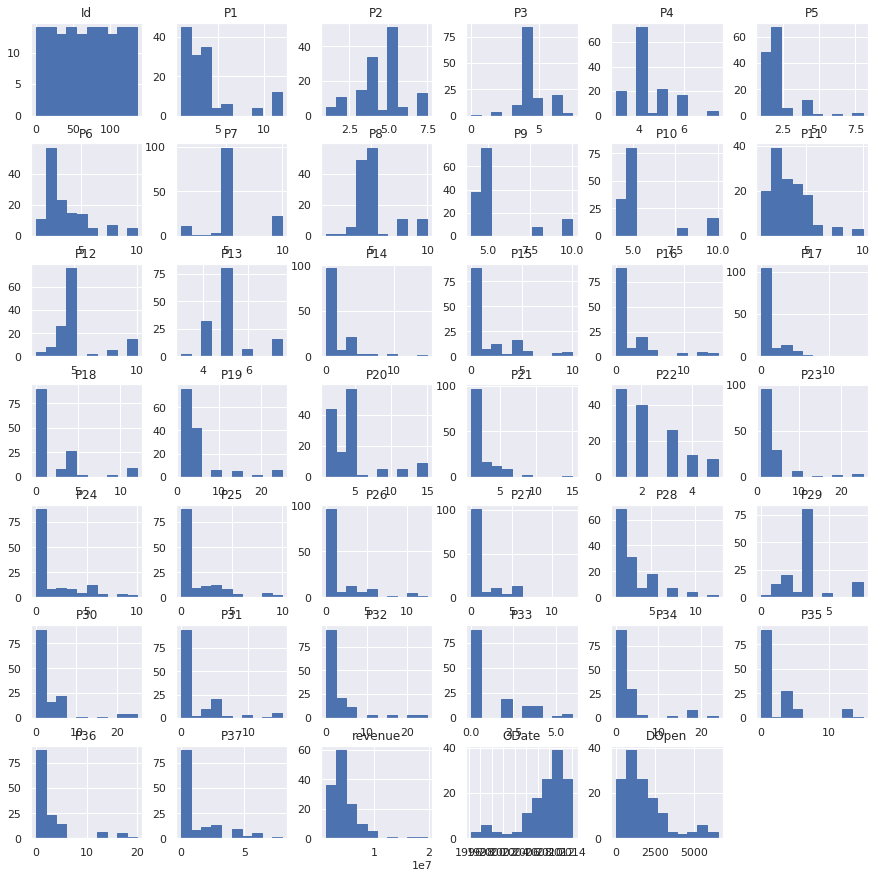

In [11]:
df_train.hist(figsize=(15,15),edgecolor='b');

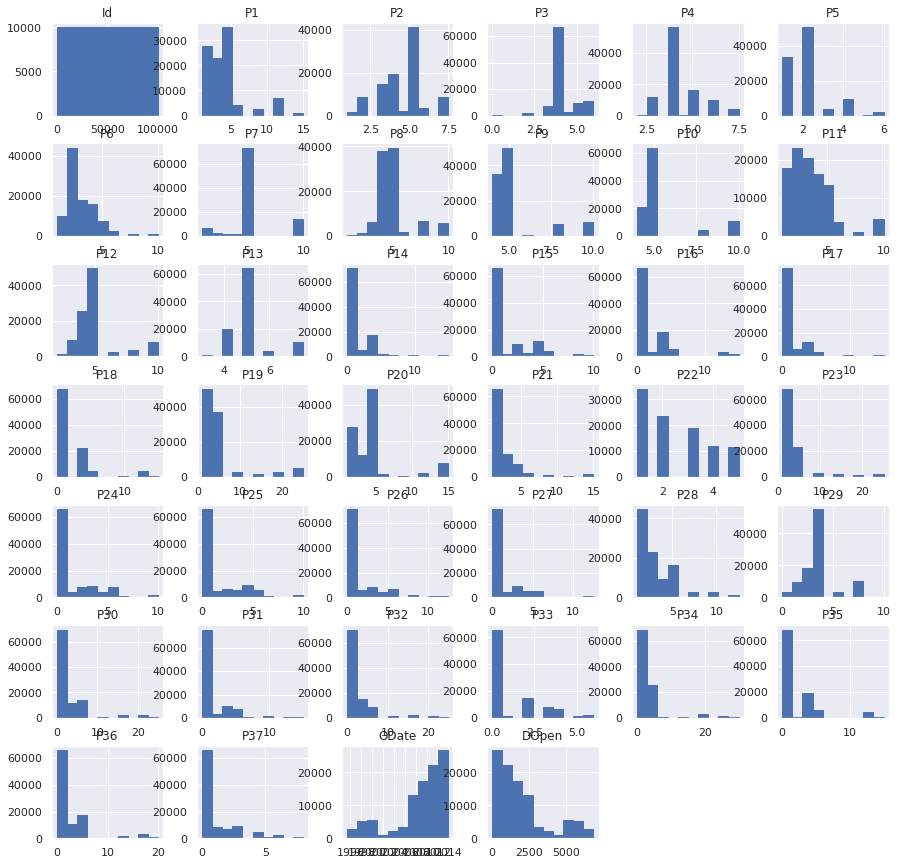

In [12]:
df_test.hist(figsize=(15,15),edgecolor='b');

There appears to be 2 problem: first a high number of zero, and second the 137 training dataset having different statisical distribution than the test data. 

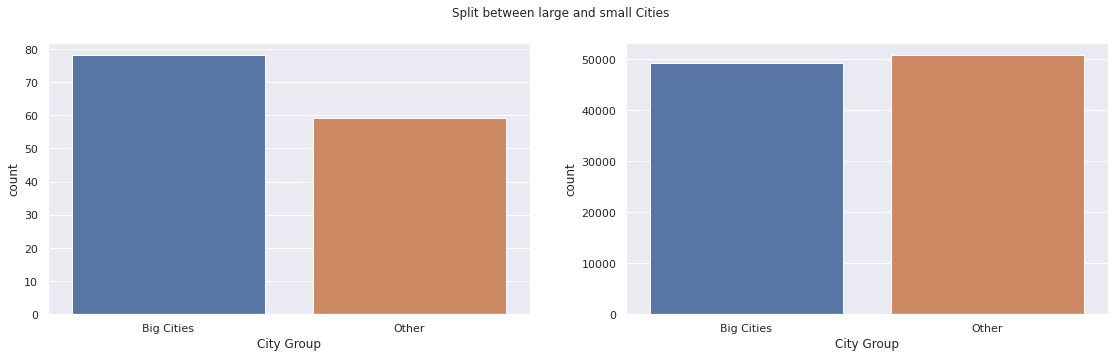

In [13]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
horder = ['Big Cities','Other']
g1 = sns.countplot(data = df_train, x = "City Group", order = horder, ax= ax[0])
g2 = sns.countplot(data = df_test, x = "City Group", order = horder, ax= ax[1])
plt.suptitle('Split between large and small Cities',fontsize=12);

Test data balance between Big Cities and Others, not the same in the training data

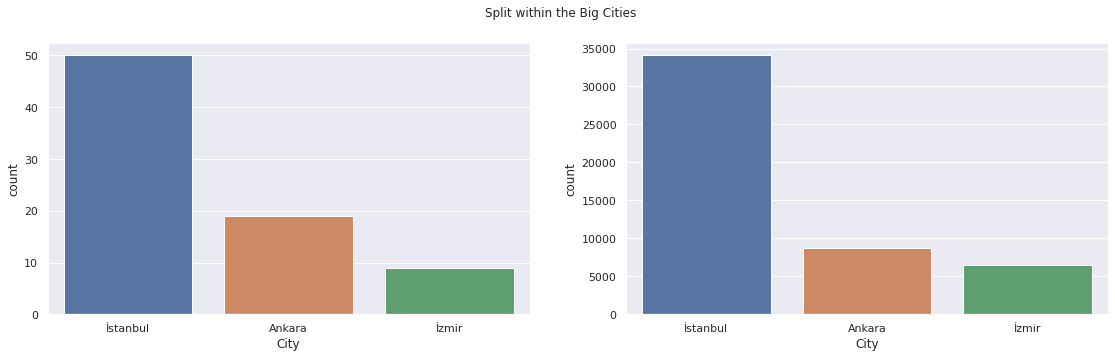

In [14]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
large_cityOrder = df_test[df_test["City Group"] == 'Big Cities'].groupby('City').size().sort_values().index[::-1]
sns.countplot(data = df_train[df_train["City Group"] == 'Big Cities'], x = "City", order=large_cityOrder, ax = ax[0]);
sns.countplot(data = df_test[df_test["City Group"] == 'Big Cities'], x = "City", order=large_cityOrder, ax = ax[1])
plt.suptitle('Split within the Big Cities',fontsize=12);

Only 3 cities in the Big City object with the majority of the restaurant being in Istanbul. Again uneven distribution between training and testing datasets.

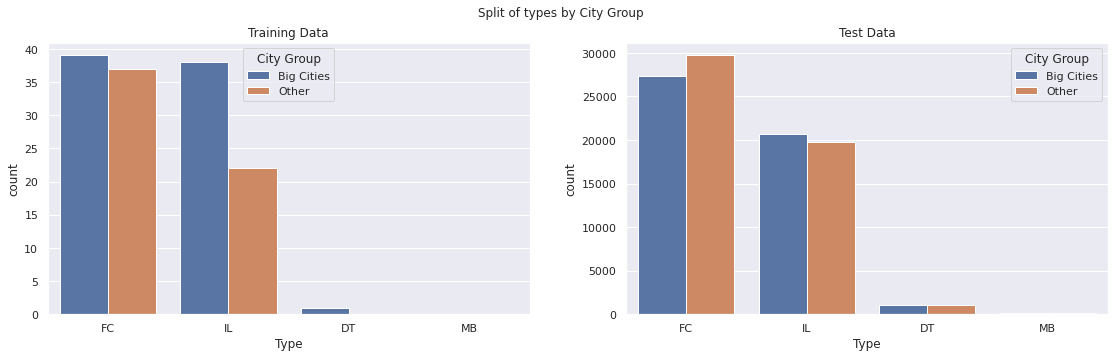

In [15]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
porder = ['FC','IL','DT','MB']
horder = ['Big Cities','Other']
sns.countplot(data = df_train, x = "Type",  hue="City Group",order=porder, hue_order=horder, ax = ax[0]).set(title='Training Data')
sns.countplot(data = df_test, x = "Type",  hue="City Group", order=porder, hue_order=horder, ax = ax[1]).set(title='Test Data')
plt.suptitle('Split of types by City Group',fontsize=12);

Likewise the balance of restaurant type is different between the train and test datasets.

###Checking for the meaning of the zeros

In [16]:
# Extracting names of numerical and categorical features
cols_num = list(df_train.drop(columns = ["Id","revenue"]).select_dtypes(include = ["int64", "float64"]))
cols_cat = list(df_train.drop(columns = ["Id"]).select_dtypes(include = ["object", "category", "bool"]))

In [17]:
print("The percentage of zero in the train & test dataframe\n")
print((df_train[cols_num] == 0).sum()*100/df_train.shape[0])
print((df_test[cols_num] == 0).sum()*100/df_test.shape[0])

The percentage of zero in the train & test dataframe

P1        0.000000
P2        0.000000
P3        0.729927
P4        0.000000
P5        0.000000
P6        0.000000
P7        0.000000
P8        0.000000
P9        0.000000
P10       0.000000
P11       0.000000
P12       0.000000
P13       0.000000
P14      64.233577
P15      64.233577
P16      64.233577
P17      64.233577
P18      64.233577
P19       0.000000
P20       0.000000
P21       0.000000
P22       0.000000
P23       0.000000
P24      64.233577
P25      64.233577
P26      64.233577
P27      64.963504
P28       0.000000
P29       1.459854
P30      64.233577
P31      64.233577
P32      64.233577
P33      64.233577
P34      64.233577
P35      64.233577
P36      64.233577
P37      64.233577
DOpen     0.729927
dtype: float64
P1        0.000
P2        0.000
P3        0.318
P4        0.000
P5        0.000
P6        0.000
P7        0.000
P8        0.000
P9        0.000
P10       0.000
P11       0.000
P12       0.000
P13       0.000
P

The documentation states that the zero may actually represent nan.  The concern is where are the zero real as like in P3 & P29 and potential nan as in P14-P18, P24-P27 & P30-37. 

In [18]:
PsZeros = ['P14','P15','P16','P17','P18','P24','P25','P26','P27','P30','P31','P32','P33','P34','P35','P36','P37']

In [19]:
df_train['Zeros'] = 0
df_test['Zeros'] = 0
for i in PsZeros:
  df_train['Zeros'] += df_train[i]
  df_test['Zeros'] += df_test[i]
print("The percentage of all zero \n")
print("for the training data",(df_train['Zeros'] == 0).sum()*100/df_train.shape[0] )
print("for the testing data",(df_test['Zeros'] == 0).sum()*100/df_test.shape[0] )

The percentage of all zero 

for the training data 64.23357664233576
for the testing data 35.131


Do the zero represents a data type

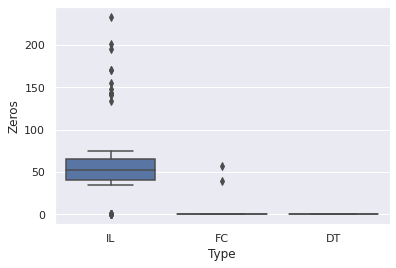

In [20]:
sns.boxplot(data = df_train, x='Type', y='Zeros')

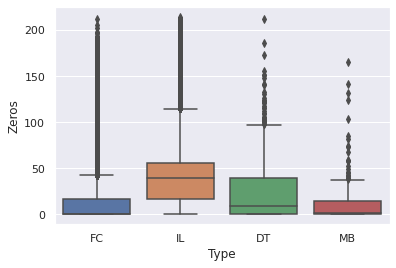

In [21]:
sns.boxplot(data = df_test, x='Type', y='Zeros')

The zero appears to be concentrated on the FC & DT data types.  This makes sense as food courts (FC) and drive thru (DT) wouldn't have certain stats such as parking spaces. The absence of mobile (MB) in the training set and the different in distribution between the train & test data may also present a future problem when estimating revenue on the test dat.

In [22]:
df_train.drop(columns=['Zeros'],inplace=True)
df_test.drop(columns=['Zeros'],inplace=True)

## Evaluate Columns

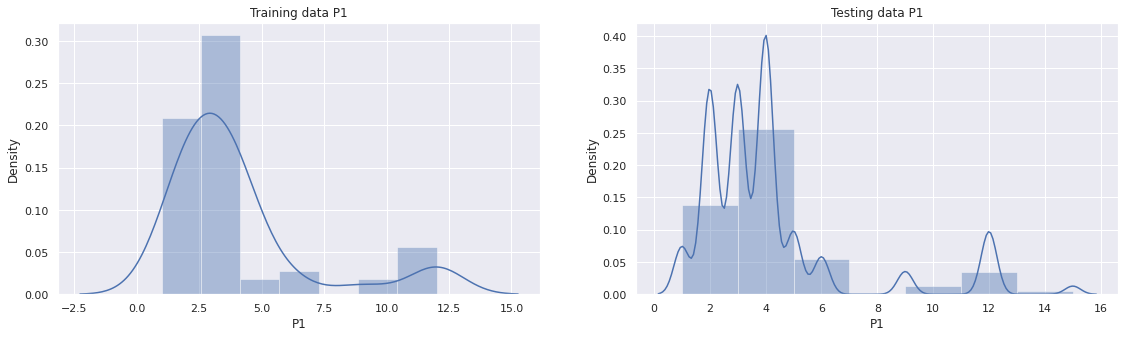

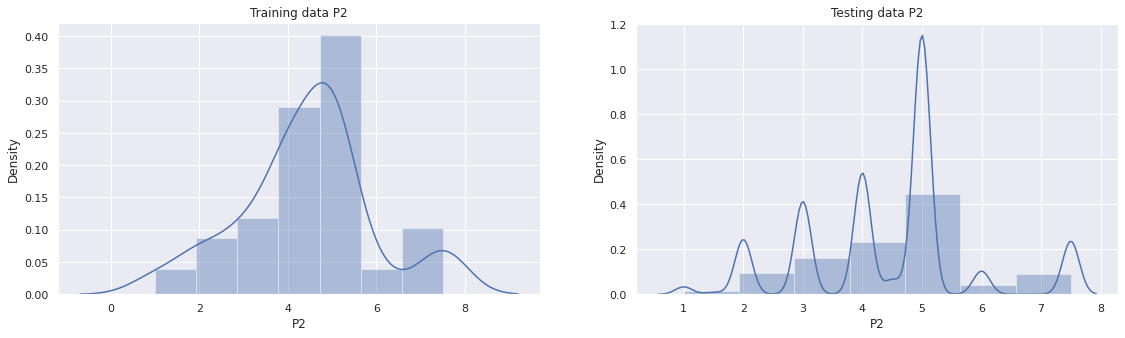

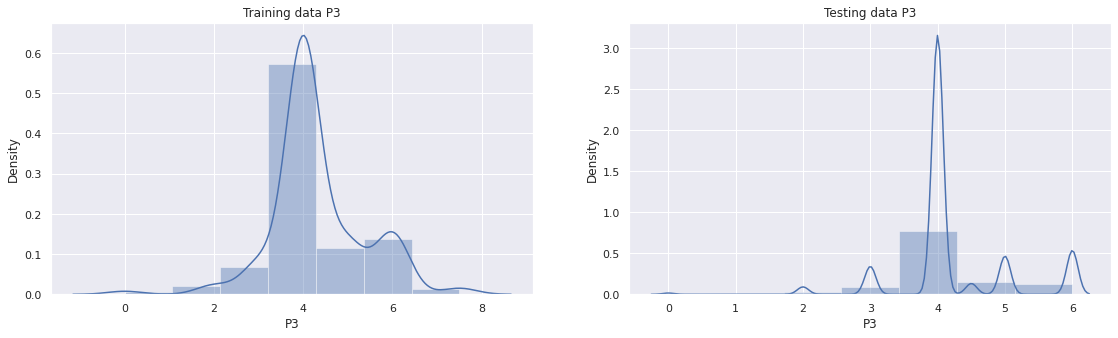

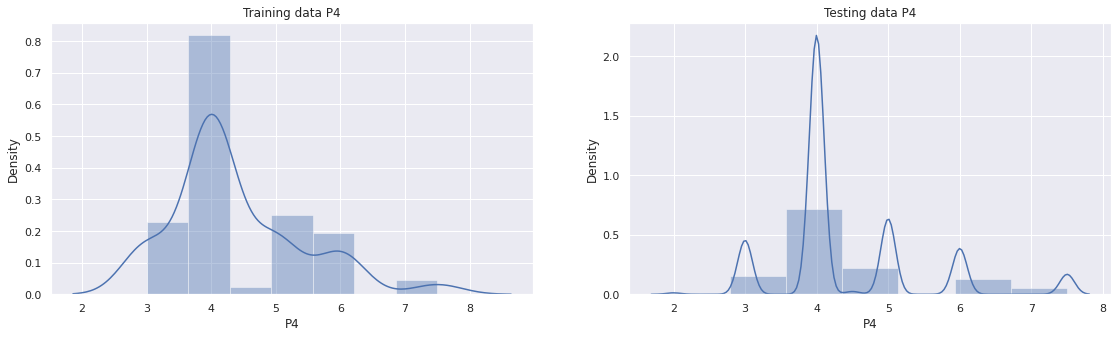

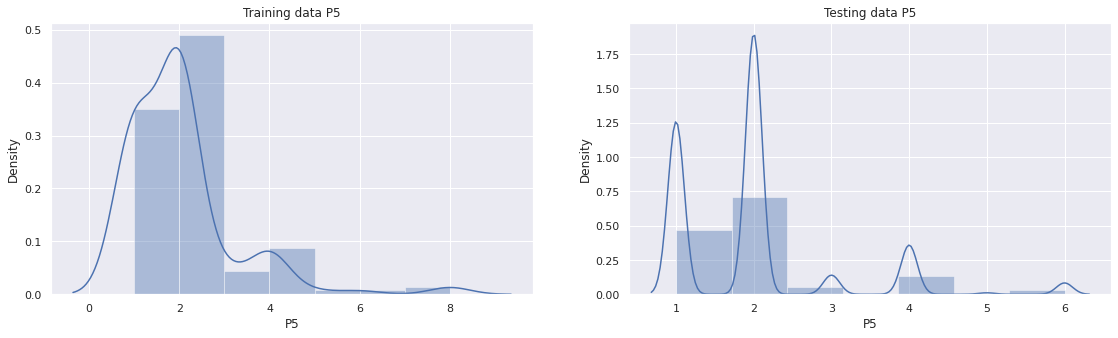

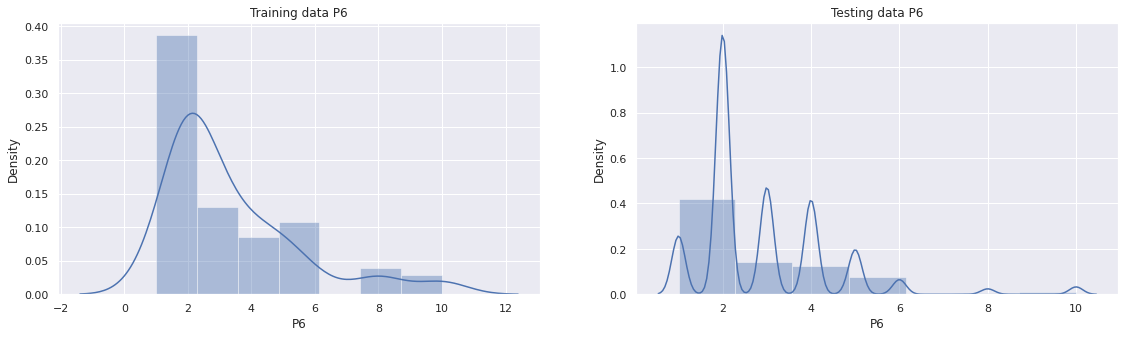

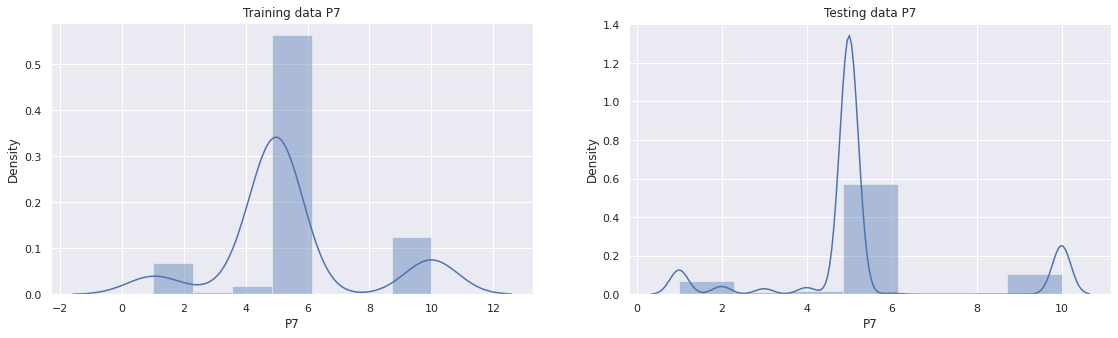

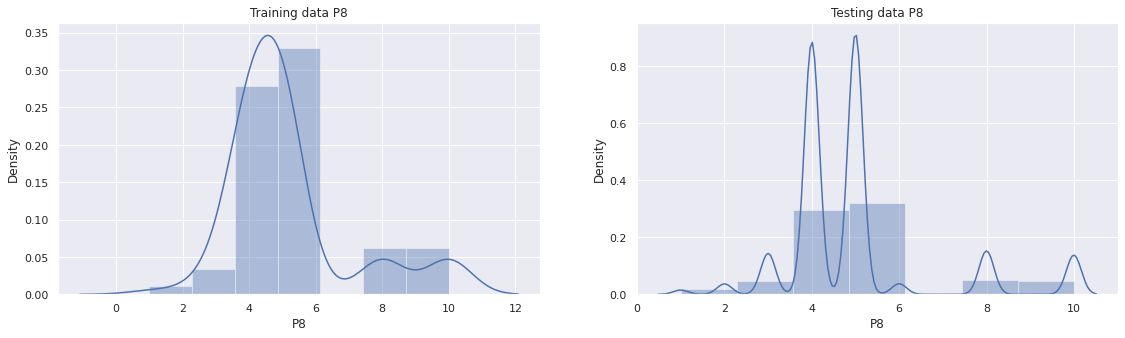

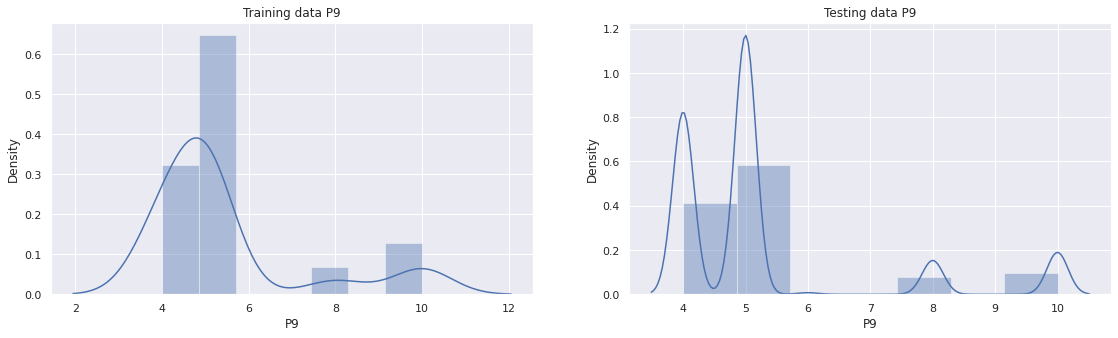

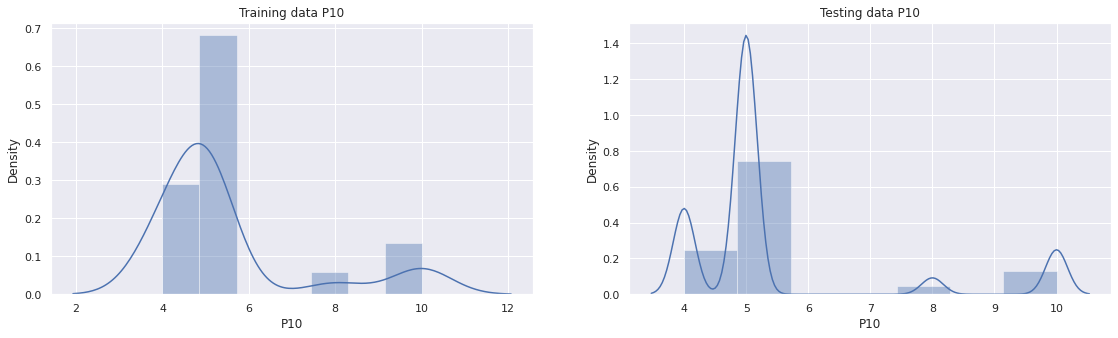

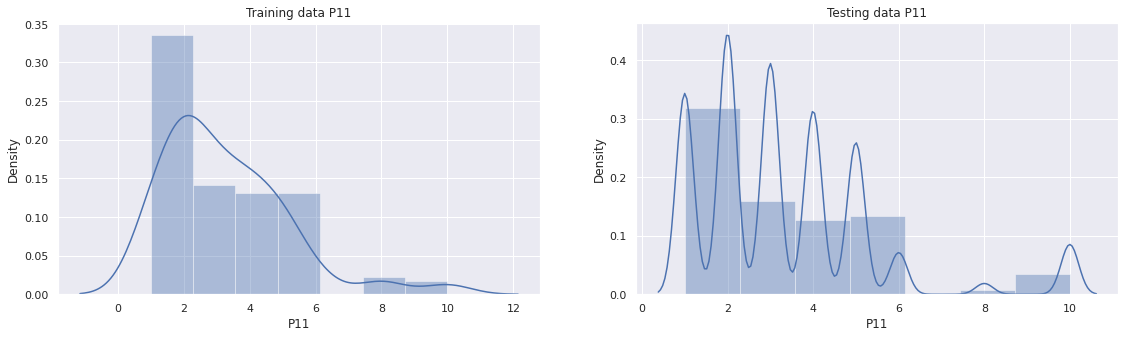

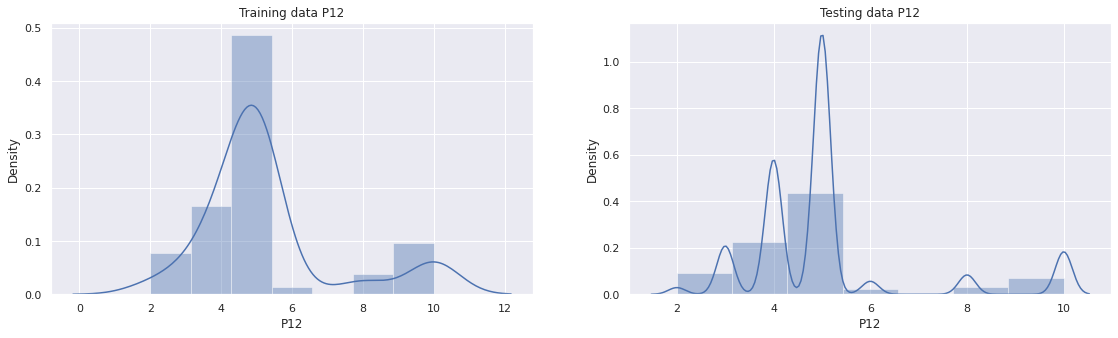

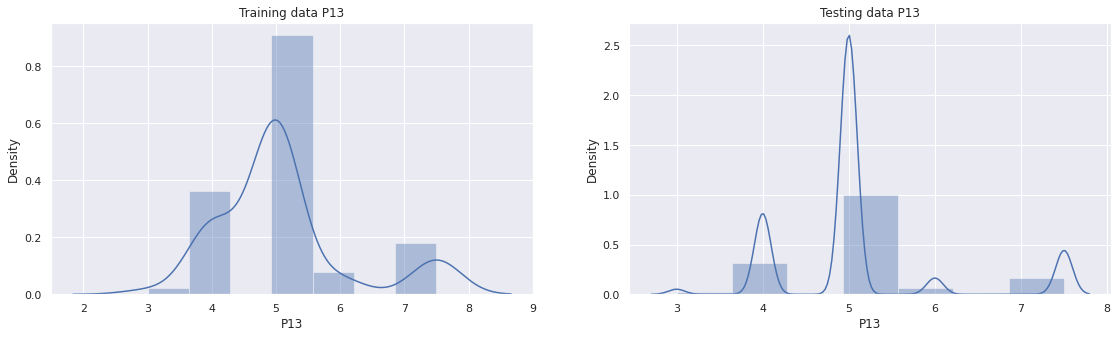

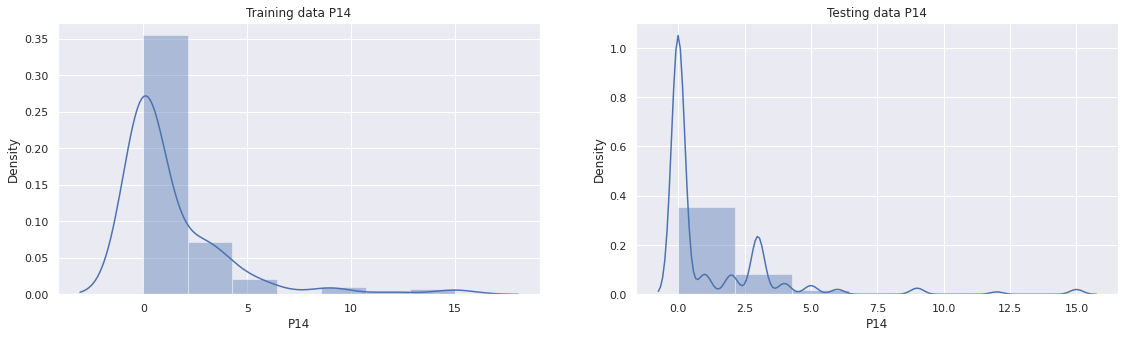

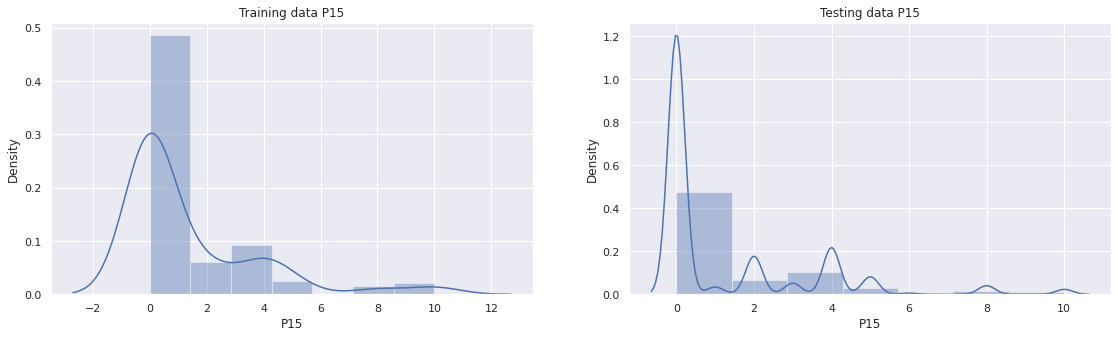

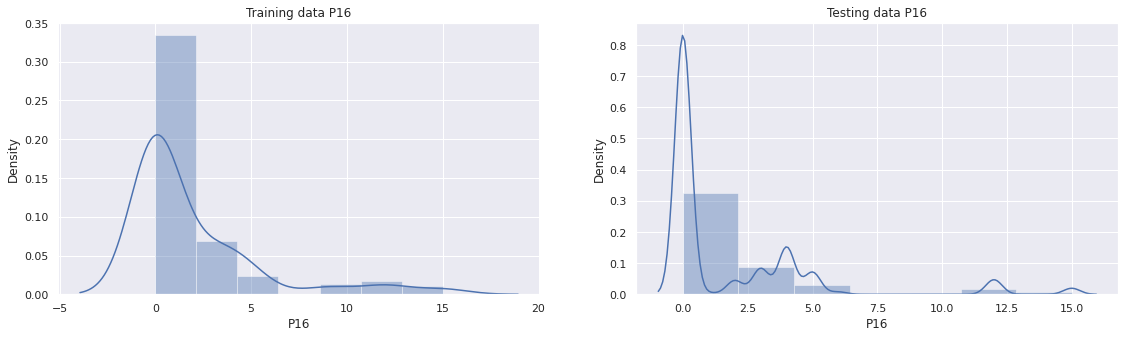

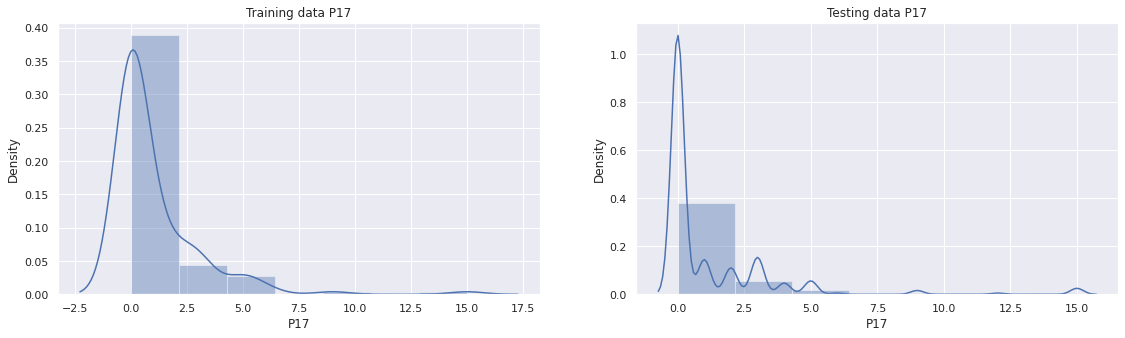

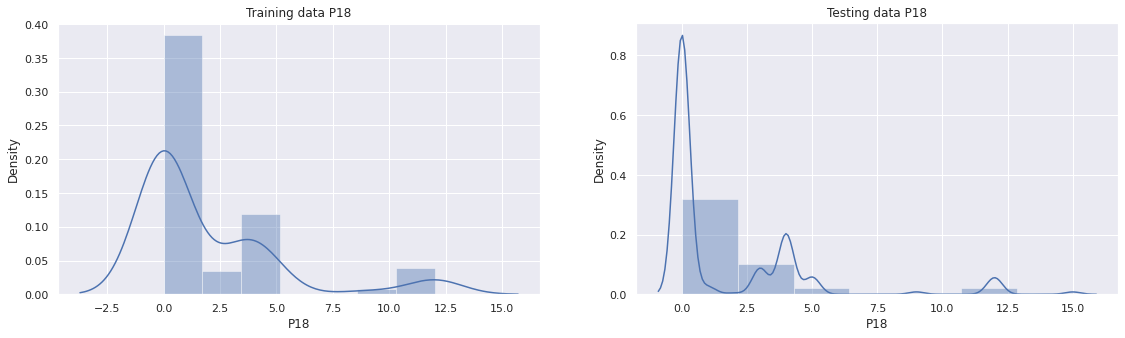

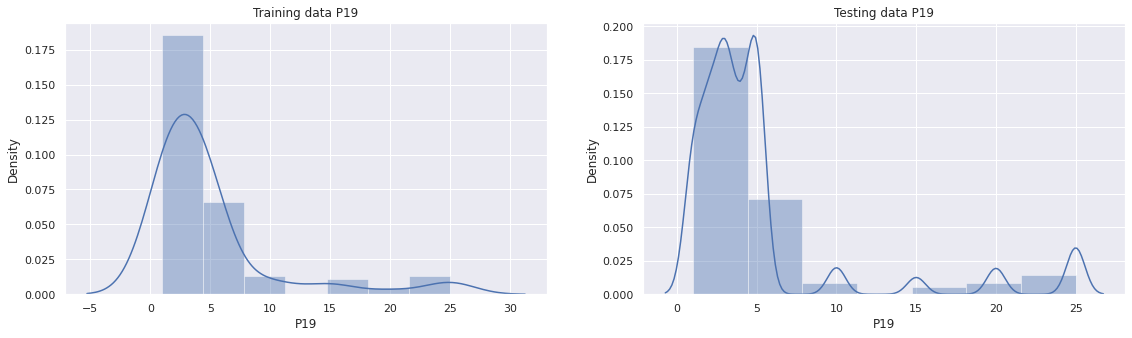

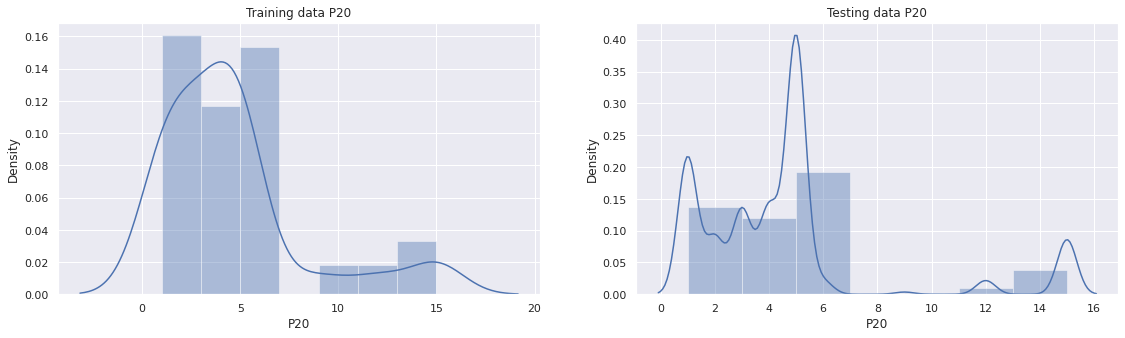

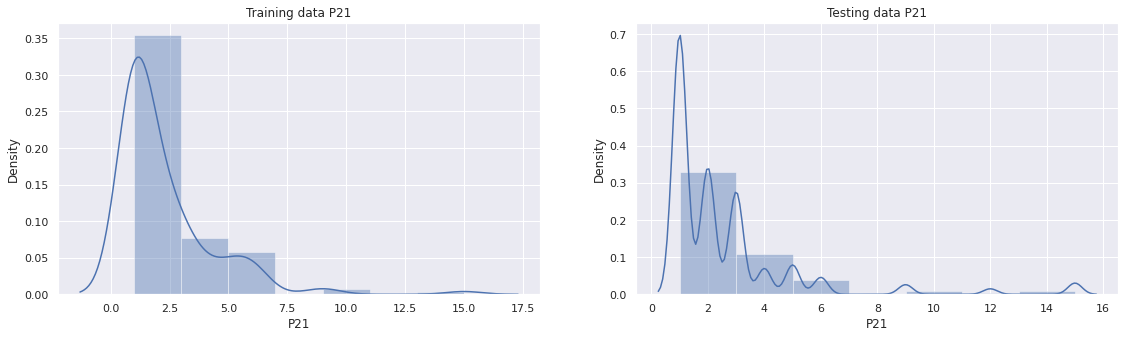

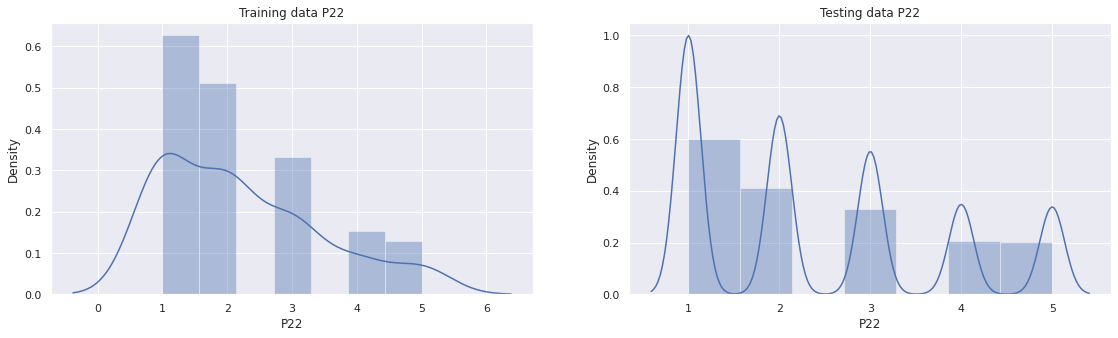

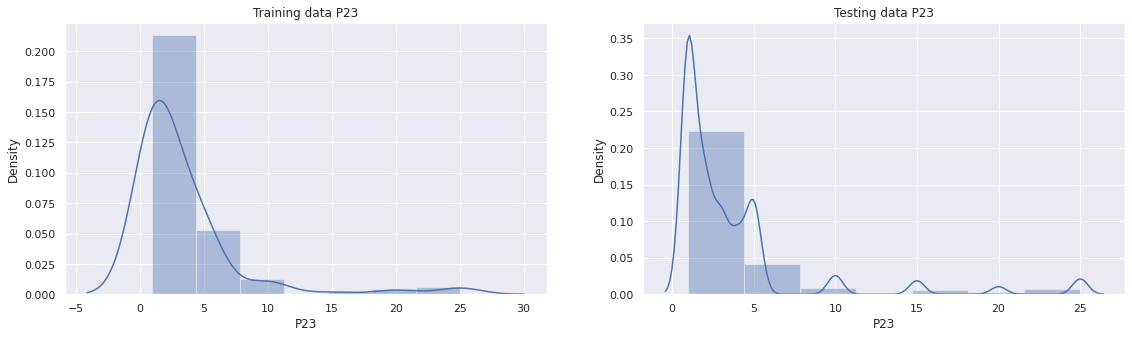

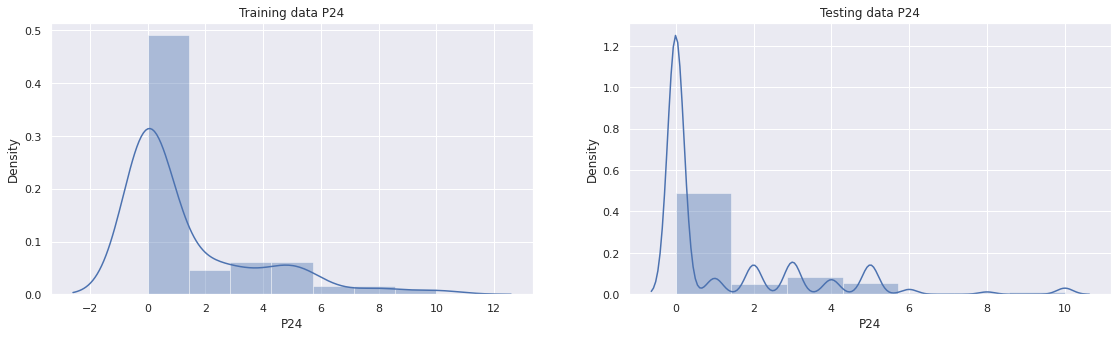

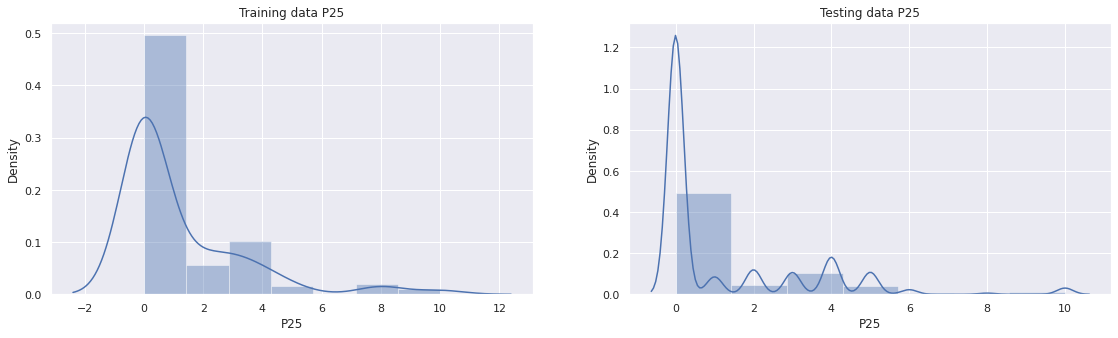

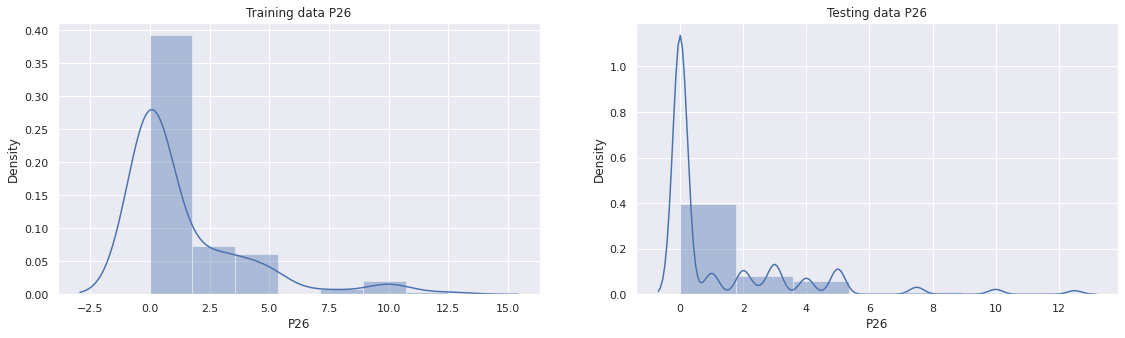

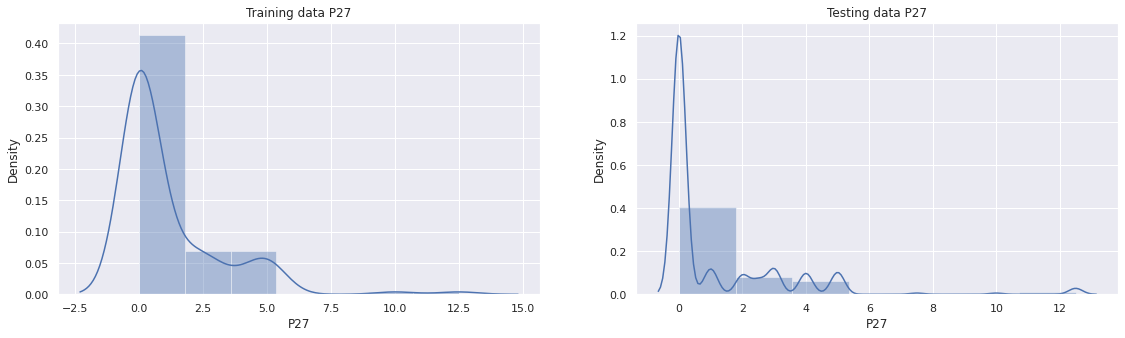

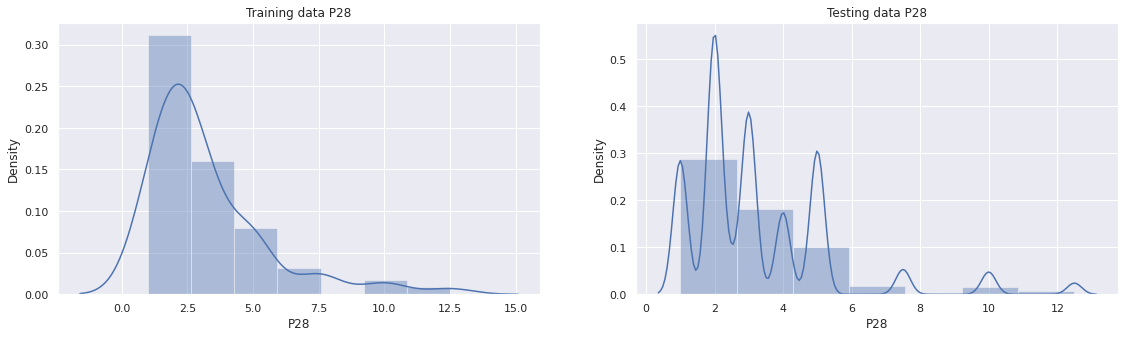

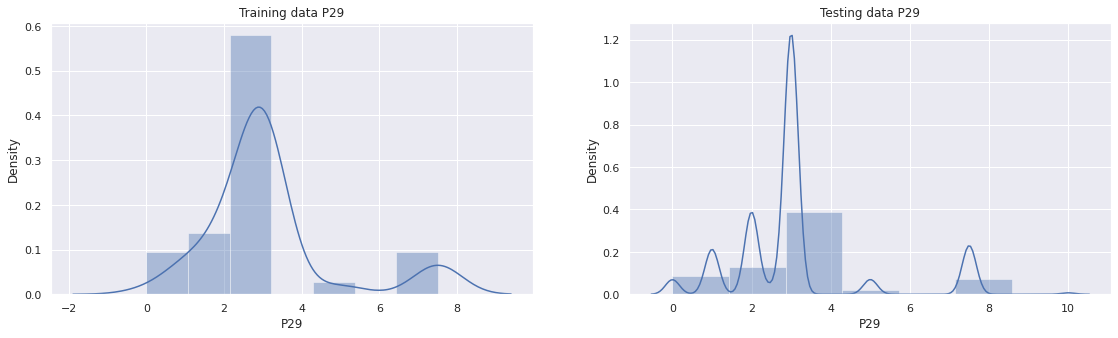

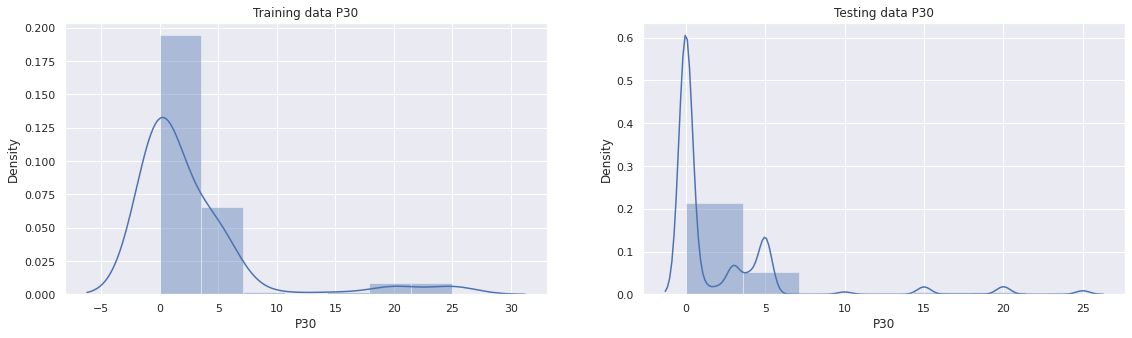

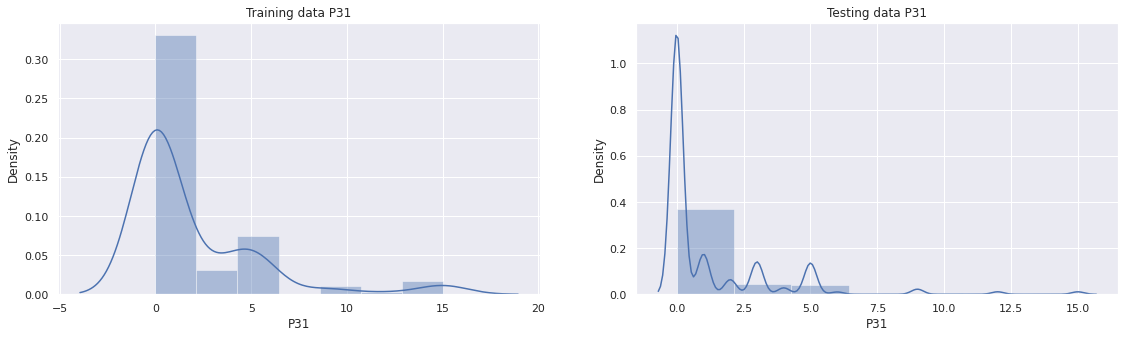

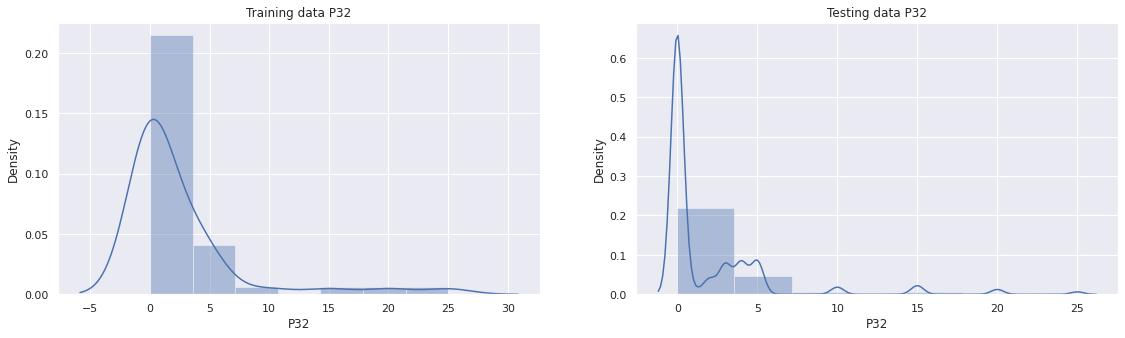

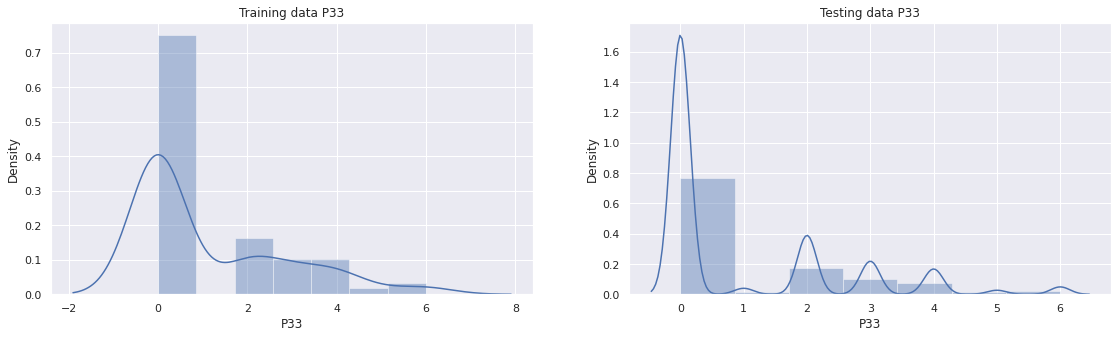

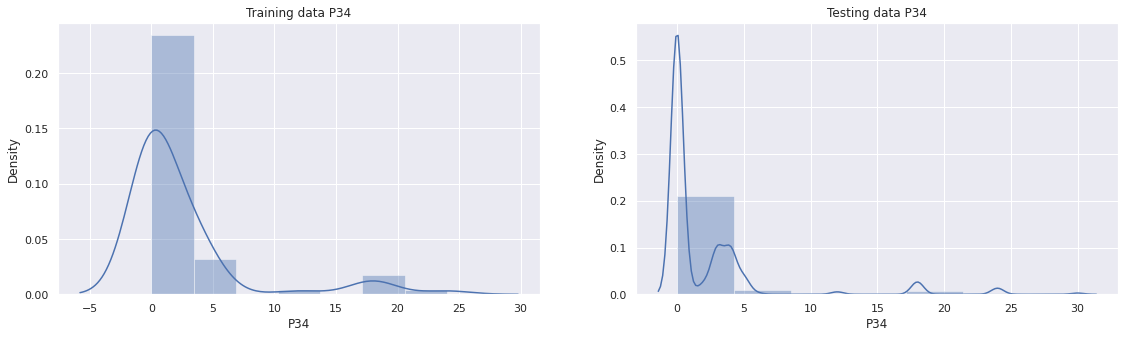

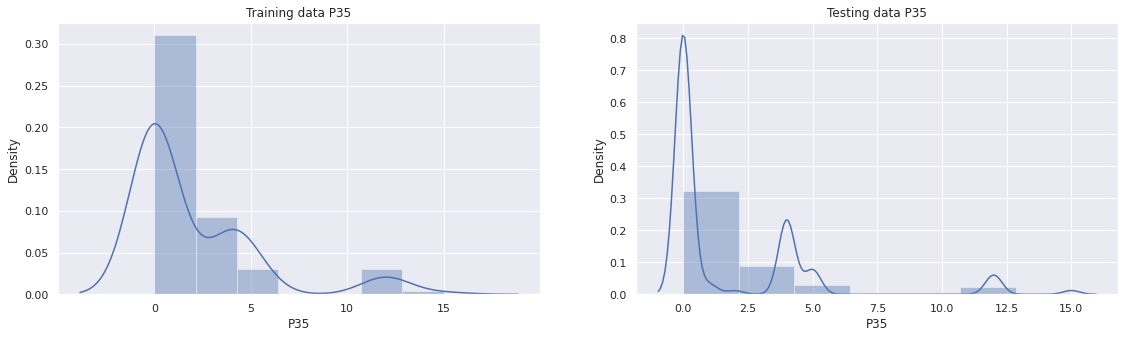

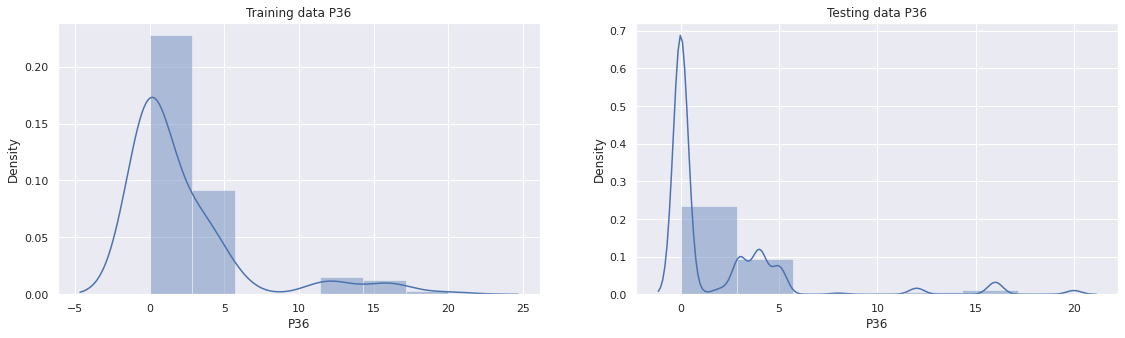

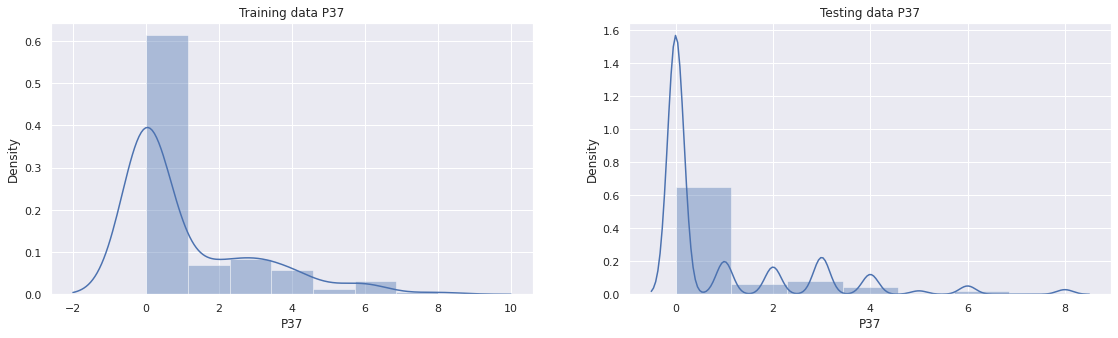

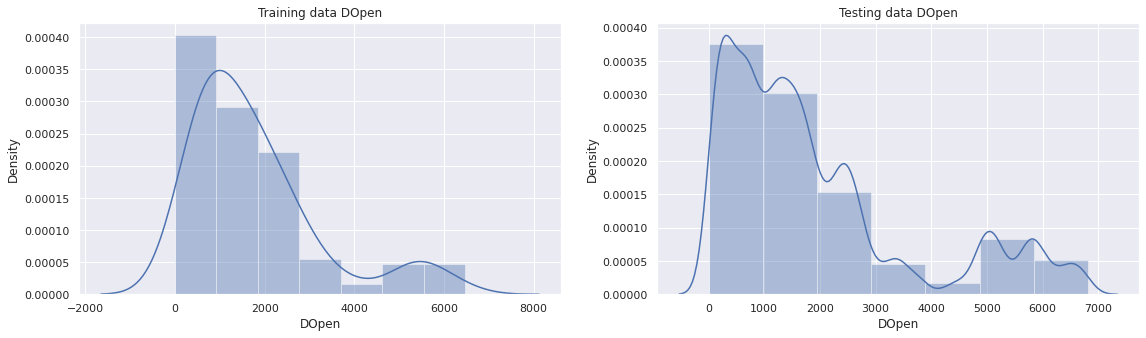

In [23]:
plt.rc('figure', max_open_warning = 0)
for i in cols_num:
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    g1 = sns.distplot(df_train[i], ax=ax[0], bins = 7).set(title='Training data ' + i)#, kde=False);
    g2 = sns.distplot(df_test[i], ax=ax[1], bins = 7).set(title='Testing data ' + i)#, kde=False);
    fig.show()

Check the data without the 3 data types that appear to be mostly zeros

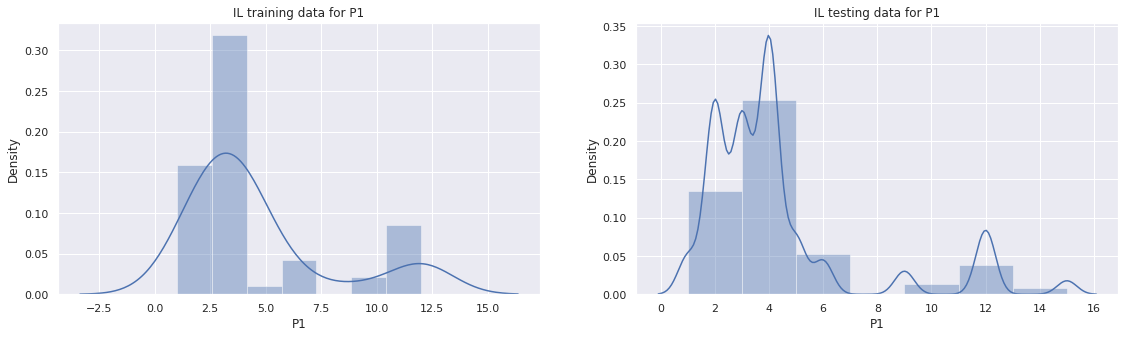

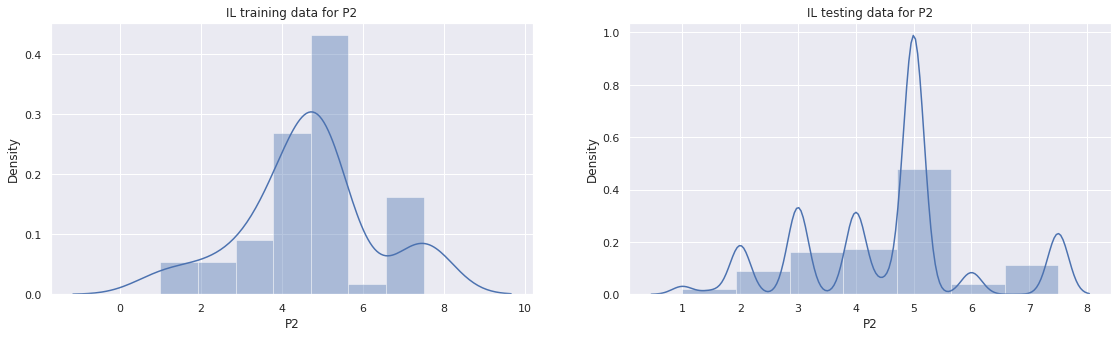

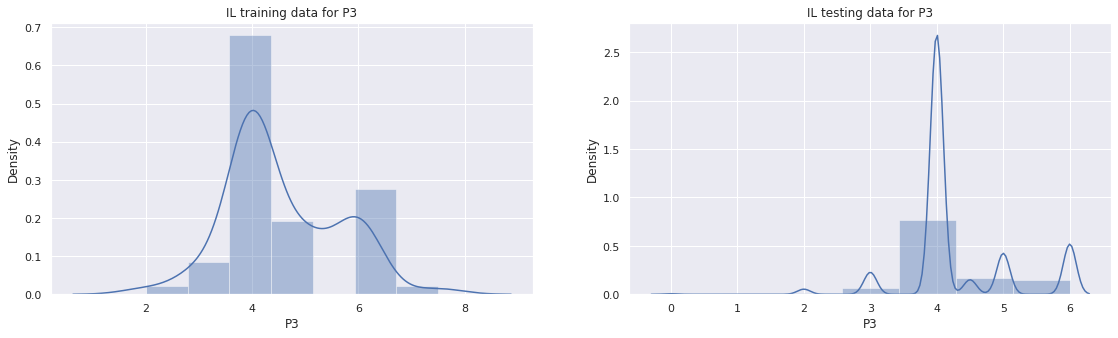

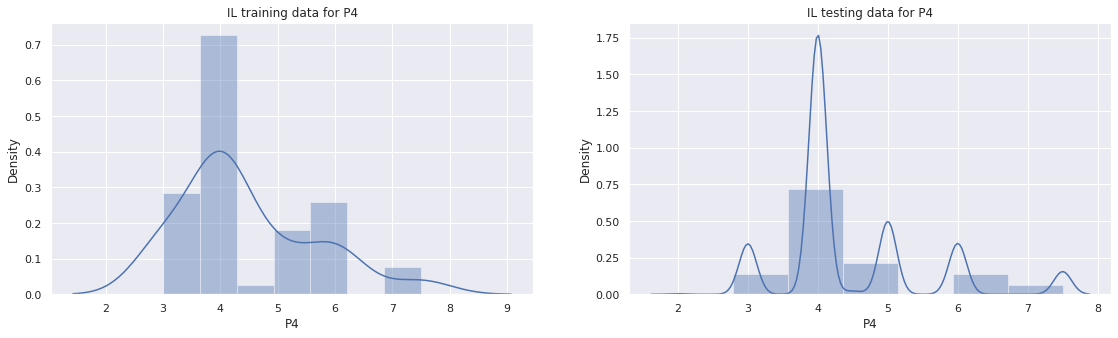

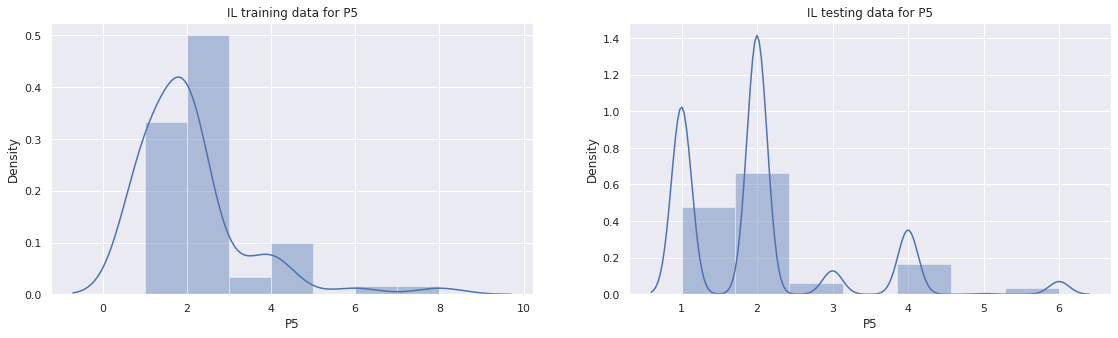

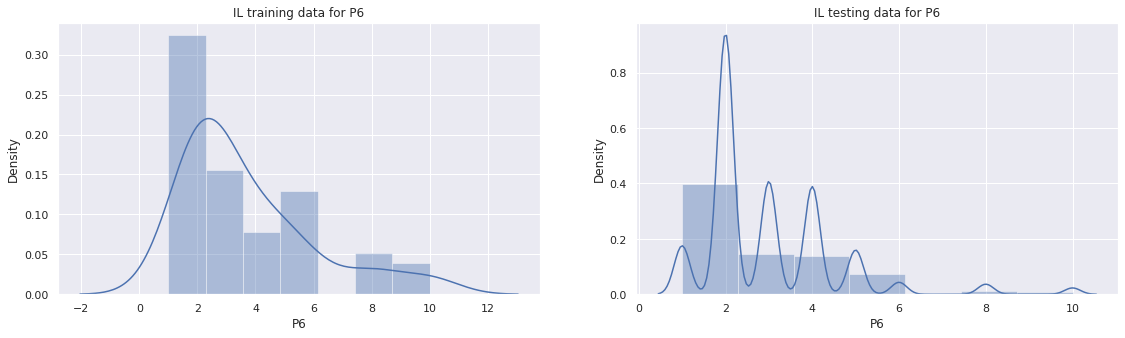

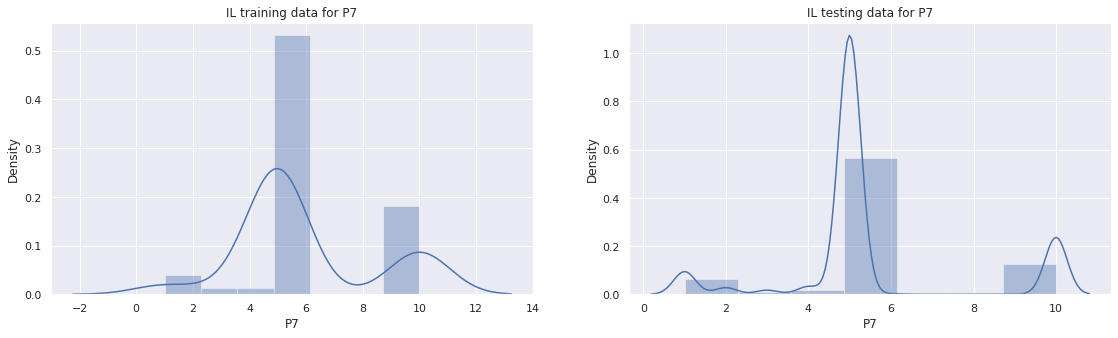

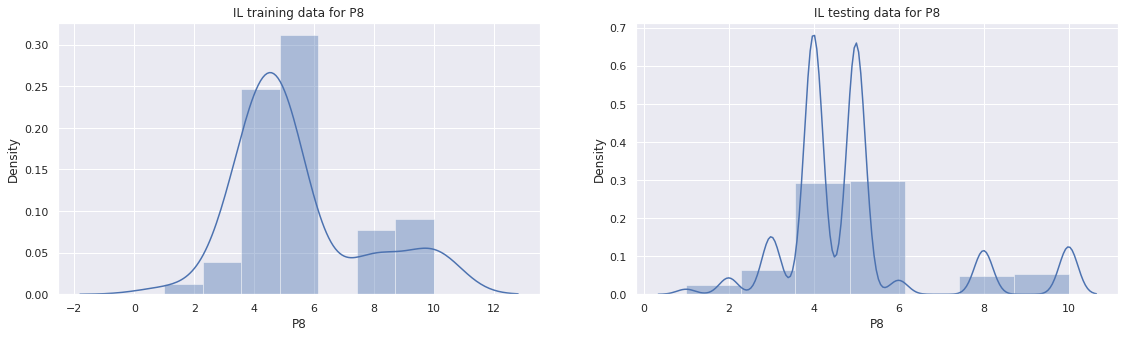

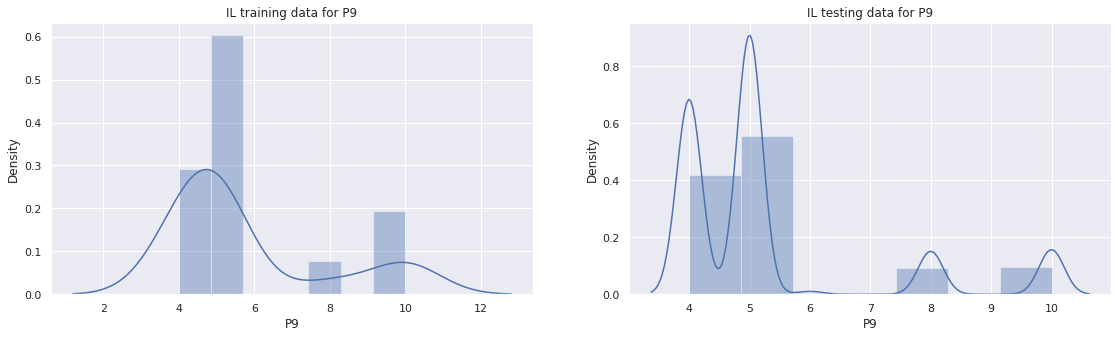

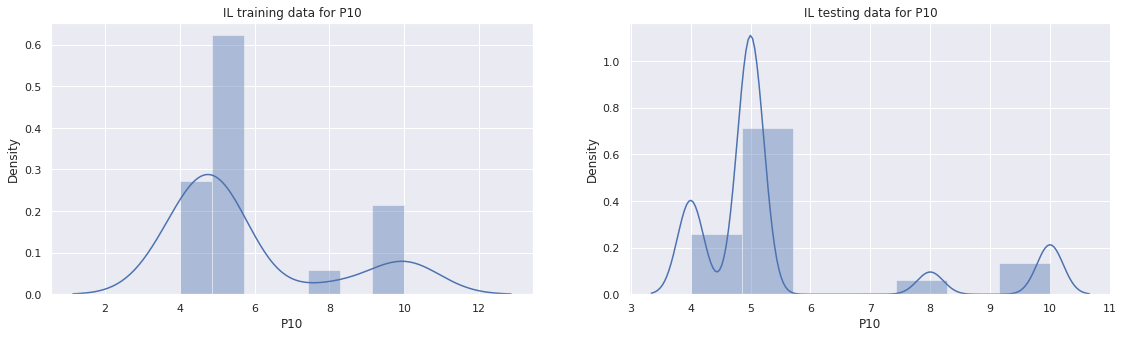

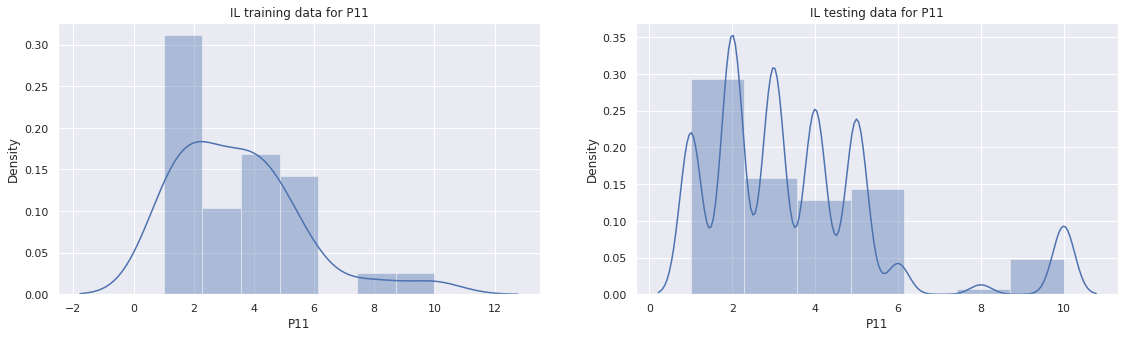

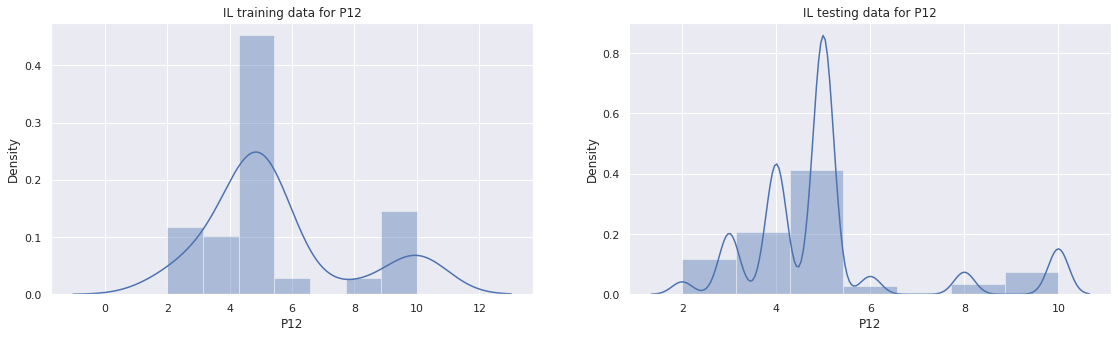

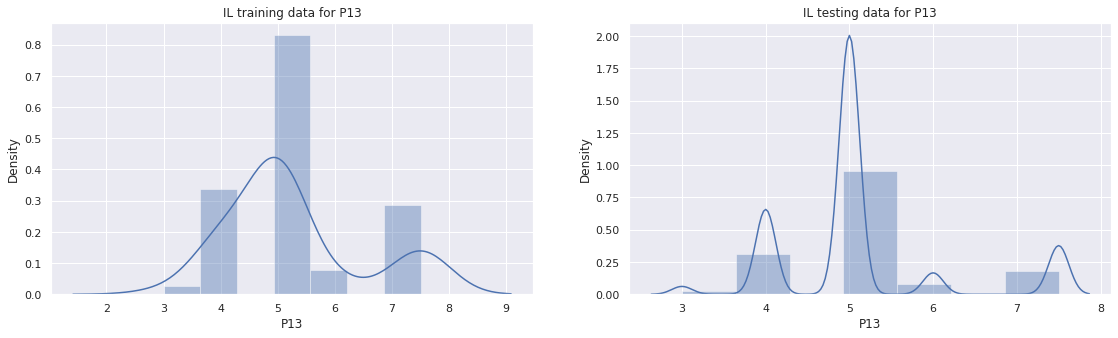

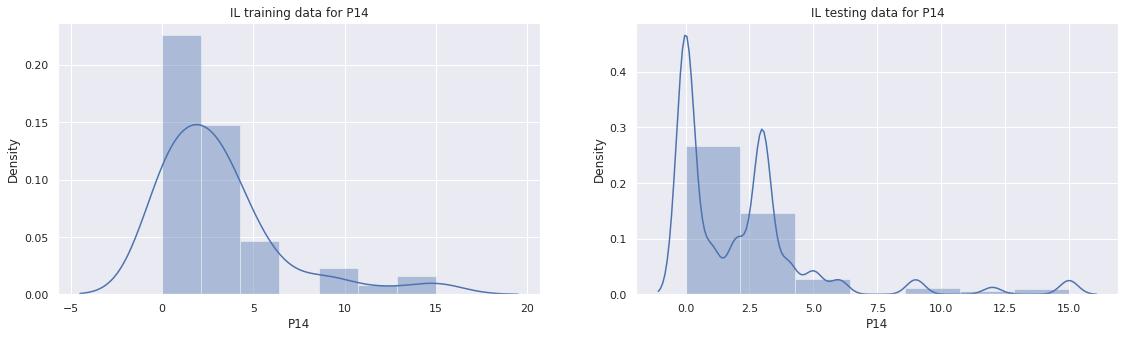

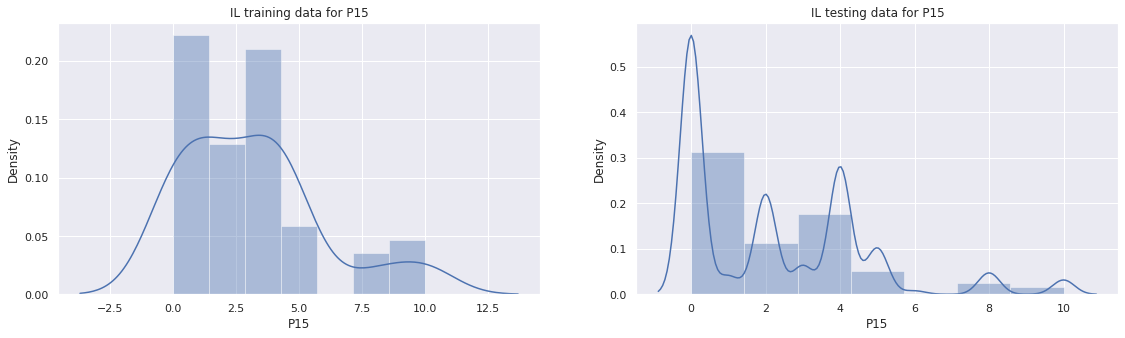

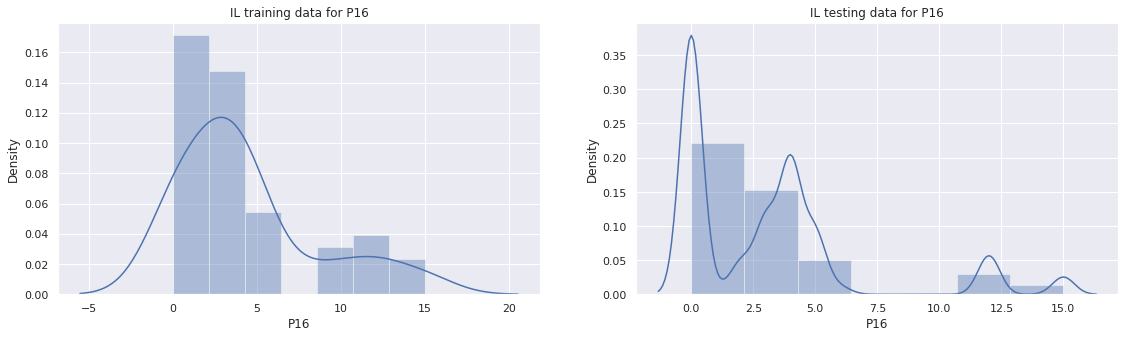

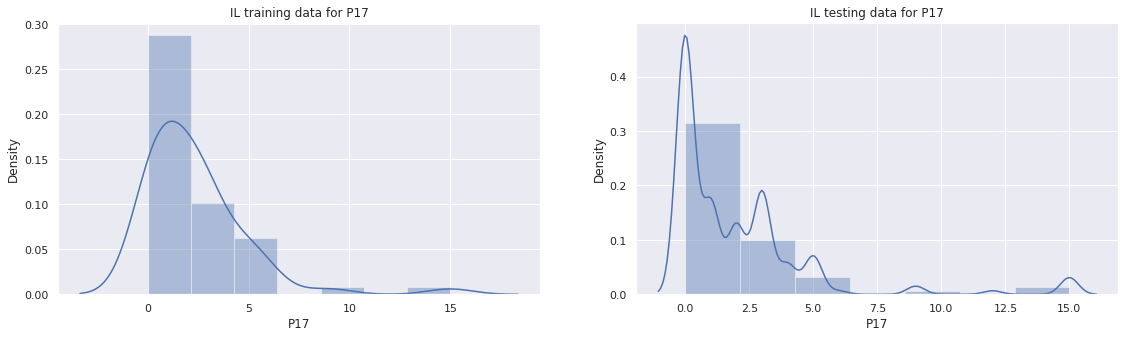

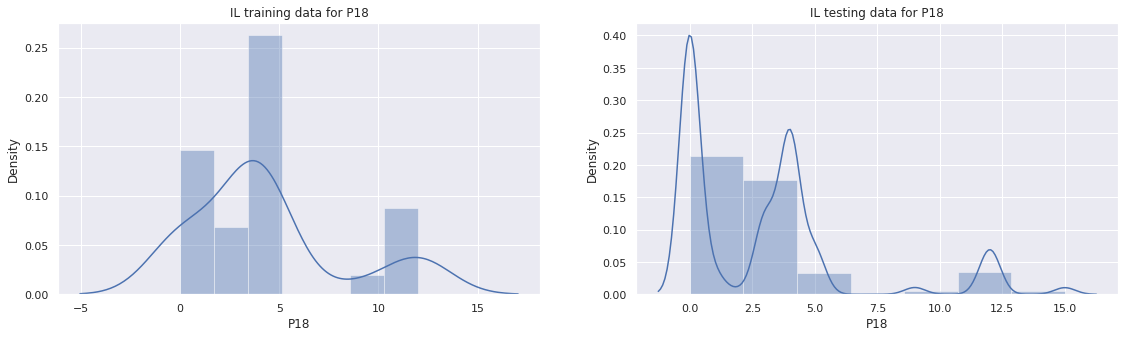

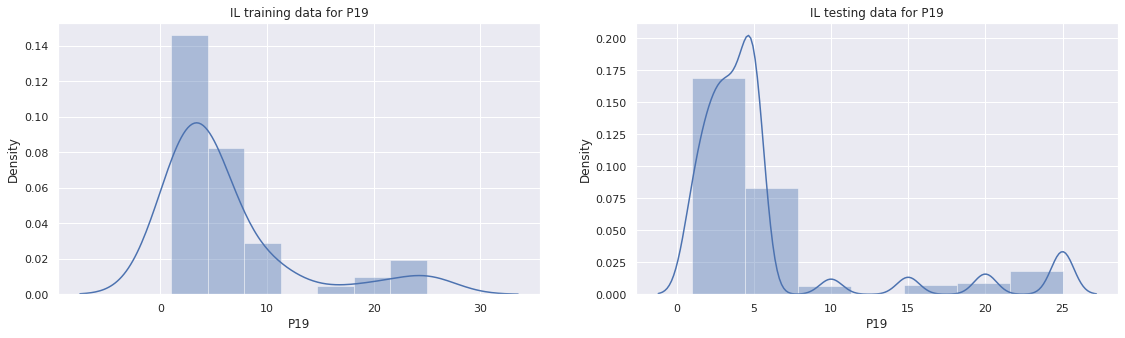

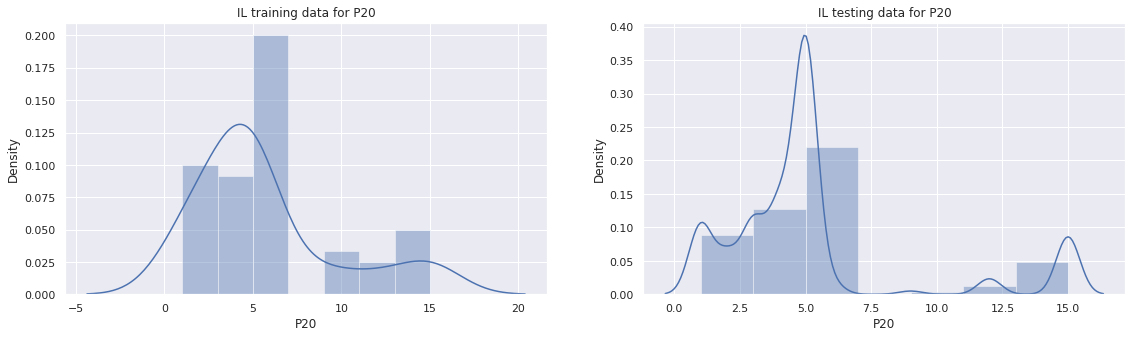

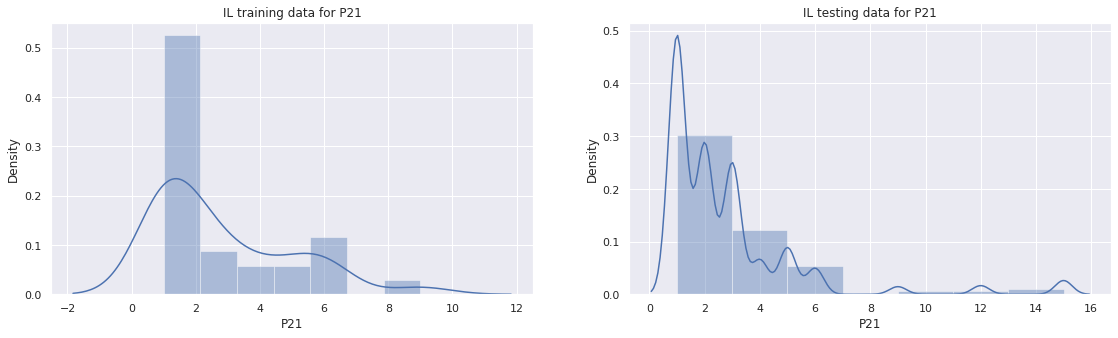

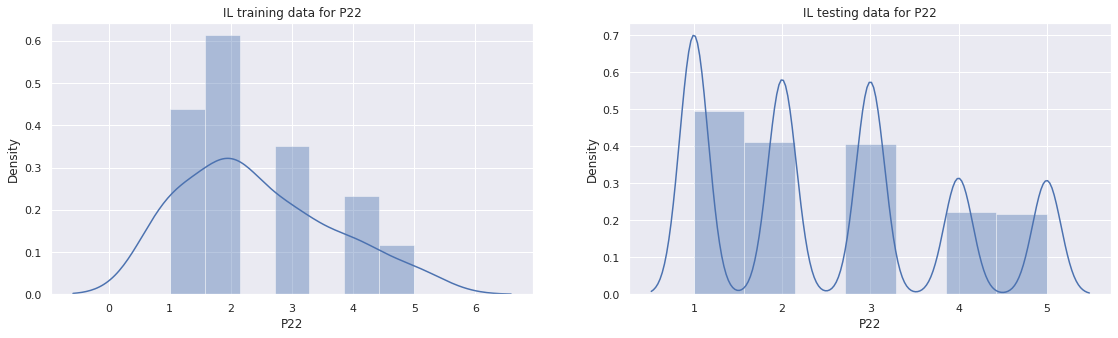

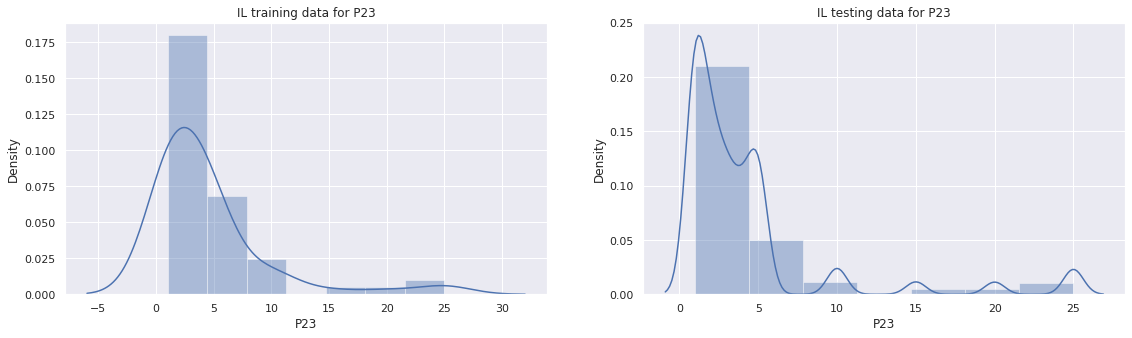

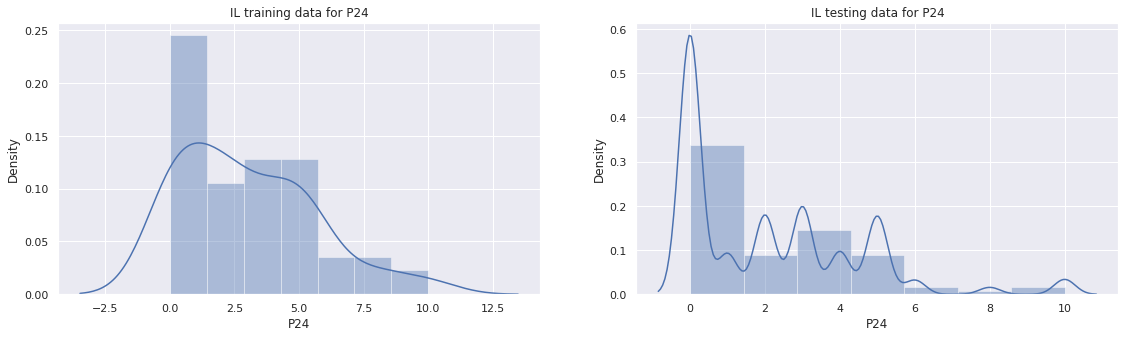

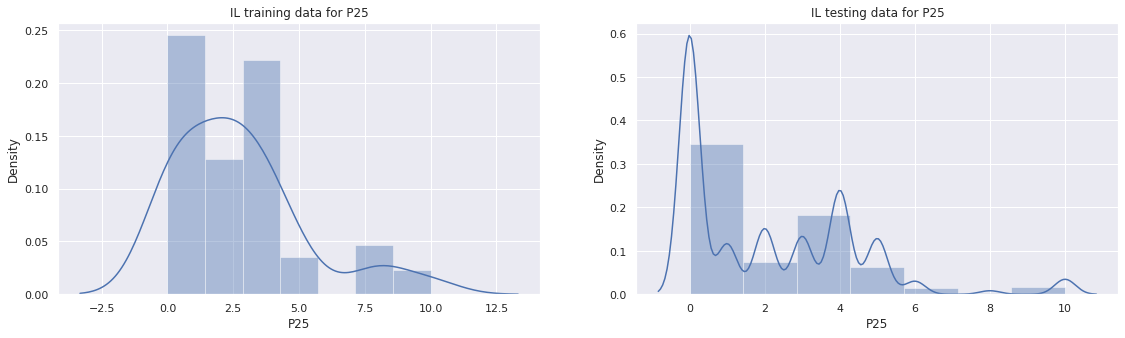

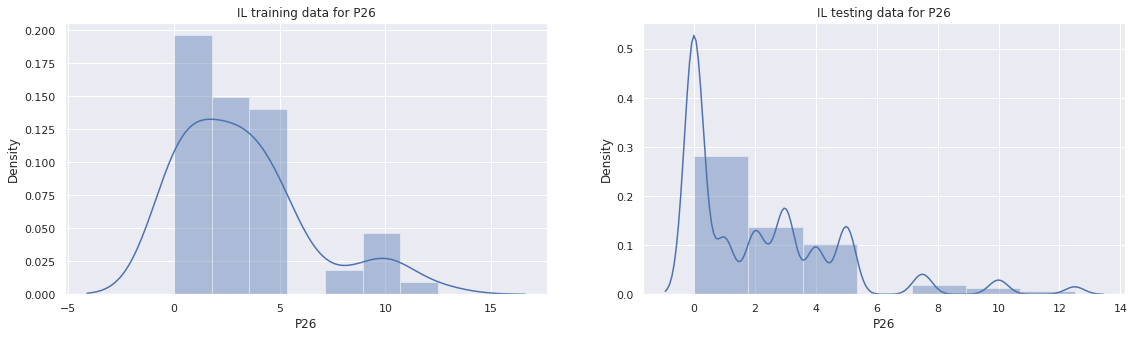

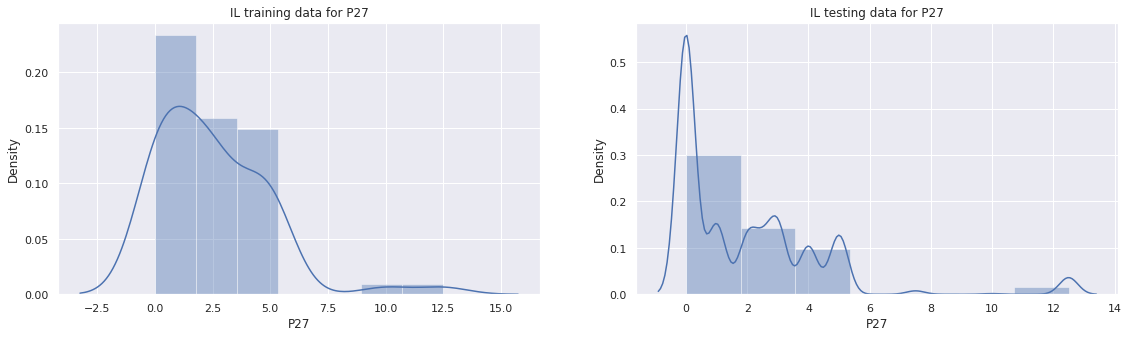

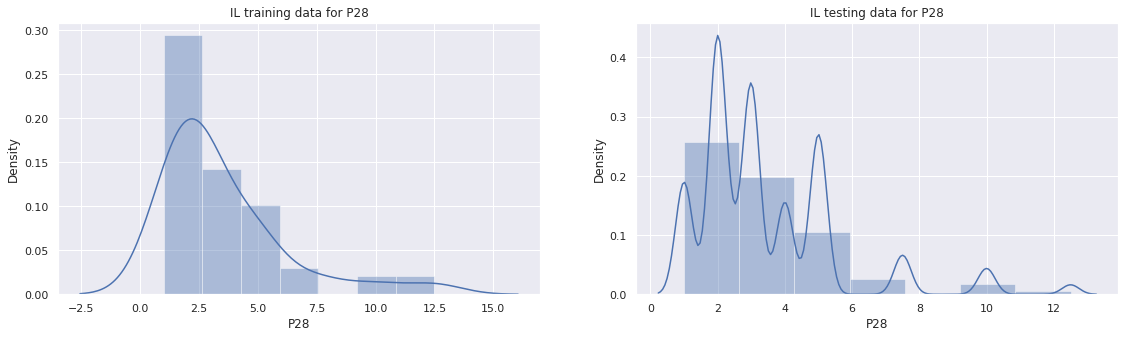

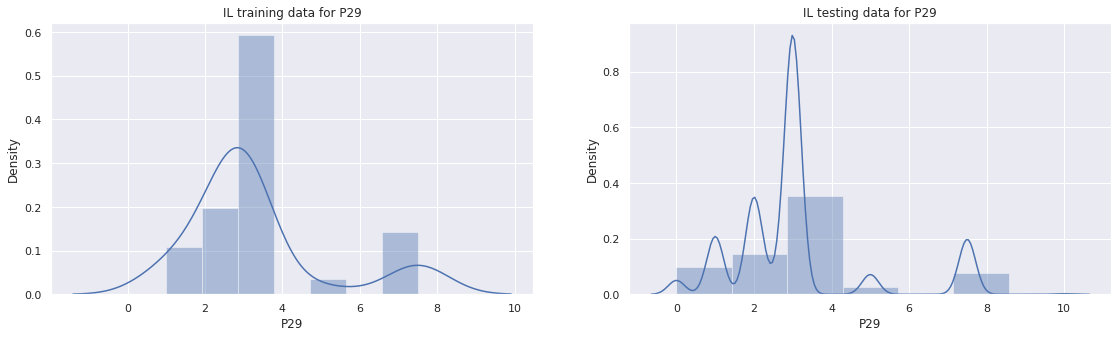

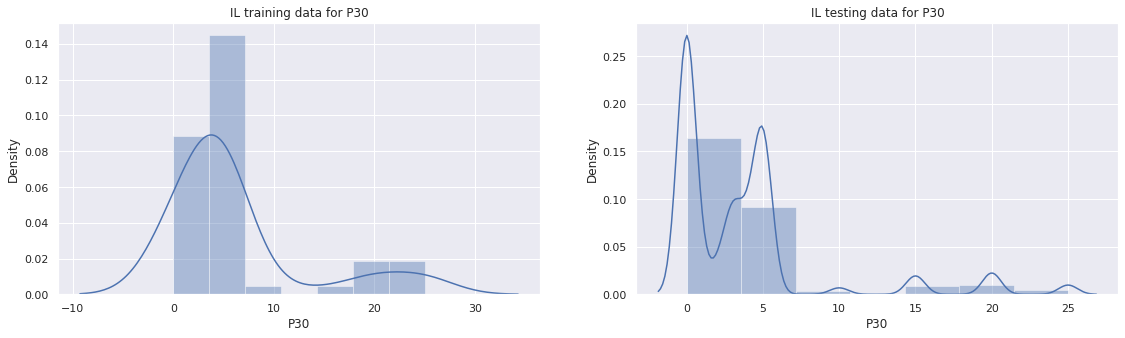

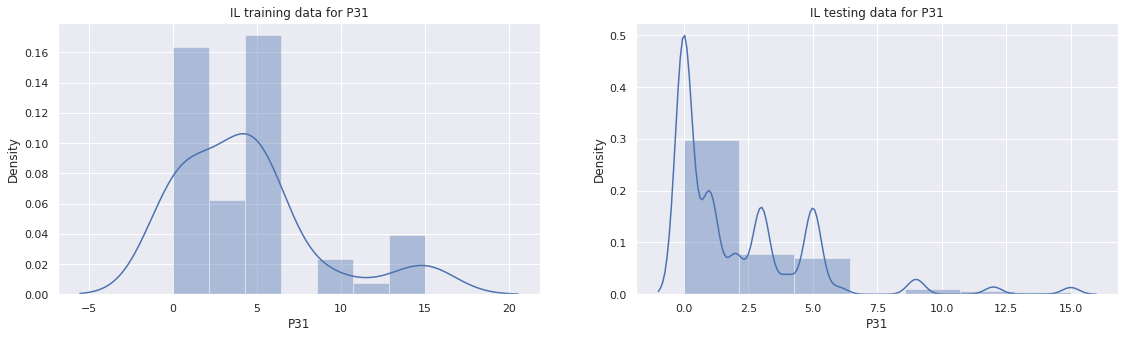

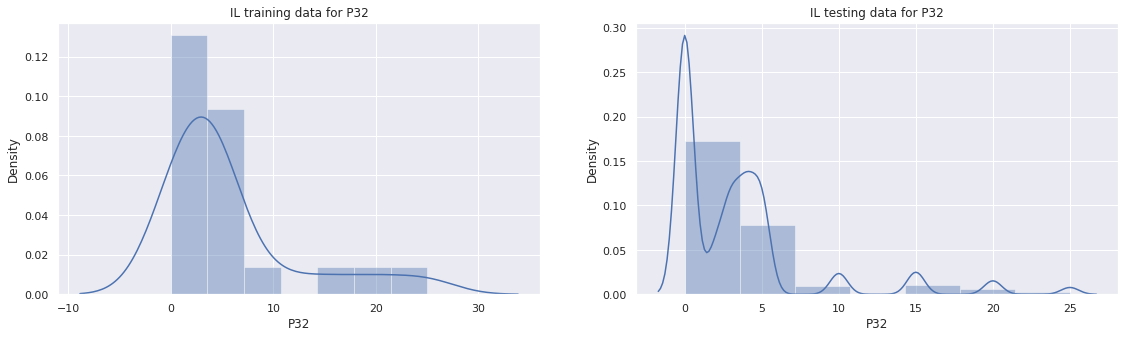

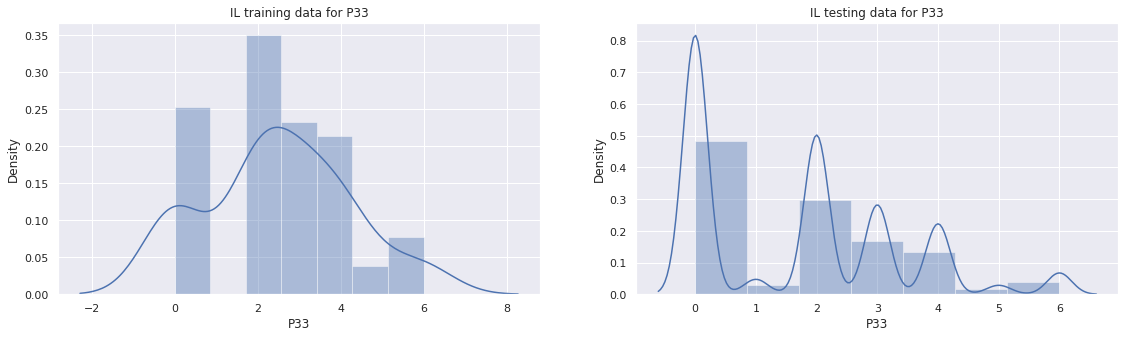

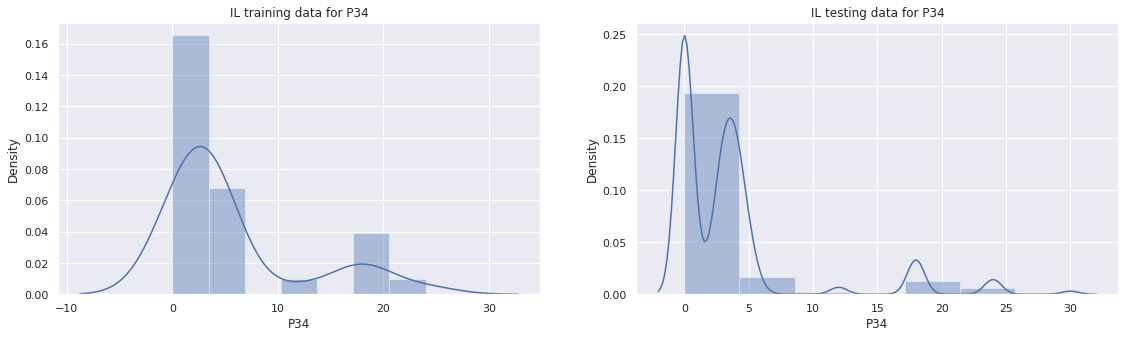

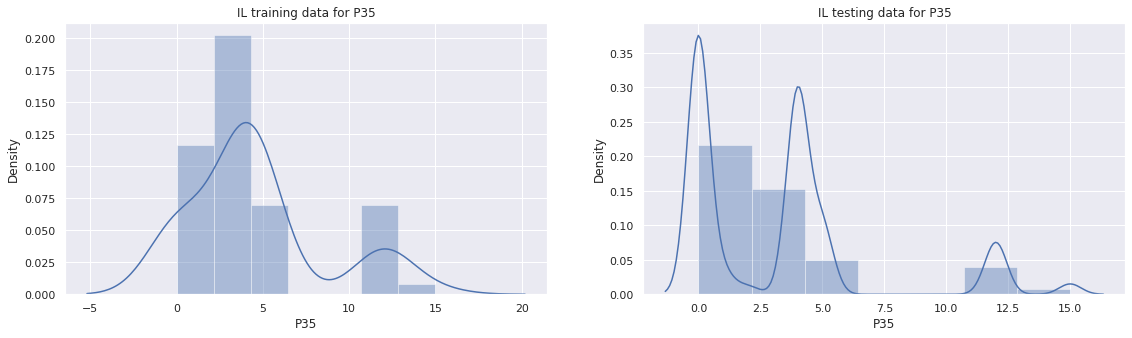

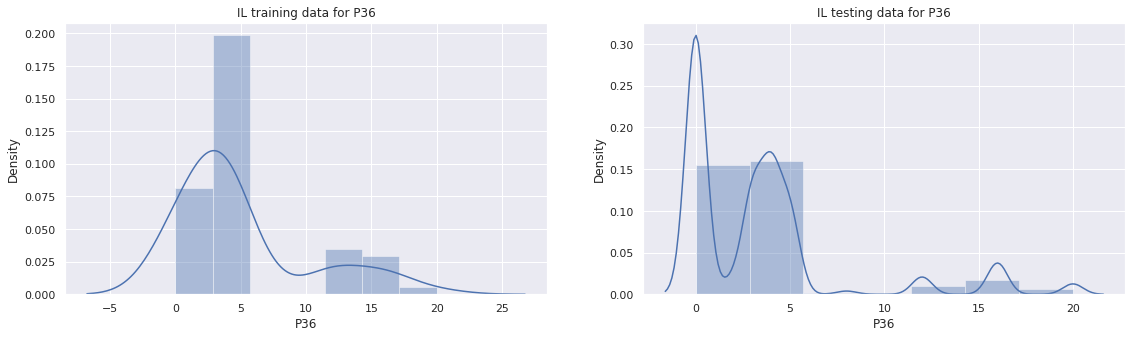

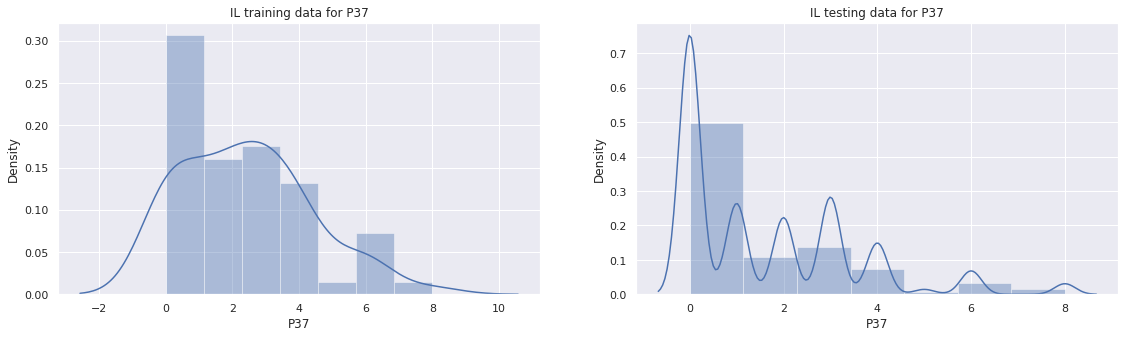

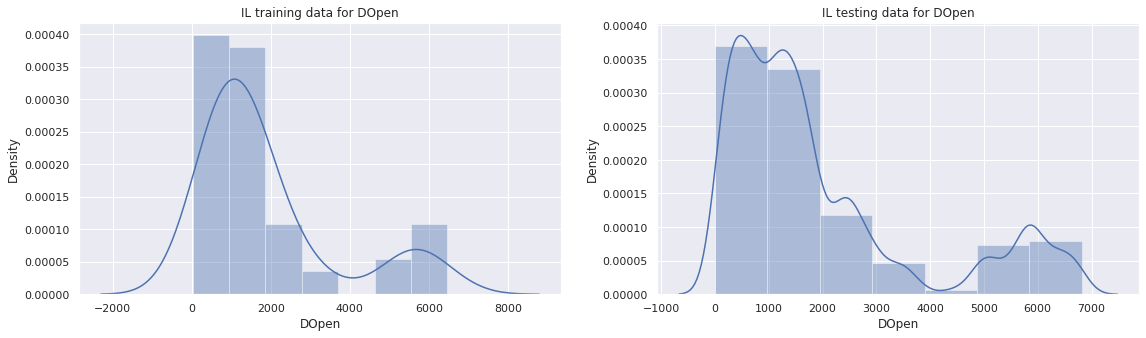

In [24]:
for i in cols_num:
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    g1 = sns.distplot(df_train[i][df_train['Type'] == 'IL'], ax=ax[0], bins = 7).set(title = 'IL training data for '+ i)
    g2 = sns.distplot(df_test[i][df_test['Type'] == 'IL'], ax=ax[1], bins = 7).set(title = 'IL testing data for '+ i)
    fig.show()

The test data even for the IL restaurant also contains zero and demonstrate variation from the training data. As we hope to use standard scaling to aid the regression analysis, solution selected is to merge the train and test datasets for scaling and resplit for analysis.

### merge files

In [25]:
df_merged = pd.concat([df_test, df_train], axis=0, ignore_index=True).copy()
df_merged.shape

(100137, 44)

Detail analysis to determine if any attributes need log scaling prior to normalization.  First lets looking at the target (revenue), second the object columns, and finally the Ps columns.

### Evalute target (revenue)

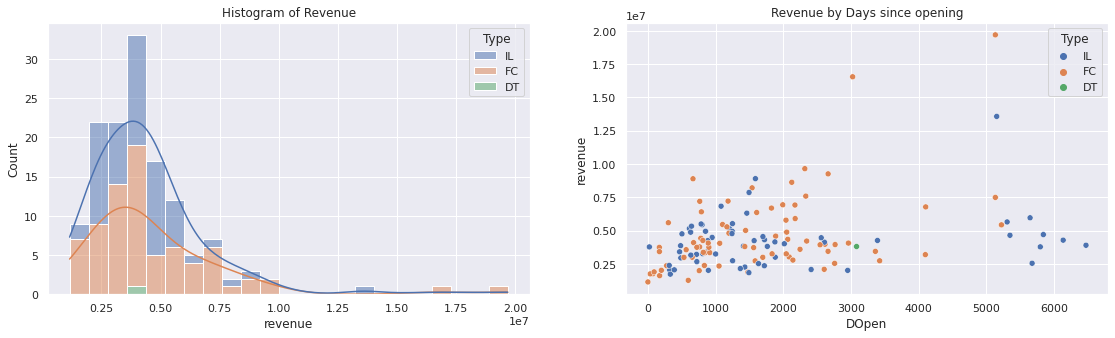

In [26]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(data=df_train, x="revenue", hue="Type", multiple="stack", kde=True, ax = ax[0]).set(title='Histogram of Revenue');
g2 = sns.scatterplot(data=df_train,x="DOpen",y="revenue", hue="Type", ax = ax[1]).set(title='Revenue by Days since opening');
fig.show();

Revenue appears to be highly right-hand scud with 3 outliers

In [27]:
print(df_train[df_train.revenue > 12500000])

    Id      City  City Group Type  P1   P2   P3   P4  P5  P6  ...  P31  P32  \
16  16  İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2   5  ...    0    0   
75  75  İstanbul  Big Cities   FC   5  5.0  4.0  5.0   1   4  ...    0    0   
99  99  İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   4  ...    5    4   

    P33  P34  P35  P36  P37     revenue      ODate   DOpen  
16    0    0    0    0    0  19696939.0 2000-01-07  5132.0  
75    0    0    0    0    0  16549064.0 2005-10-15  3024.0  
99    2    5    5    5    3  13575224.0 1999-12-18  5152.0  

[3 rows x 44 columns]


The 3 outliers are all in Istanbul with the 2 highest values both type FC (food court). These 2 will also be hampered by the missing Ps values.

In [28]:
df_train[cols_num][df_train.revenue > 12500000].describe().T

count         mean          std     min     25%     50%     75%     max
P1       3.0     4.000000     1.000000     3.0     3.5     4.0     4.5     5.0
P2       3.0     5.000000     0.000000     5.0     5.0     5.0     5.0     5.0
P3       3.0     4.000000     0.000000     4.0     4.0     4.0     4.0     4.0
P4       3.0     4.333333     0.577350     4.0     4.0     4.0     4.5     5.0
P5       3.0     1.666667     0.577350     1.0     1.5     2.0     2.0     2.0
P6       3.0     4.333333     0.577350     4.0     4.0     4.0     4.5     5.0
P7       3.0     5.000000     0.000000     5.0     5.0     5.0     5.0     5.0
P8       3.0     3.666667     0.577350     3.0     3.5     4.0     4.0     4.0
P9       3.0     4.333333     0.577350     4.0     4.0     4.0     4.5     5.0
P10      3.0     4.000000     0.000000     4.0     4.0     4.0     4.0     4.0
P11      3.0     4.333333     1.154701     3.0     4.0     5.0     5.0     5.0
P12      3.0     3.666667     1.154701     3.0     3.0     3.0     4.0     5.0
P13      3.0     4.000000     0.000000     4.0     4.0     4.0     4.0     4.0
P14      3.0     1.666667     2.886751     0.0     0.0     0.0     2.5     5.0
P15      3.0     1.666667     2.886751     0.0     0.0     0.0     2.5     5.0
P16      3.0     1.666667     2.886751     0.0     0.0     0.0     2.5     5.0
P17      3.0     1.666667     2.886751     0.0     0.0     0.0     2.5     5.0
P18      3.0     1.666667     2.886751     0.0     0.0     0.0     2.5     5.0
P19      3.0     3.666667     2.309401     1.0     3.0     5.0     5.0     5.0
P20      3.0     4.666667     0.577350     4.0     4.5     5.0     5.0     5.0
P21      3.0     3.666667     2.309401     1.0     3.0     5.0     5.0     5.0
P22      3.0     3.000000     2.000000     1.0     2.0     3.0     4.0     5.0
P23      3.0     2.000000     1.732051     1.0     1.0     1.0     2.5     4.0
P24      3.0     1.666667     2.886751     0.0     0.0     0.0     2.5     5.0
P25      3.0     1.666667     2.886751     0.0     0.0     0.0     2.5     5.0
P26      3.0     1.666667     2.886751     0.0     0.0     0.0     2.5     5.0
P27      3.0     0.333333     0.577350     0.0     0.0     0.0     0.5     1.0
P28      3.0     4.000000     1.732051     2.0     3.5     5.0     5.0     5.0
P29      3.0     1.000000     1.000000     0.0     0.5     1.0     1.5     2.0
P30      3.0     1.666667     2.886751     0.0     0.0     0.0     2.5     5.0
P31      3.0     1.666667     2.886751     0.0     0.0     0.0     2.5     5.0
P32      3.0     1.333333     2.309401     0.0     0.0     0.0     2.0     4.0
P33      3.0     0.666667     1.154701     0.0     0.0     0.0     1.0     2.0
P34      3.0     1.666667     2.886751     0.0     0.0     0.0     2.5     5.0
P35      3.0     1.666667     2.886751     0.0     0.0     0.0     2.5     5.0
P36      3.0     1.666667     2.886751     0.0     0.0     0.0     2.5     5.0
P37      3.0     1.000000     1.732051     0.0     0.0     0.0     1.5     3.0
DOpen    3.0  4436.000000  1222.868758  3024.0  4078.0  5132.0  5142.0  5152.0

5 Ps columns are consistent with these 3 high revenue point (P2, P3, P7, P10 & P13).

The revenue appears to be right-hand skewed and a log normalization may be appropriate,

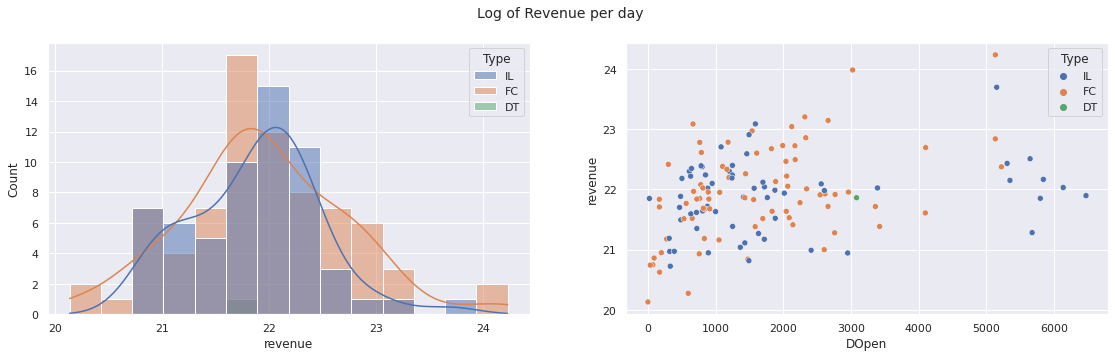

In [29]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(x=np.log2(df_train['revenue']),hue=df_train["Type"], kde=True, ax=ax[0]);
g2 = sns.scatterplot(x=df_train['DOpen'],y=np.log2(df_train['revenue']),hue=df_train["Type"], ax=ax[1]);
plt.suptitle('Log of Revenue per day',fontsize=14)
fig.show();

Log2 normalization appears appropriate but there also appears a relationship with the number of years open.

In [30]:
df_merged['revenue_log'] = np.log2(df_merged['revenue'])

Before conducting the z transform of the target ('revenue_log') preserve the mean and the std.

In [31]:
target_mean = np.mean(df_merged['revenue'])
target_std = np.std(df_merged['revenue'])
Ltarget_mean = np.mean(df_merged['revenue_log'])
Ltarget_std = np.std(df_merged['revenue_log'])
print(target_mean,target_std,Ltarget_mean,Ltarget_std)

4453532.613138686 2566652.6552286986 21.910487445442943 0.690979861125018


In [32]:
from sklearn.linear_model import LinearRegression

# Creating the model
model_lr = LinearRegression()

df_train['DOpen2'] = np.power(df_train['DOpen'],2)

# Linear model on the train data
features = ['DOpen']
model_lr.fit(df_train[features], df_train['revenue'])
DOpenInt = model_lr.intercept_
DOpen1 = model_lr.coef_
print('Intercept is ', DOpenInt,' +', DOpen1[0],' days open')

# Training the model on the train data
features = ['DOpen','DOpen2']
model_lr.fit(df_train[features], df_train['revenue'])
df_train.drop(columns = ['DOpen2'], inplace=True)
DOpenInt2 = model_lr.intercept_
DOpen2 = model_lr.coef_
print('Intercept is ', DOpenInt2,' +', DOpen2[0],' days open +', DOpen2[1], 'days open^2')

Intercept is  3443613.254943925  + 570.4912136129003  days open
Intercept is  2814603.5535074137  + 1319.5897601002264  days open + -0.13195921500491015 days open^2


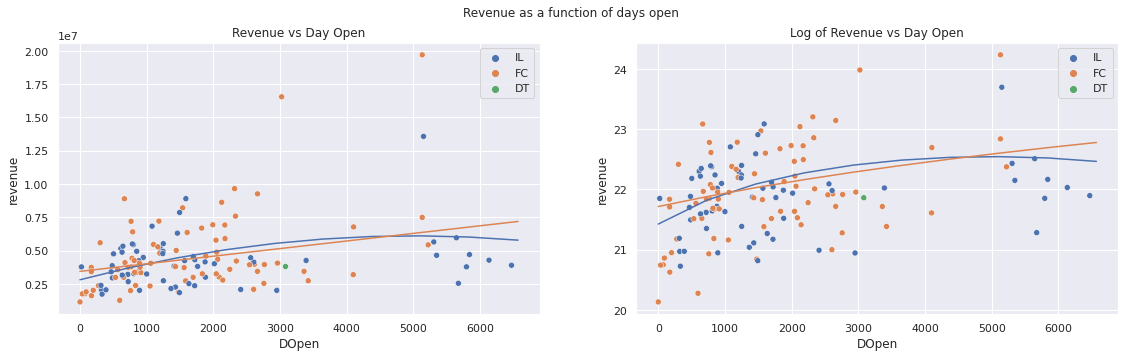

In [33]:
DayRange = np.arange(np.min(df_train['DOpen']),np.max(df_train['DOpen']+500), 365*2)

RevDOpen1 = DOpenInt + (DOpen1[0] * DayRange)
RevDOpen = DOpenInt2 + (DOpen2[0] * DayRange) + (DOpen2[1] * np.power(DayRange,2))

fig, ax = plt.subplots(1, 2, figsize=(19,5))
g1 = sns.scatterplot(data=df_train,x="DOpen",y="revenue", hue="Type", ax = ax[0]).set(title = 'Revenue vs Day Open')
g1 = sns.lineplot(x=DayRange, y=RevDOpen, ax = ax[0]);
g1 = sns.lineplot(x=DayRange, y=RevDOpen1, ax = ax[0]);
g2 = sns.scatterplot(x = df_train["DOpen"],y = np.log2(df_train["revenue"]), hue=df_train["Type"], ax = ax[1]).set(title = 'Log of Revenue vs Day Open')
g2 = sns.lineplot(x=DayRange, y=np.log2(RevDOpen), ax = ax[1]);
g2 = sns.lineplot(x=DayRange, y=np.log2(RevDOpen1), ax = ax[1]);
#sns.lineplot(x=DayRange, y=RevDOpen2);
plt.suptitle('Revenue as a function of days open');

Revenue increase with time makes sense as underperforming restaurants would likely be closed.  The contest intent was to use the Demographic, Real estate and Commercial data to estimate revenue.   I have tested dropping DOpen but this appears to reduce the overall performance when doing a submission to the Kaggle contest.

The next item is to check the city and add a population estimate.

### City Analysis

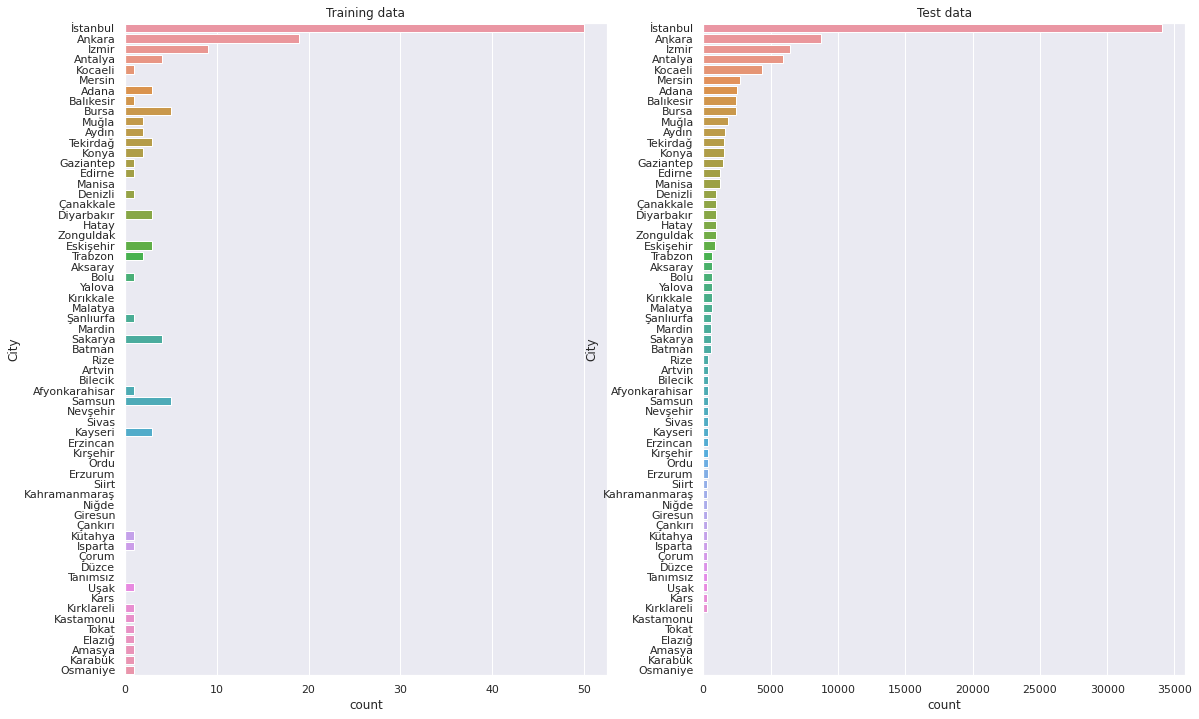

In [34]:
fig, ax = plt.subplots(1,2, figsize=(19, 12))
large_to_small = df_merged.groupby('City').size().sort_values().index[::-1]
g1 = sns.countplot(data = df_train, y = "City", order=large_to_small, ax=ax[0]).set(title='Training data')
g2 = sns.countplot(data = df_test, y = "City",order=large_to_small, ax=ax[1]).set(title='Test data')
fig.show()

In [35]:
print("Unique cities in training set", df_train['City'].nunique(), "and in the test set", df_test['City'].nunique(),'\n')
cities = df_test['City'].unique()
cities

Unique cities in training set 34 and in the test set 57 



array(['Niğde', 'Konya', 'Ankara', 'Kocaeli', 'Afyonkarahisar',
       'Eskişehir', 'Rize', 'İstanbul', 'Trabzon', 'Antalya', 'Muğla',
       'Düzce', 'Adana', 'Bursa', 'Aydın', 'Hatay', 'Denizli', 'İzmir',
       'Gaziantep', 'Samsun', 'Erzurum', 'Edirne', 'Balıkesir', 'Mersin',
       'Zonguldak', 'Malatya', 'Çanakkale', 'Kars', 'Bolu', 'Batman',
       'Bilecik', 'Giresun', 'Tekirdağ', 'Sivas', 'Kırıkkale', 'Mardin',
       'Erzincan', 'Manisa', 'Diyarbakır', 'Kahramanmaraş', 'Yalova',
       'Tanımsız', 'Sakarya', 'Kırşehir', 'Aksaray', 'Kayseri',
       'Nevşehir', 'Çorum', 'Ordu', 'Kırklareli', 'Şanlıurfa', 'Artvin',
       'Uşak', 'Kütahya', 'Siirt', 'Çankırı', 'Isparta'], dtype=object)

Significantly more cities in the test data than the train dataset along with a variation in the sampling of the smaller (other) cities.

Remove the unicode from the City names and replace with standard English.

In [36]:
s = pd.Series(df_merged['City'])

df_merged['CityEN'] = s.str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

citiesEN = df_merged['CityEN'].unique()

In [37]:
print("The number of cities in the merged file ",df_merged['CityEN'].nunique())

The number of cities in the merged file  63


The final number of cites would indicate some of the smaller cities only exist in the training data. Next item is to import csv with Turkey city population source worldpopulationreview.com

In [38]:
filename = filepath + '/CityPopulation.csv'
print(filename)
df_city = pd.read_csv(filename)
df_city.head()

/content/drive/MyDrive/CDS_Course/project/CityPopulation.csv


City  Population
0  Istanbul    14804116
1    Ankara     3517182
2     Izmir     2500603
3     Bursa     1412701
4     Adana     1248988

In [39]:
cityD = pd.Series(df_city.Population.values,index=df_city.City).to_dict()

Populate a column with the city populations

In [40]:
df_merged['City_Pop'] = df_merged['CityEN'].map(cityD) 
df_merged['City_Pop'][df_merged['City_Pop'] == 0] = np.nan
print("The number of cities that we don't have population",df_merged['City_Pop'].isna().sum().sum())

The number of cities that we don't have population 13708


To estimate population to the missing cities, check if the number of restaurant in a city can be used as an estimater.

In [41]:
resCount = df_merged.groupby(['CityEN'])['CityEN'].count()
resC = pd.Series(resCount).to_dict()
df_merged['resC'] = df_merged['CityEN'].map(resC) 

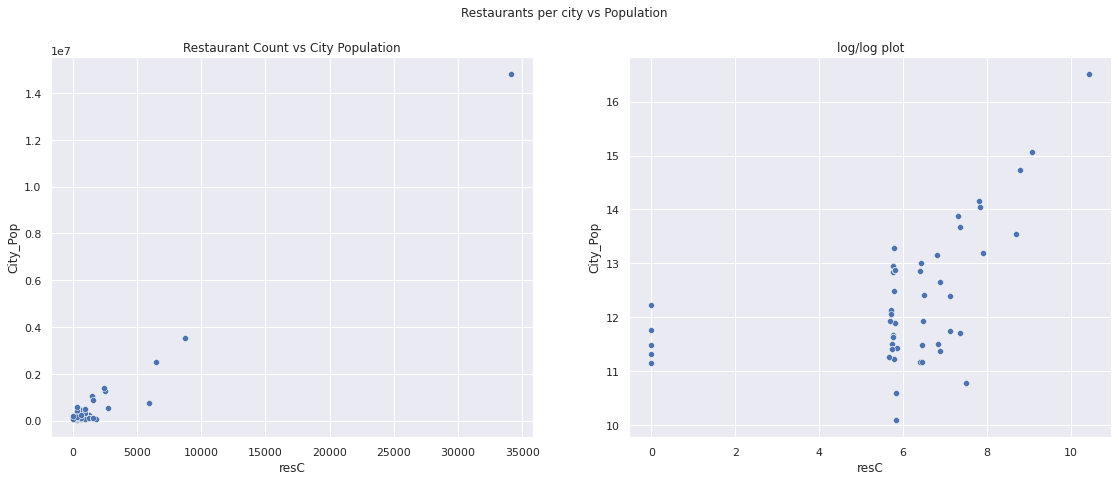

In [42]:
fig, ax = plt.subplots(1,2, figsize=(19, 7))
g1 = sns.scatterplot((df_merged["resC"]),(df_merged["City_Pop"]),ax=ax[0]).set(title='Restaurant Count vs City Population')
g2 = sns.scatterplot(np.log(df_merged["resC"]),np.log(df_merged["City_Pop"]),ax=ax[1]).set(title='log/log plot')
plt.suptitle('Restaurants per city vs Population');

Determine the relationship between number of restaurants and city size. Assume the best estimate is for zero restaurant to equate to zero population.

In [43]:
model_lr_rP = LinearRegression(fit_intercept=False)

# need to remove nan
df = pd.DataFrame({"X":df_merged['resC'],"Y":df_merged['City_Pop']})
df.dropna(inplace=True)

X = df.X.to_numpy()
X = X.reshape(-1,1)
Y = df.Y.to_numpy()
Y = Y.reshape(-1,1)

model_lr_rP.fit(X, Y)
rPSlope = model_lr_rP.coef_
print(model_lr_rP.intercept_,model_lr_rP.coef_)

0.0 [[431.15994563]]


In [44]:
from numpy.ma.core import arange
resL = arange(1,np.nanmax(df_merged['resC']),np.nanmax(df_merged['resC'])/50)
popL = resL * 431

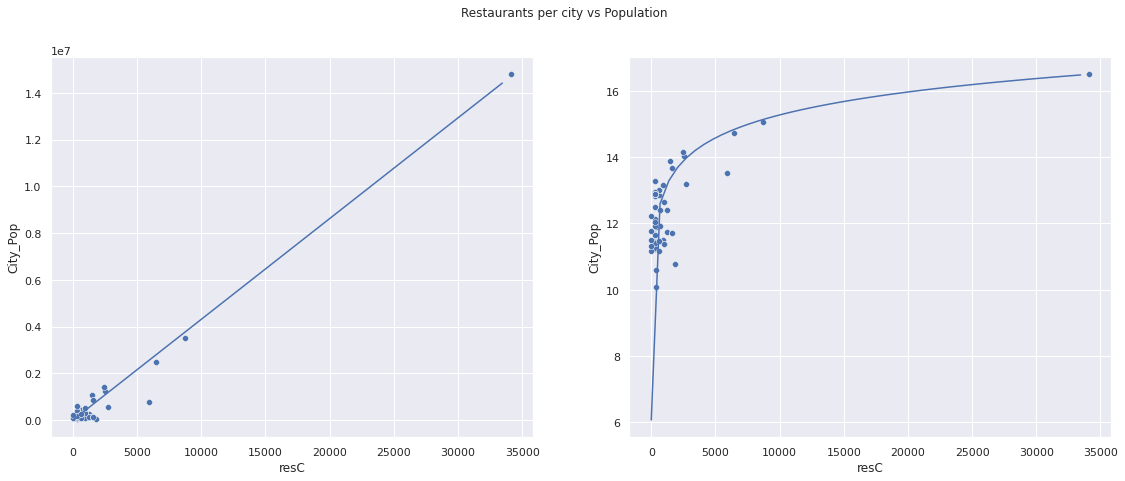

In [45]:
fig, ax = plt.subplots(1,2, figsize=(19, 7))
g1 = sns.scatterplot((df_merged["resC"]),(df_merged["City_Pop"]),ax=ax[0])
g1 = sns.lineplot((resL),(popL), ax= ax[0])
g2 = sns.scatterplot((df_merged["resC"]),np.log(df_merged["City_Pop"]),ax=ax[1])
g2 = sns.lineplot((resL),np.log(popL), ax = ax[1])
plt.suptitle('Restaurants per city vs Population');

Add an estimated population to each city that presently is nan

In [46]:
df_merged['City_Pop'] = df_merged['City_Pop'].fillna(df_merged['resC']*431)
print("The number of cities that now don't have a population estimate is",df_merged['City_Pop'].isna().sum().sum())

The number of cities that now don't have a population estimate is 0


Create the log of the city population

In [47]:
df_merged['City_Pop_log'] = np.log(df_merged['City_Pop'])

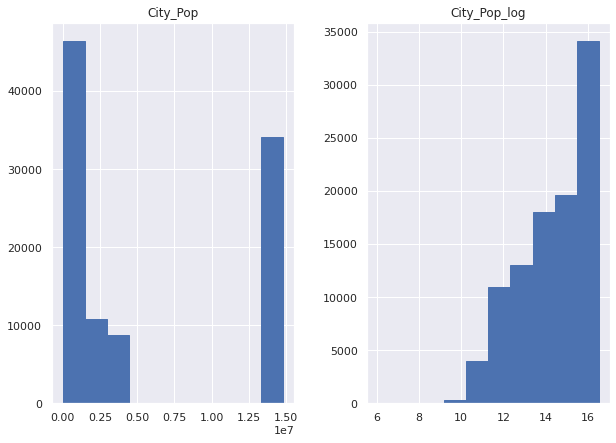

In [48]:
fplot = ['City_Pop','City_Pop_log']
df_merged[fplot].hist(figsize=(10,7),edgecolor='b');

City population bysed by the high proportion of restaurant in Istanbul 

### Ps column analysis

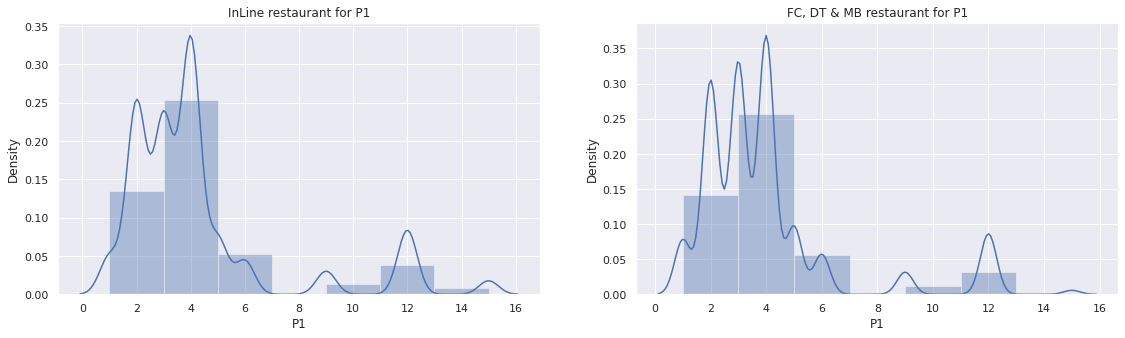

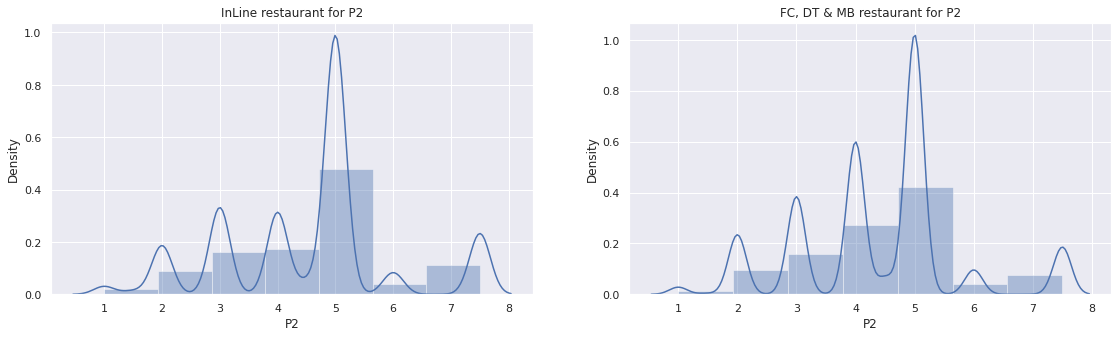

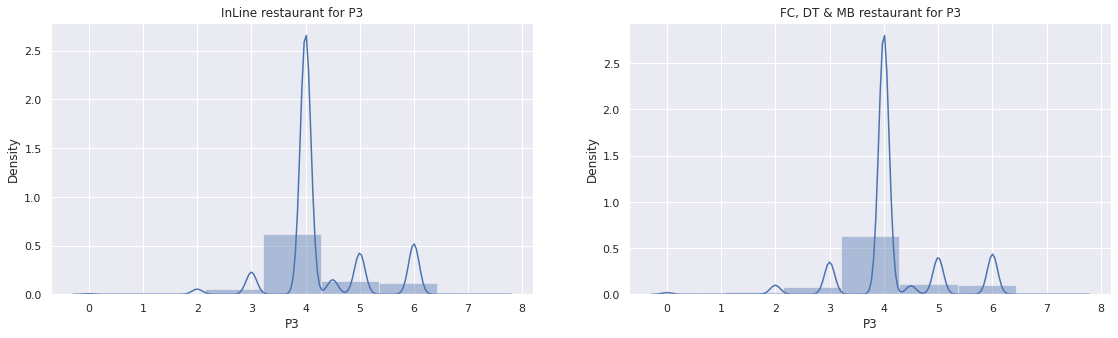

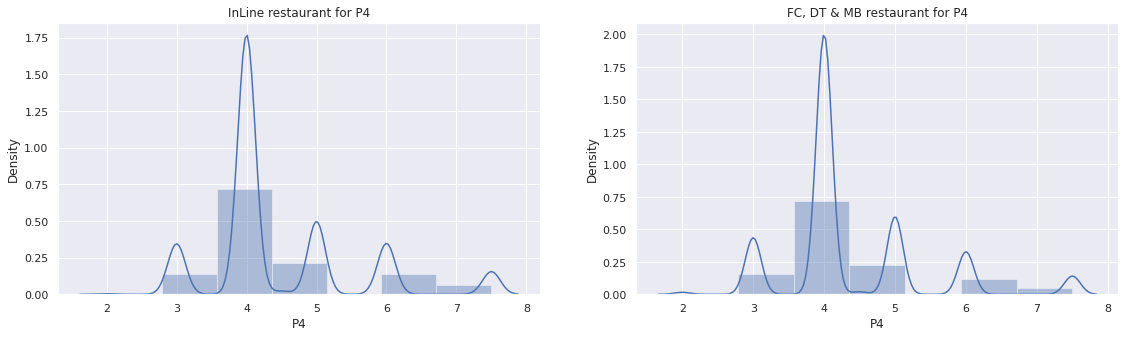

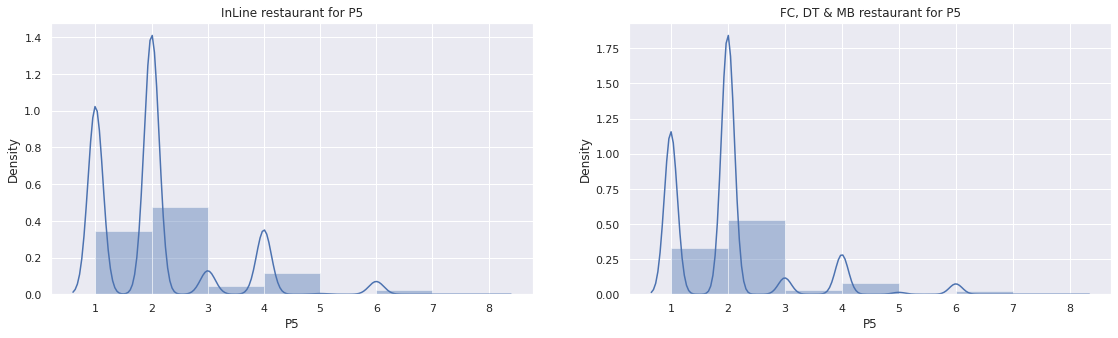

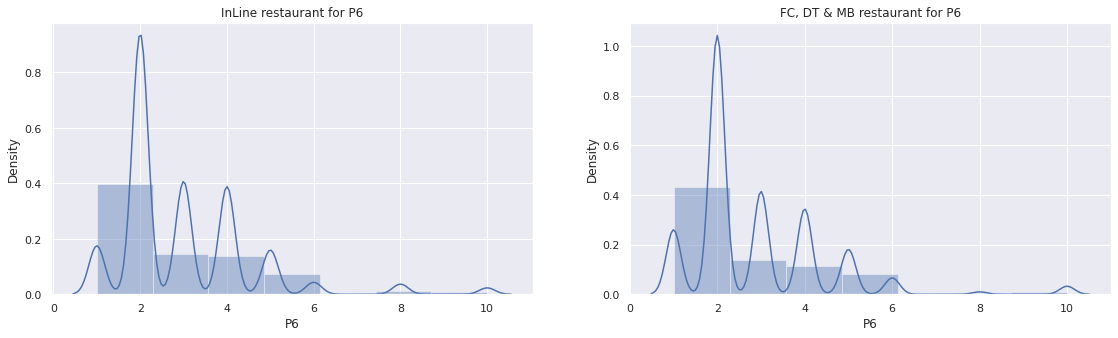

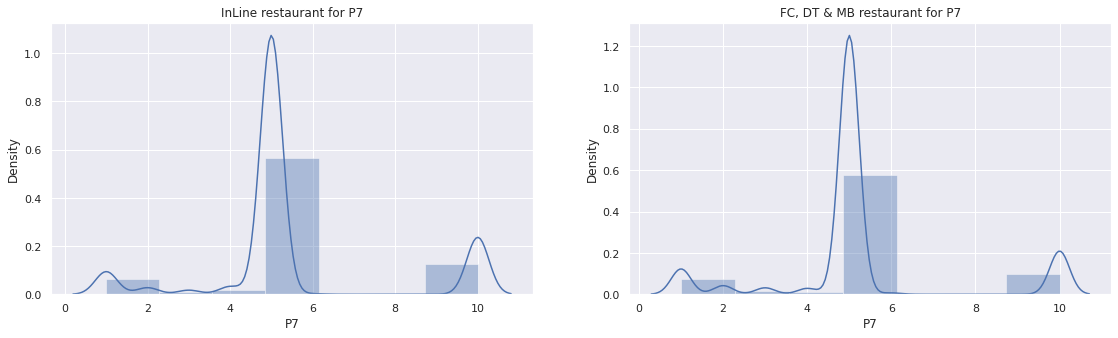

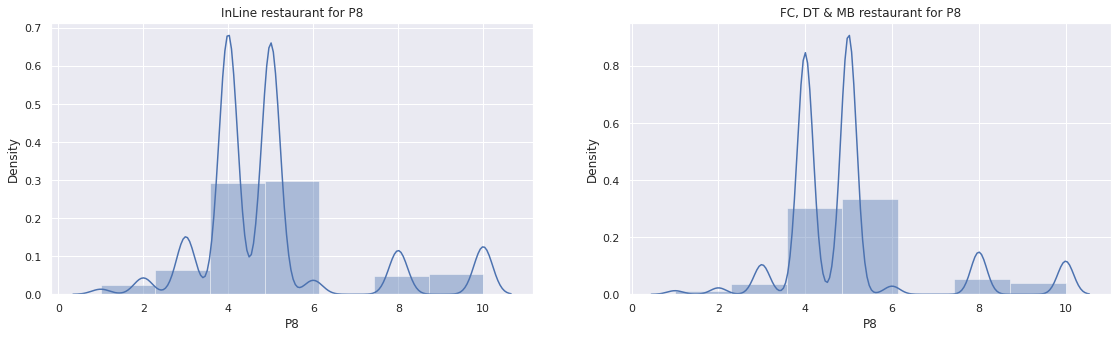

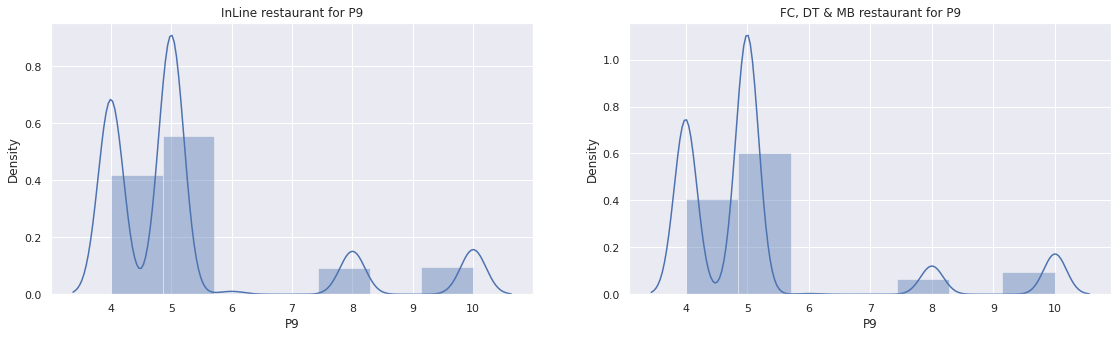

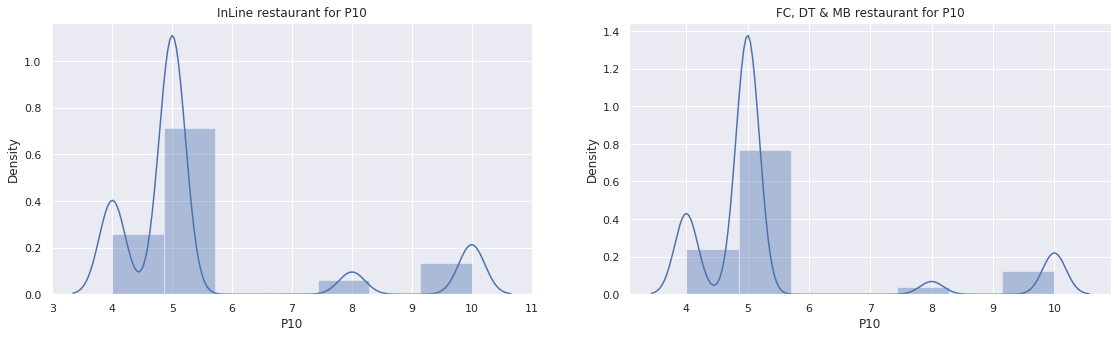

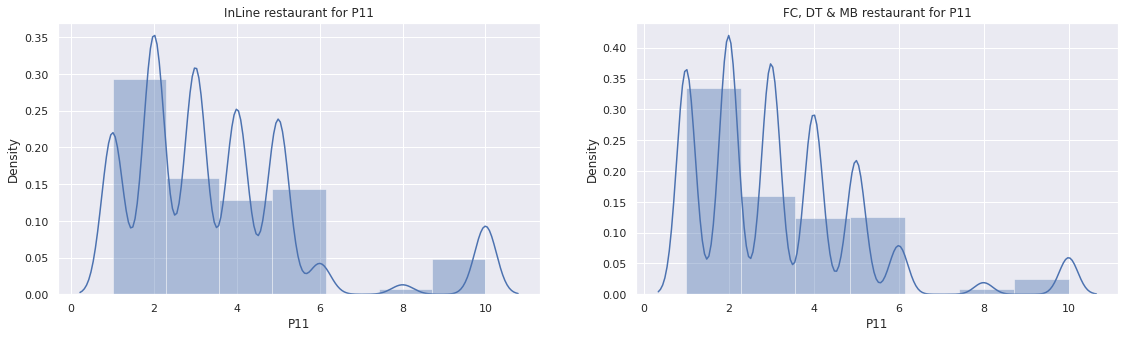

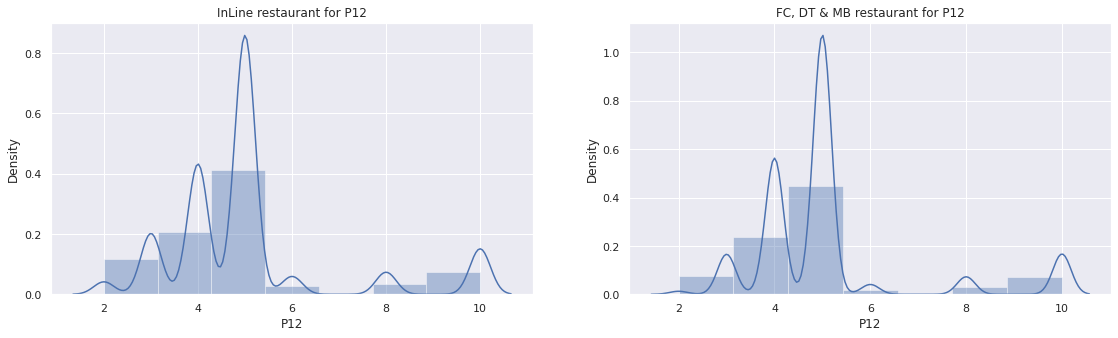

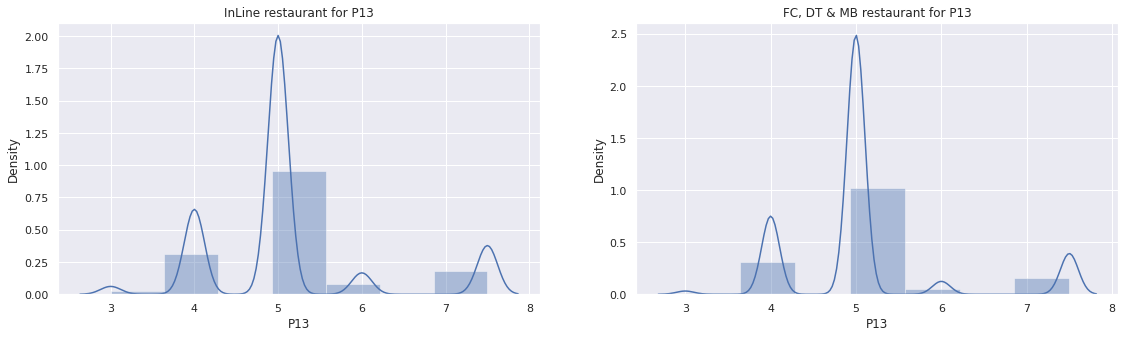

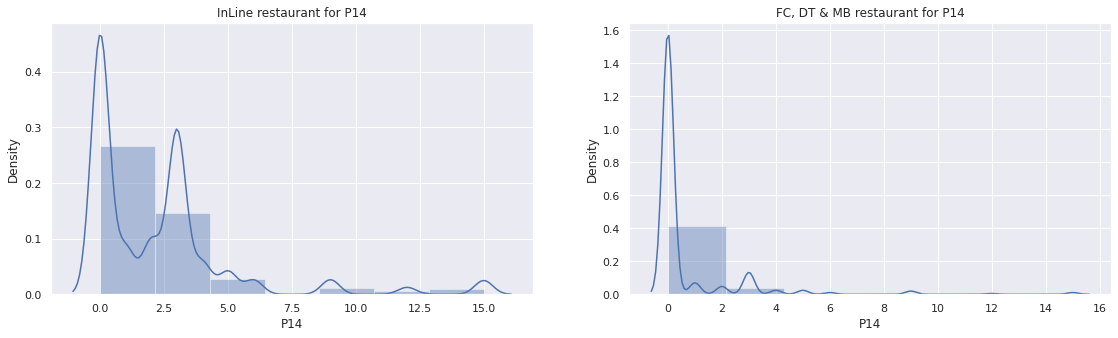

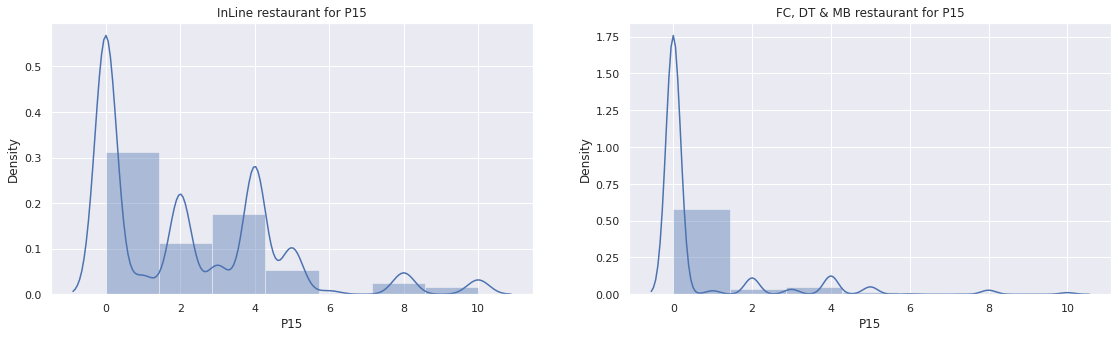

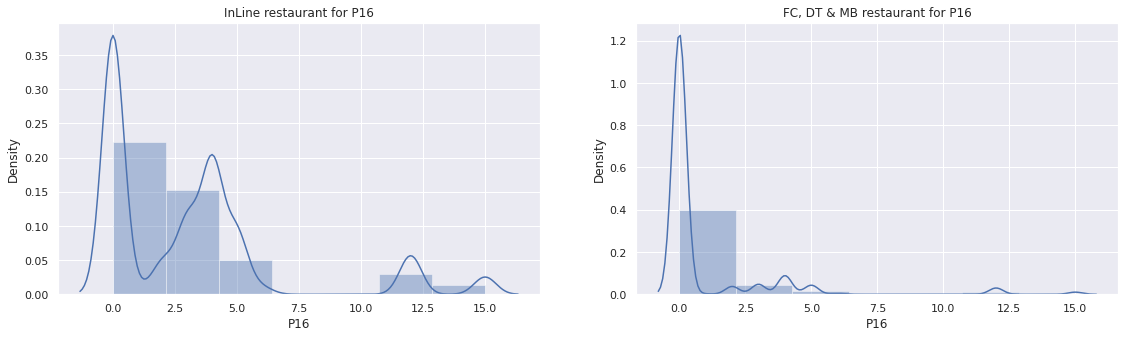

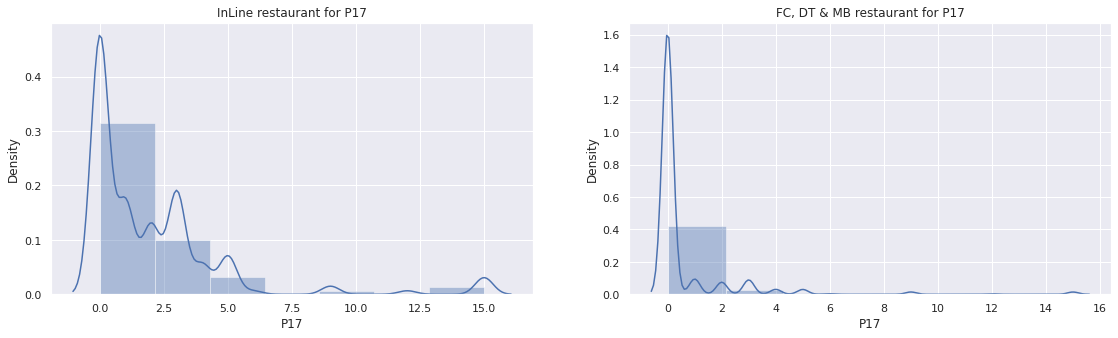

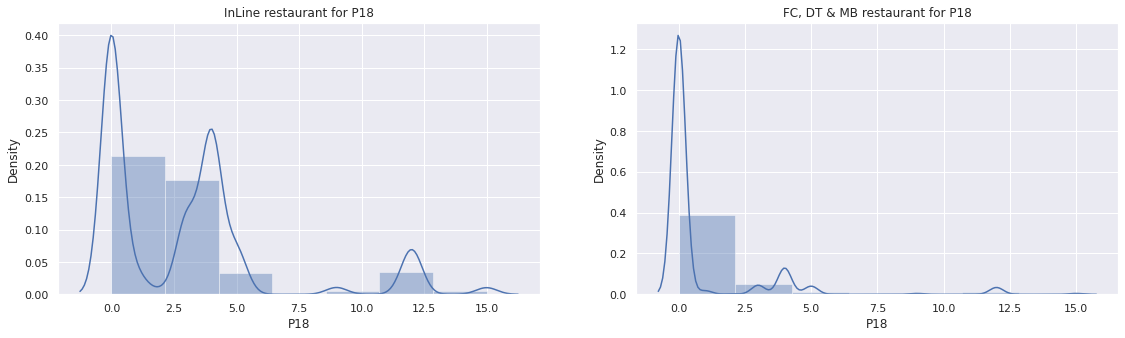

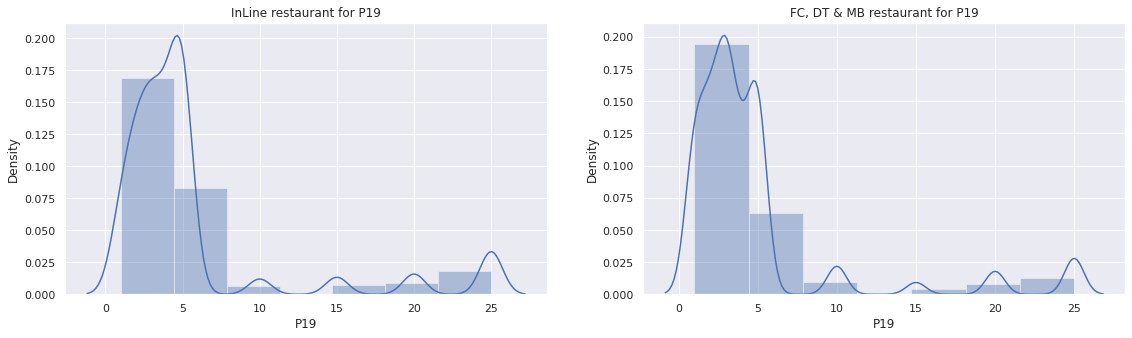

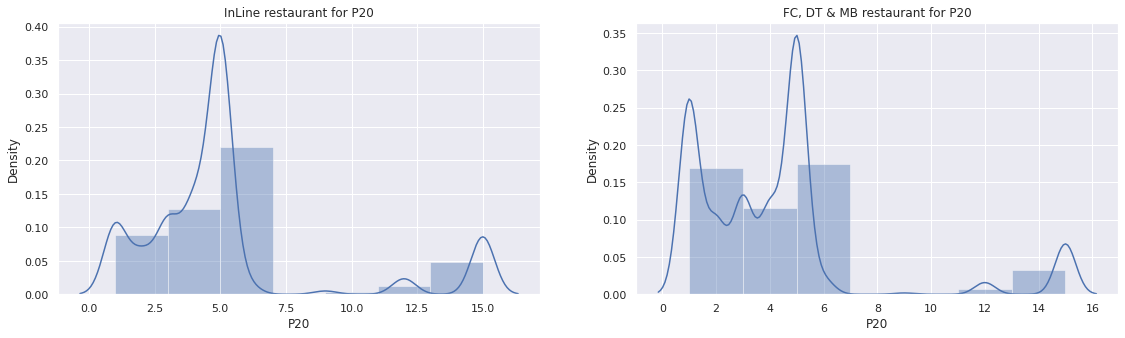

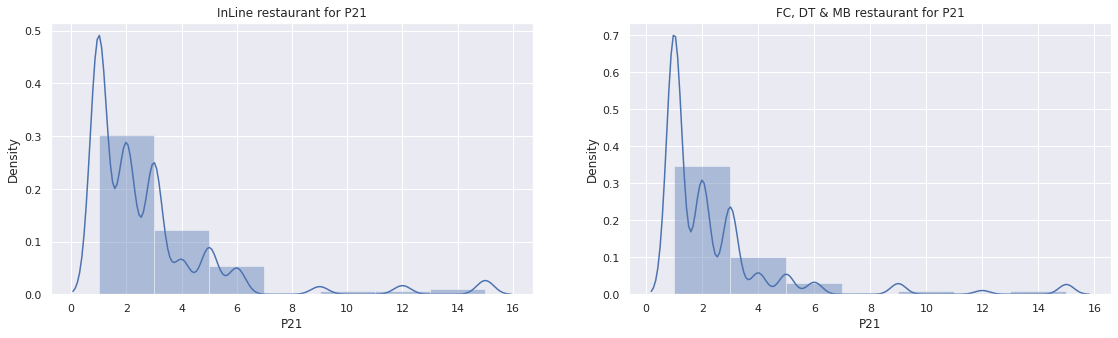

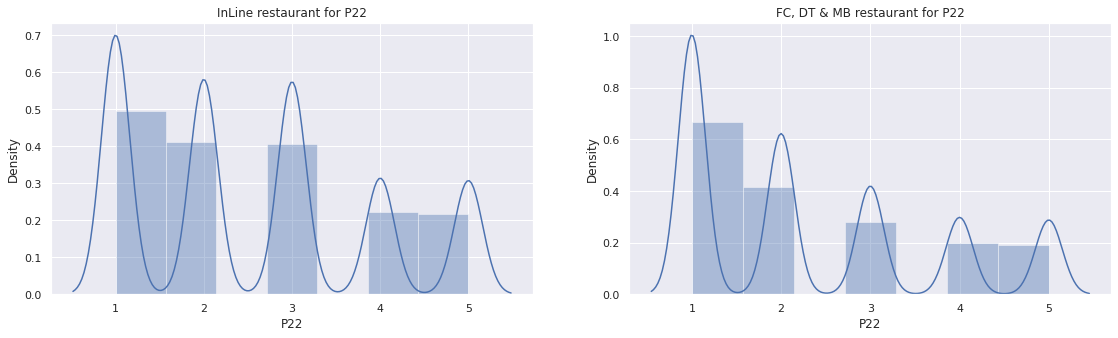

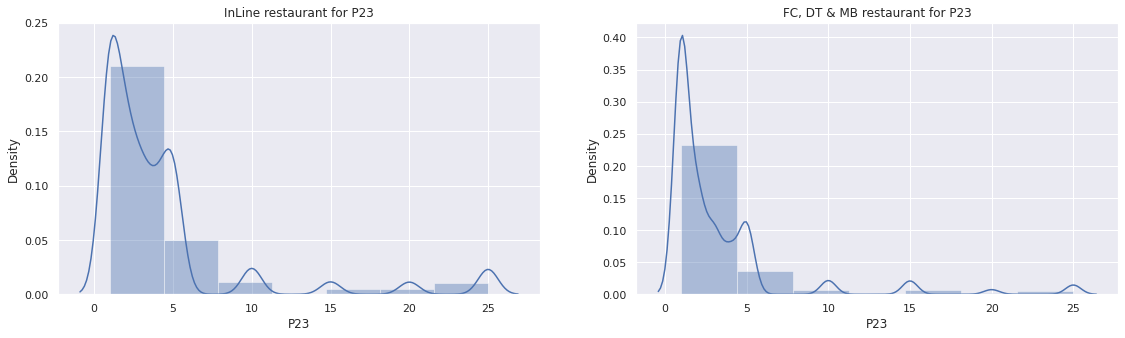

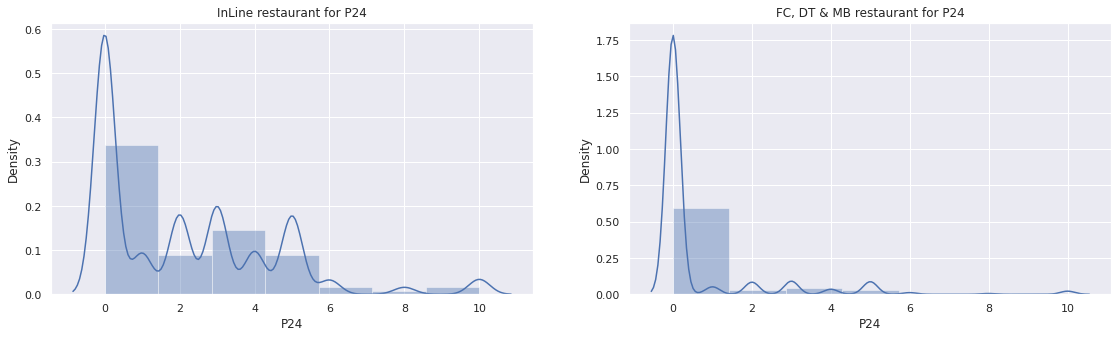

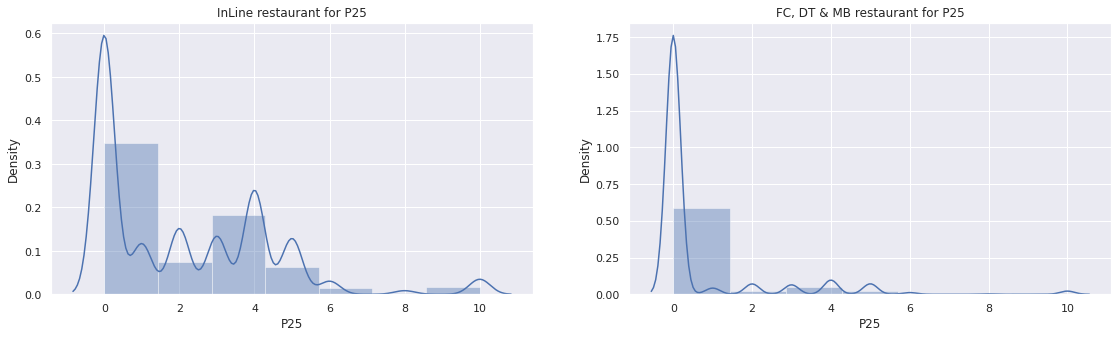

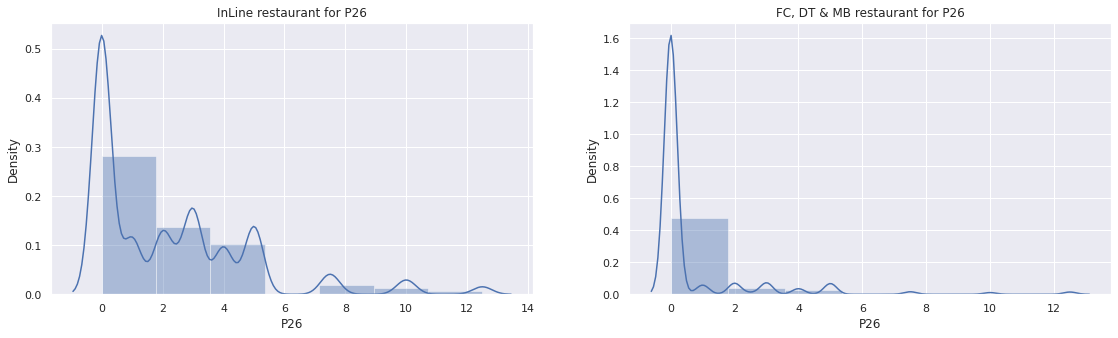

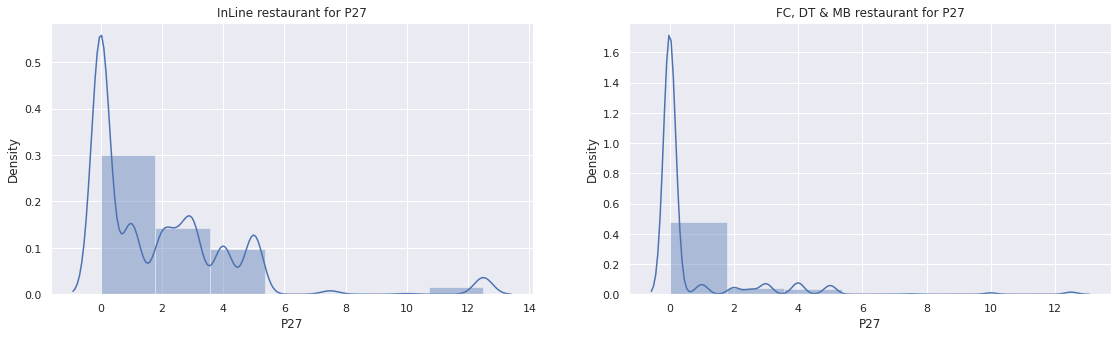

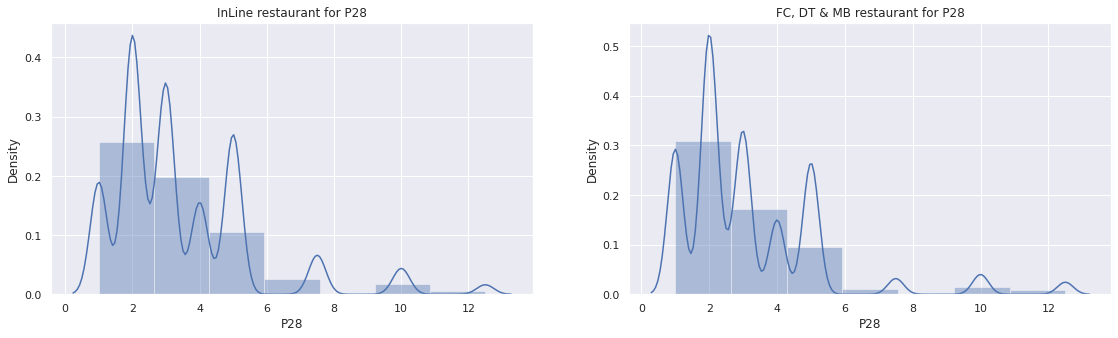

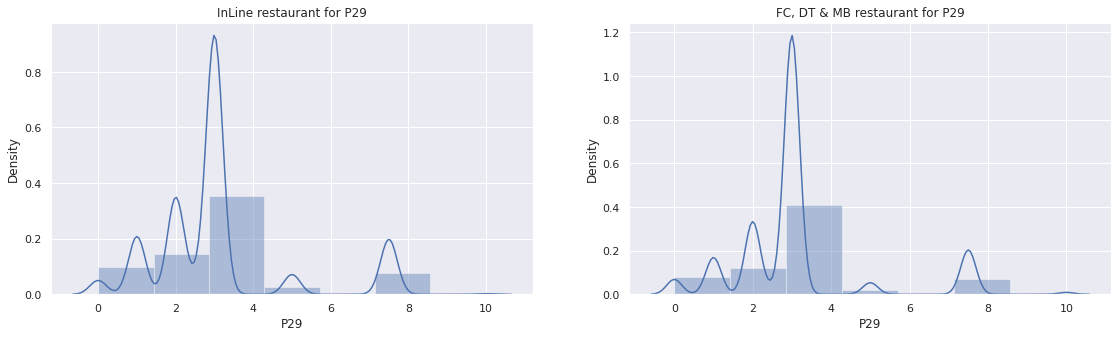

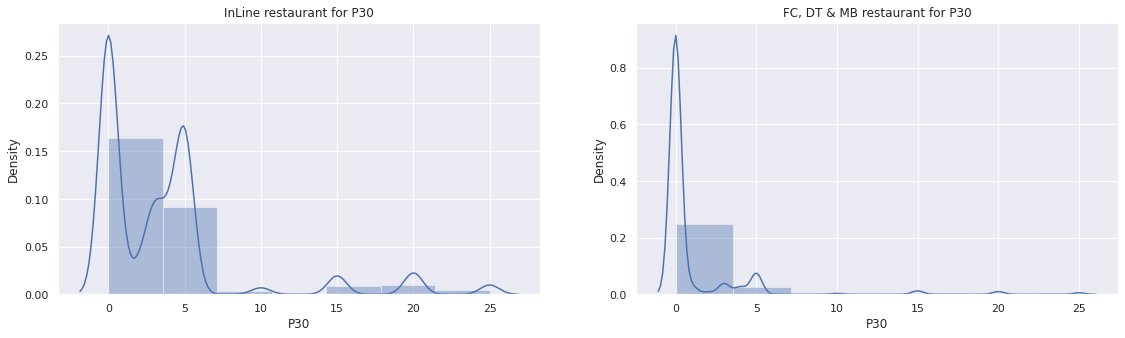

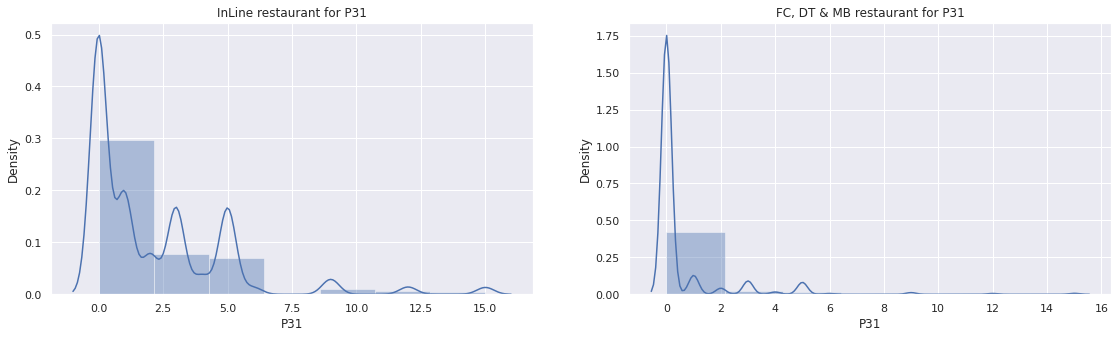

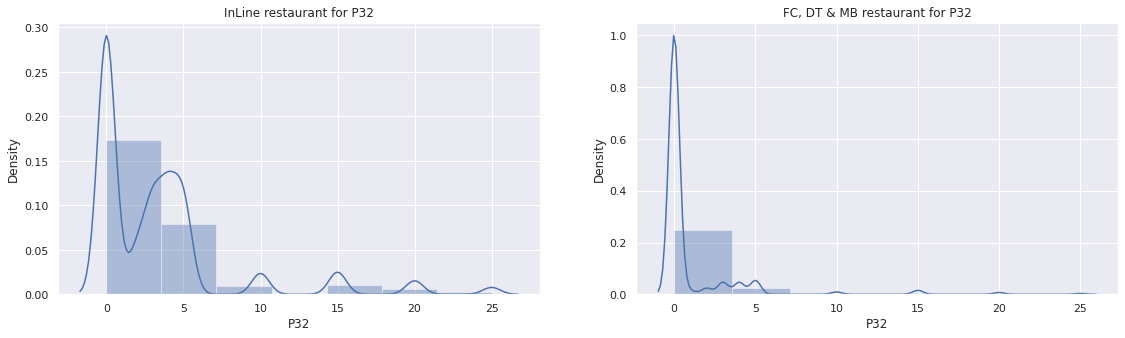

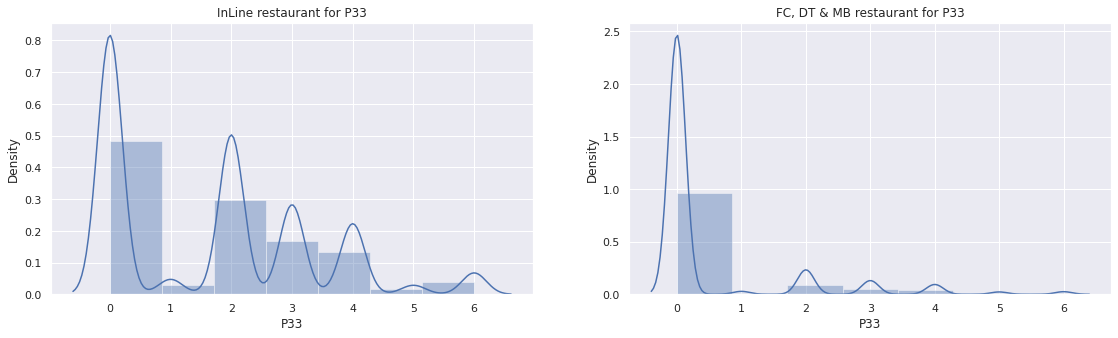

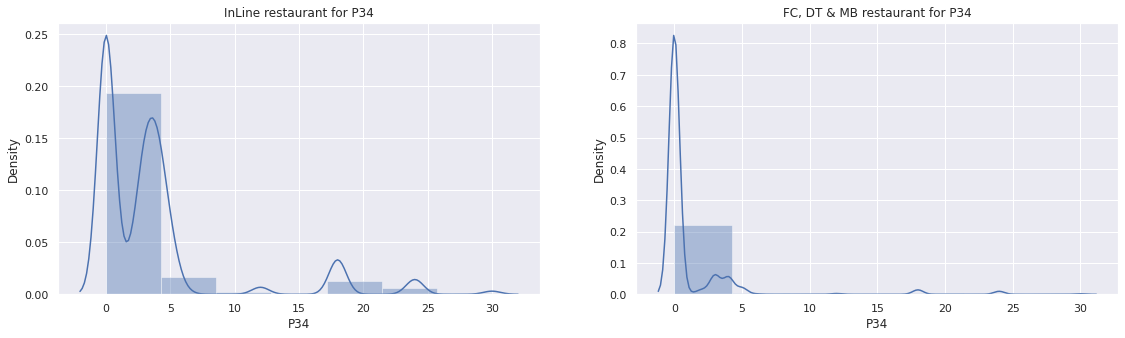

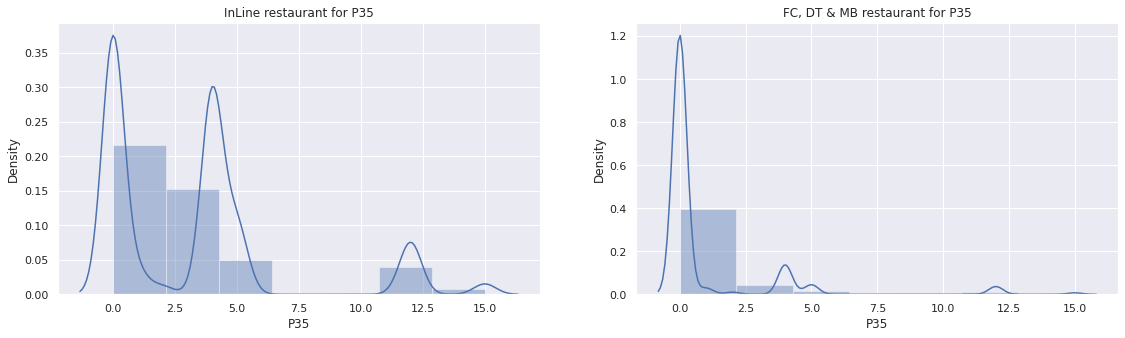

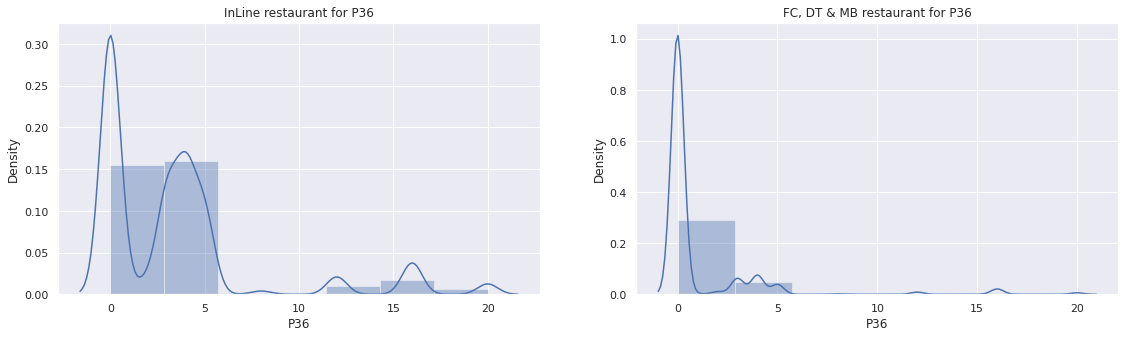

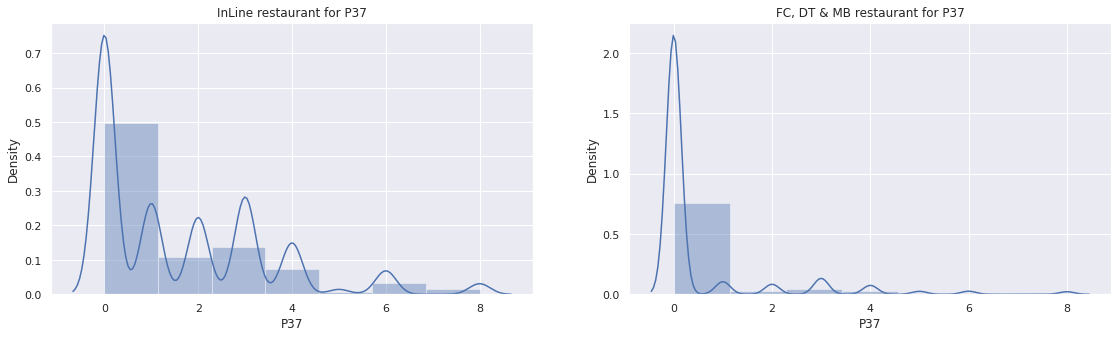

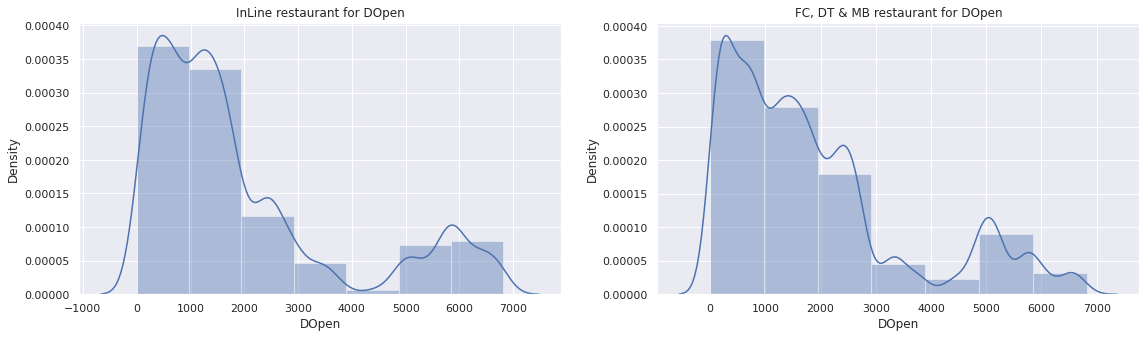

In [49]:
for i in cols_num:
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    g1 = sns.distplot(df_merged[i][df_merged['Type'] == 'IL'], ax=ax[0], bins = 7).set(title='InLine restaurant for ' + i)
    g2 = sns.distplot(df_merged[i][df_merged['Type'] != 'IL'], ax=ax[1], bins = 7).set(title='FC, DT & MB restaurant for ' + i)
    fig.show()

Ps are common between IL and the others for P1-12, P18-22, P28-29 & P37 but different for P13-17, P23-P27 & P30-36. Likewise P1, P5-6, P14-18, P21-28 and P30-37 all look right-hand skewed and might benifit by log normalization.

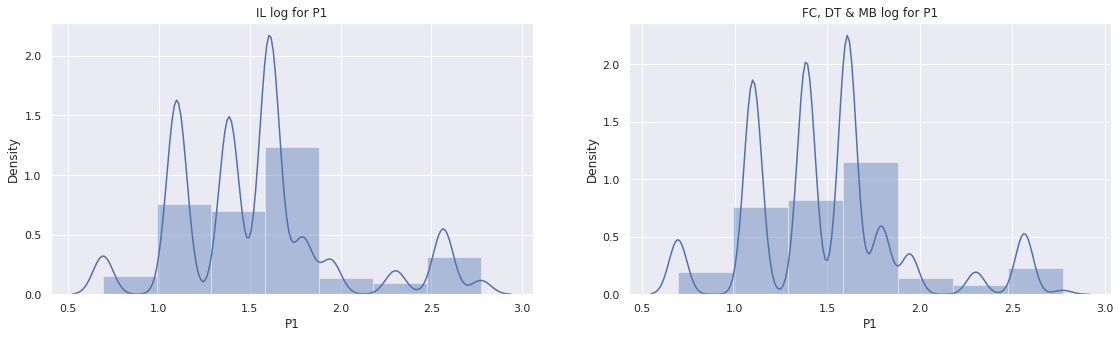

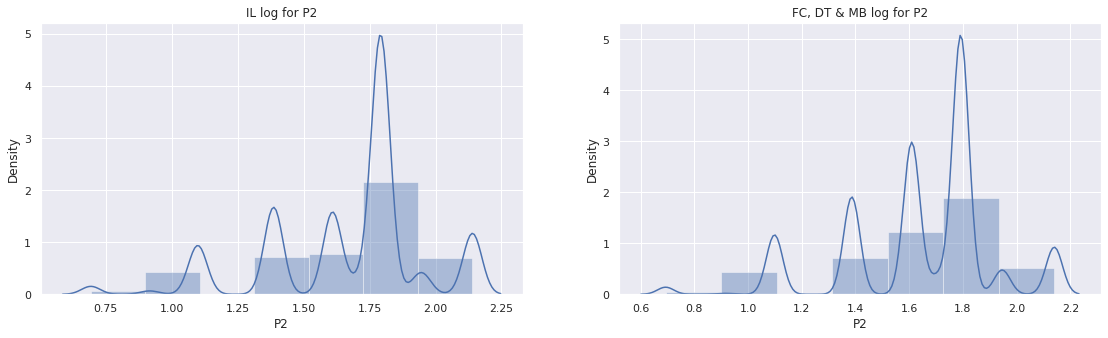

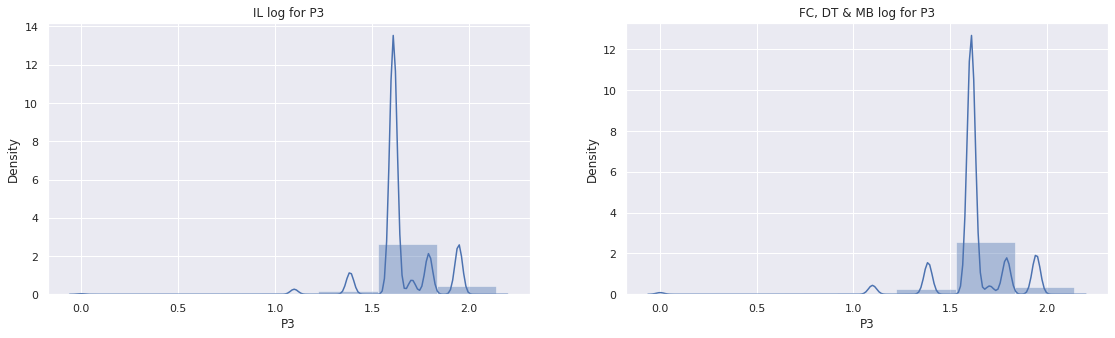

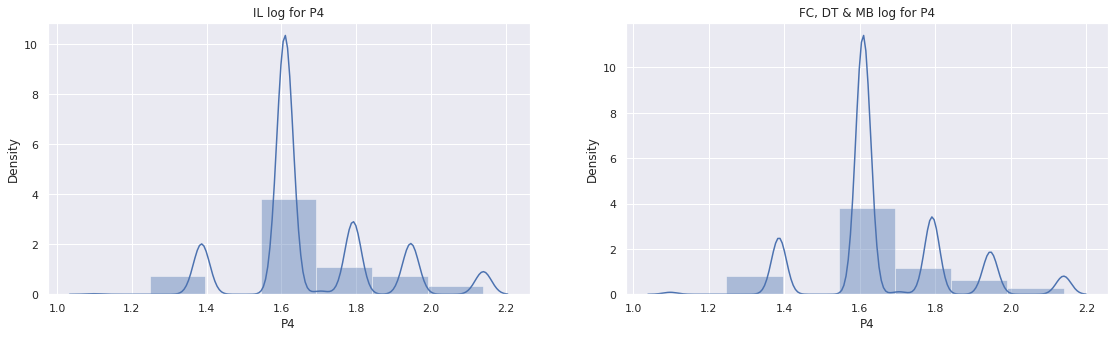

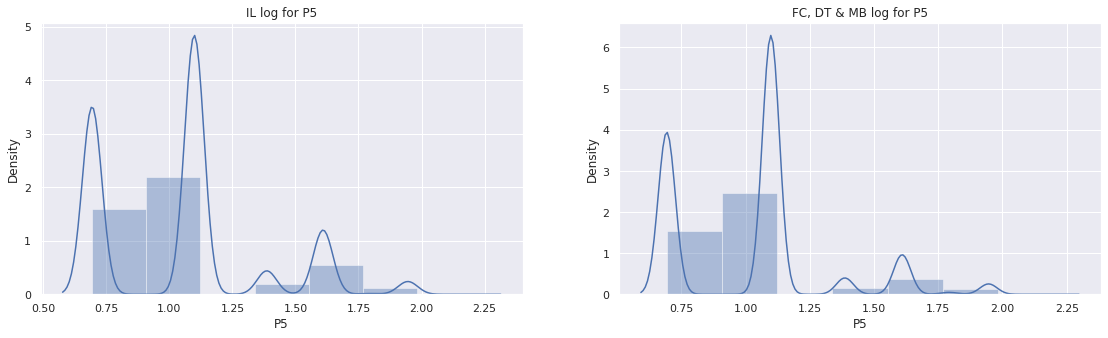

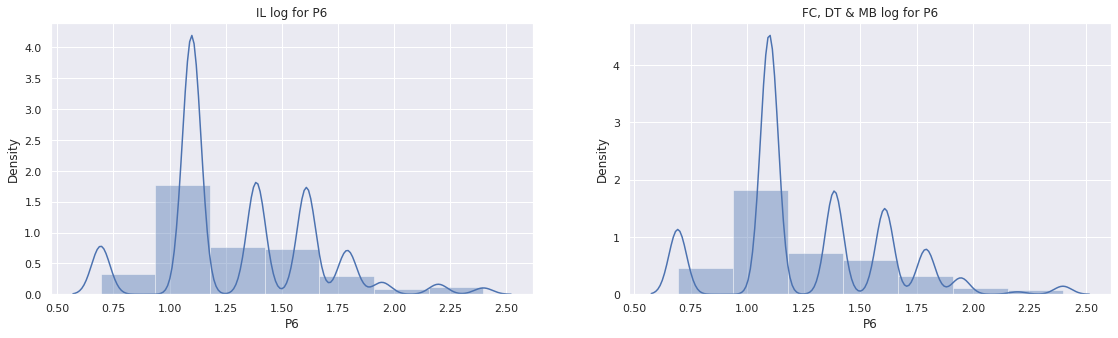

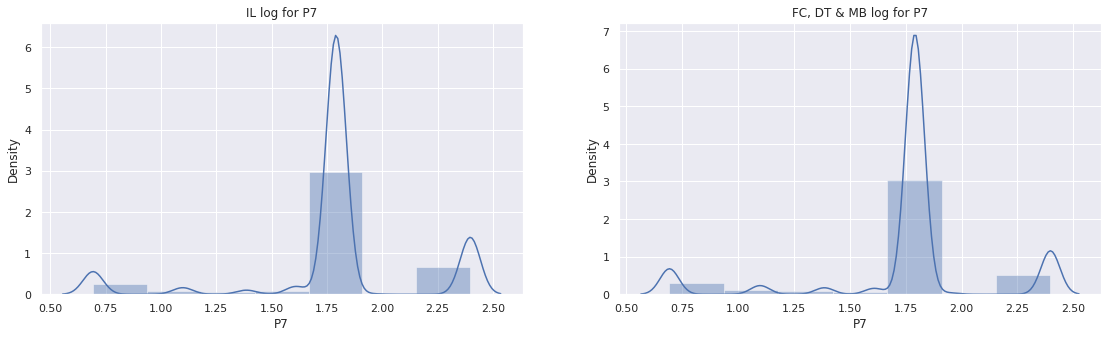

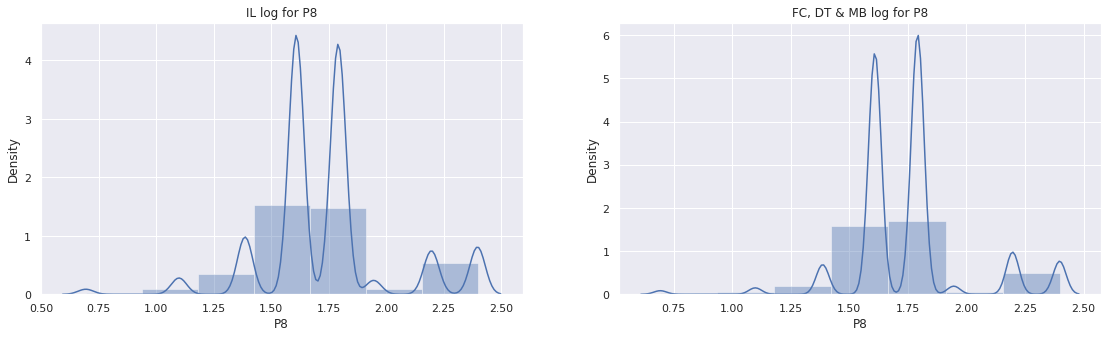

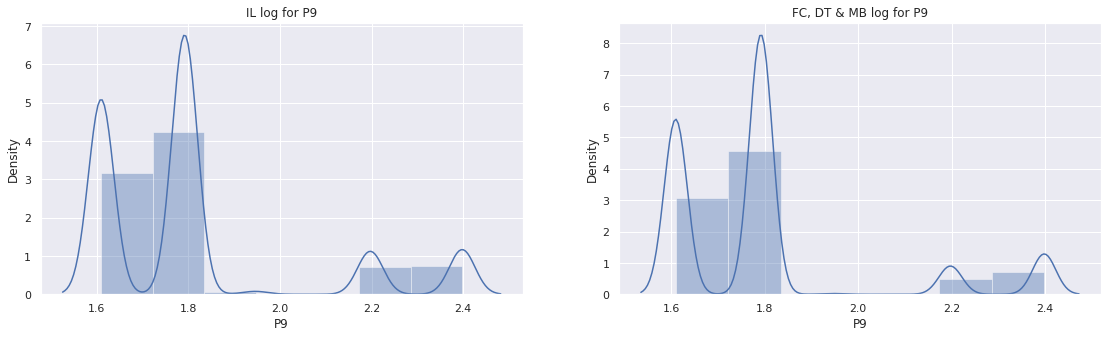

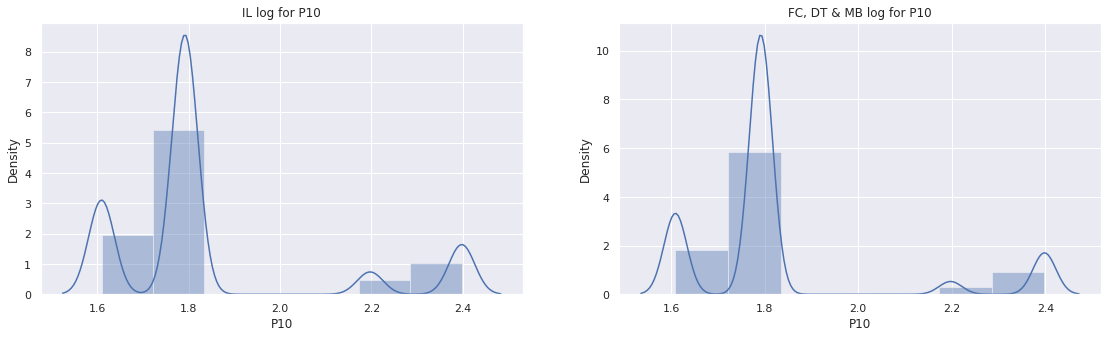

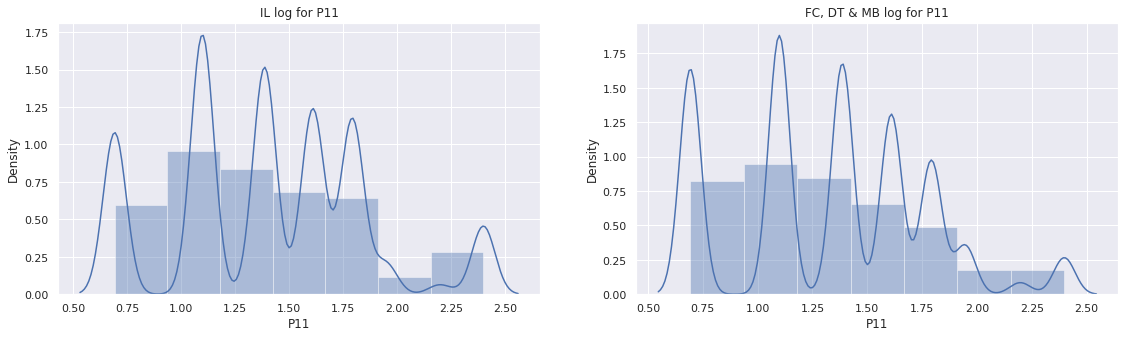

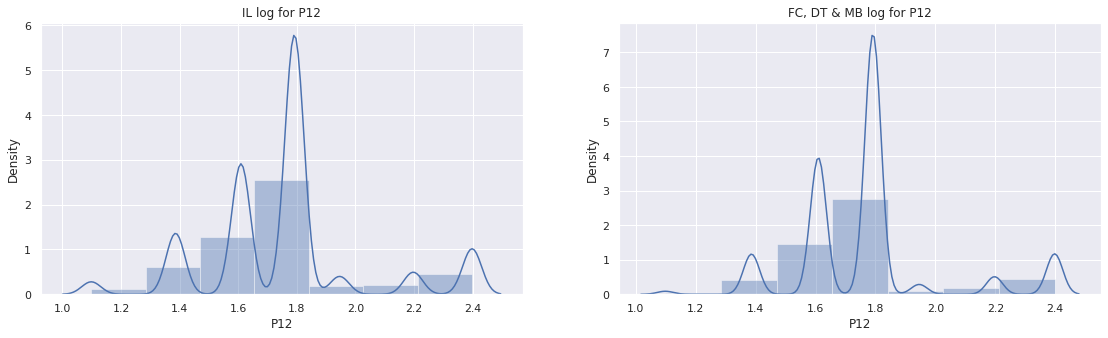

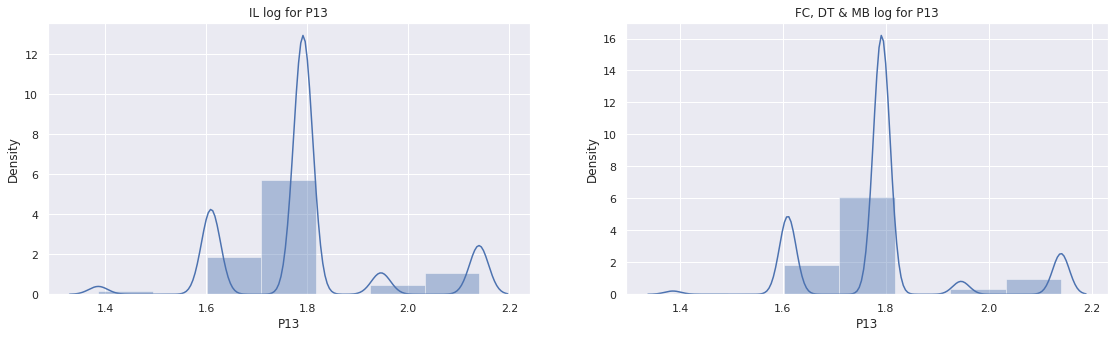

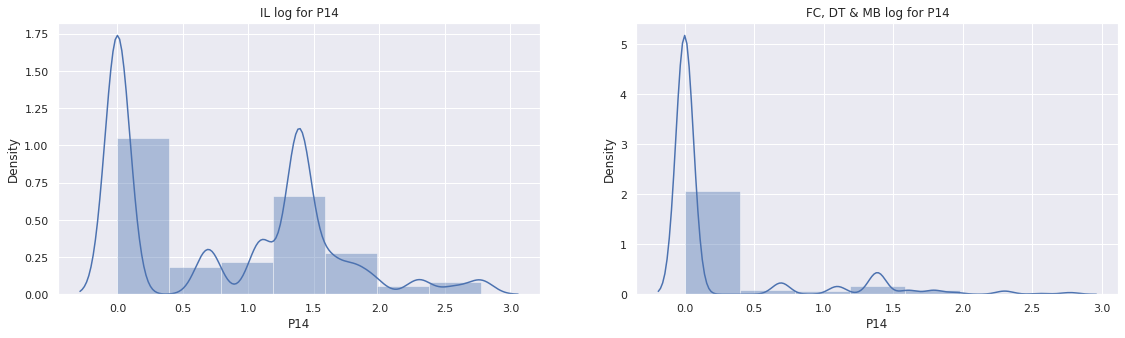

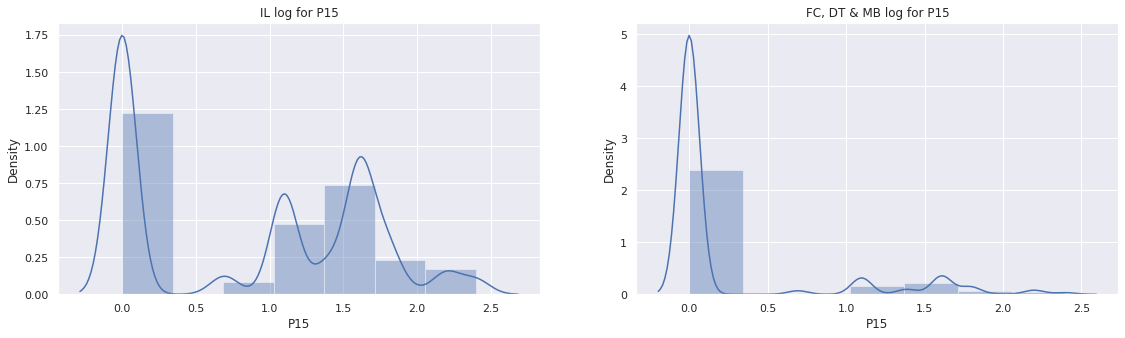

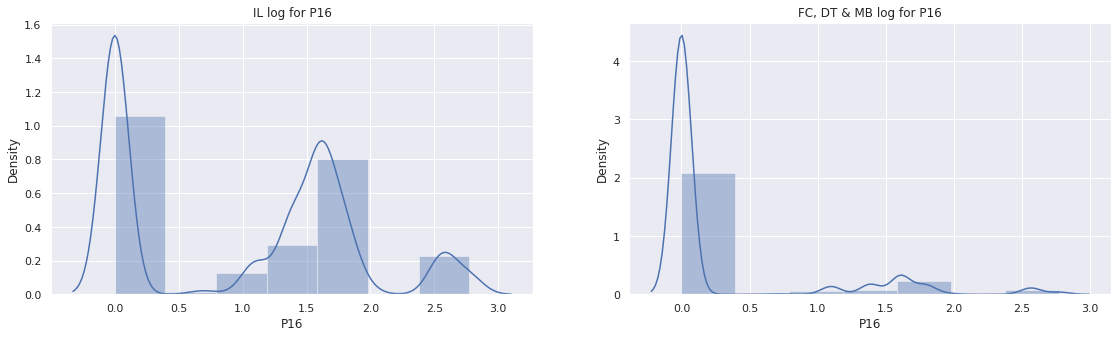

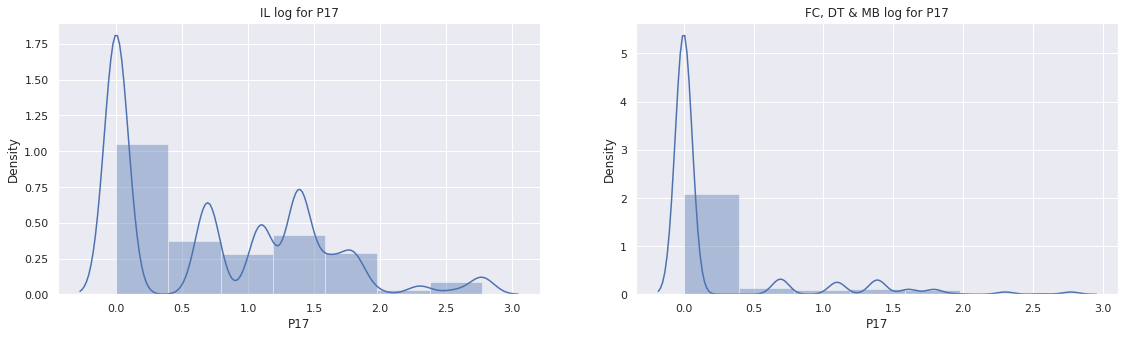

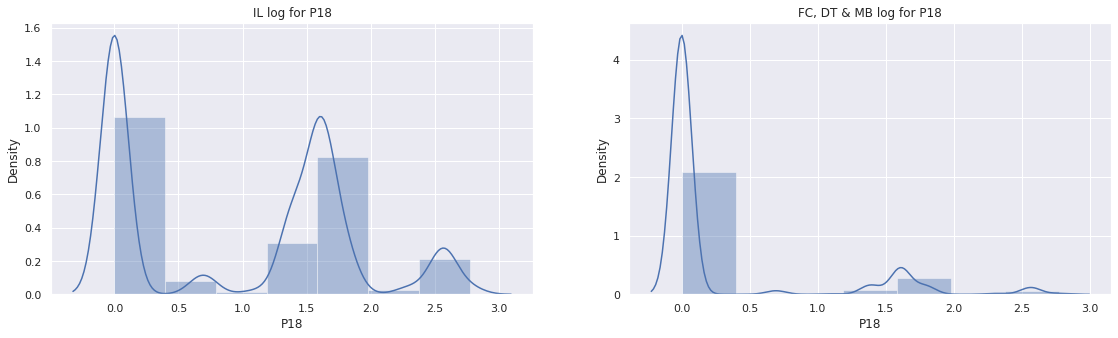

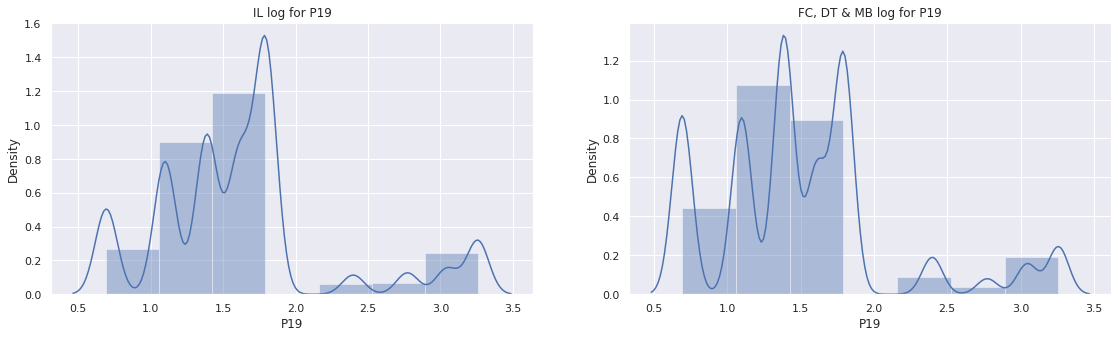

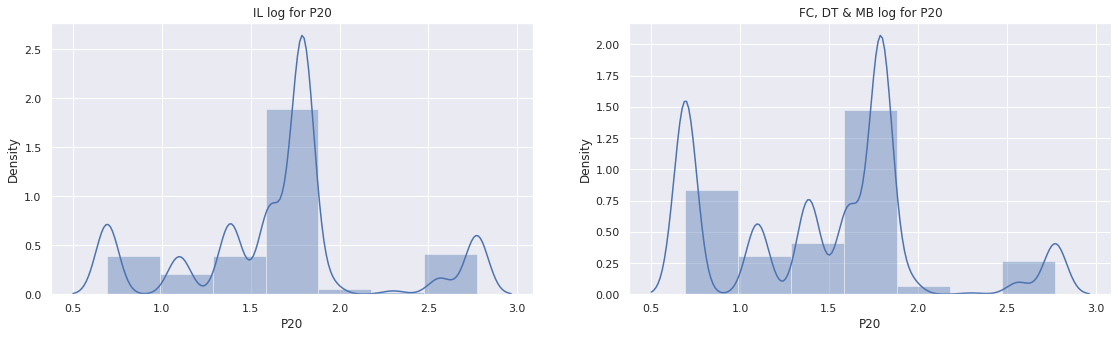

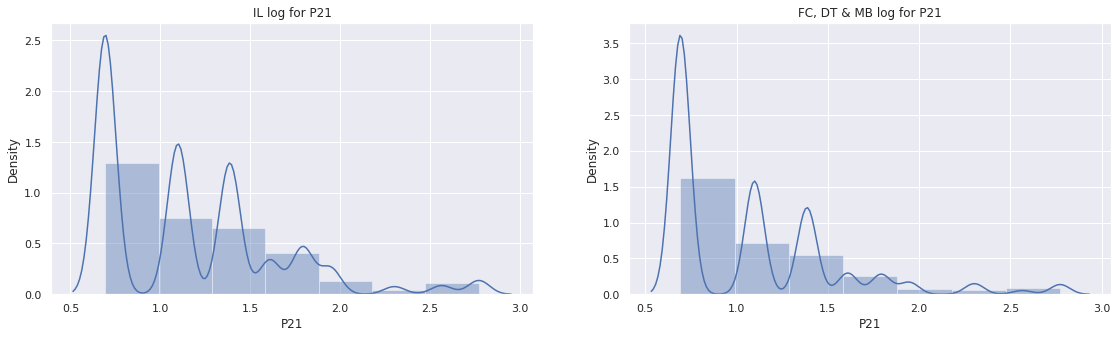

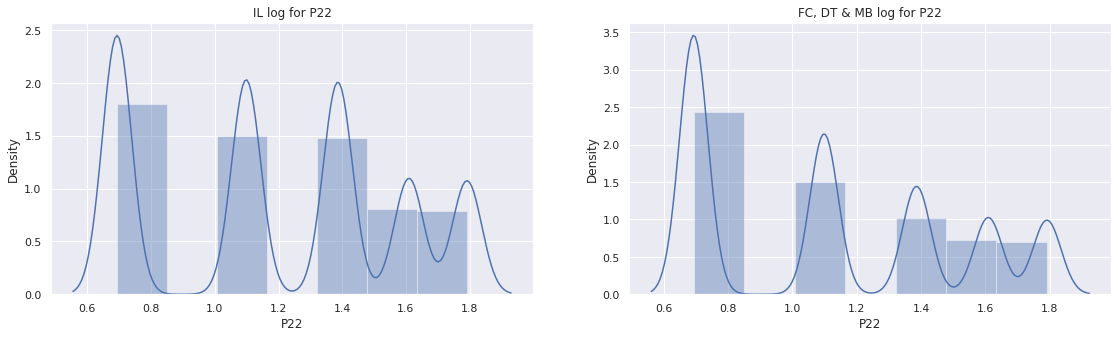

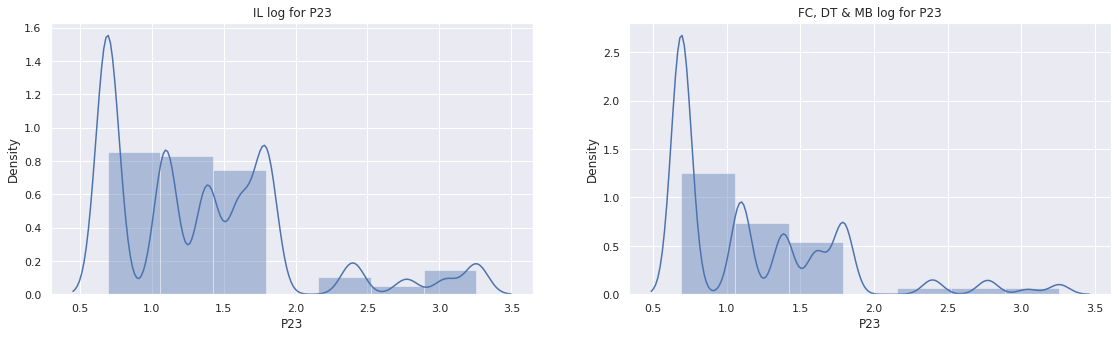

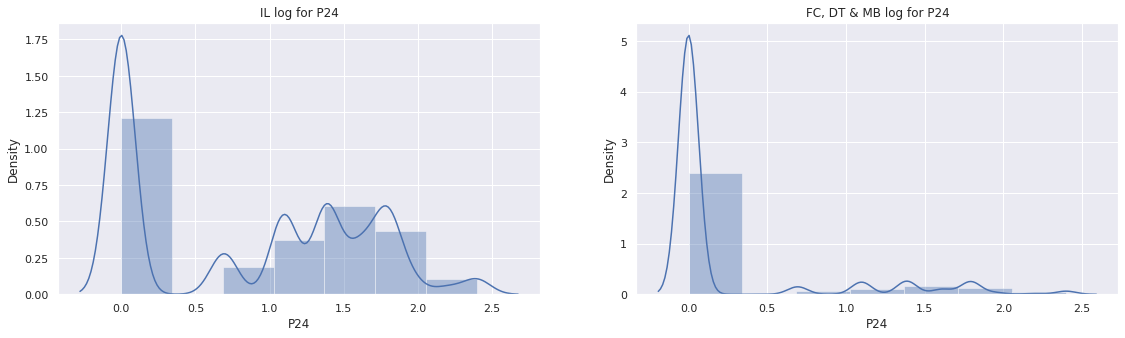

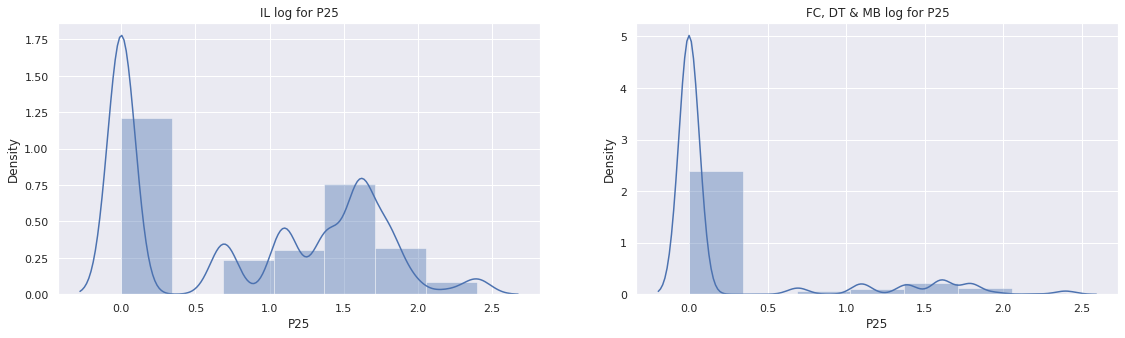

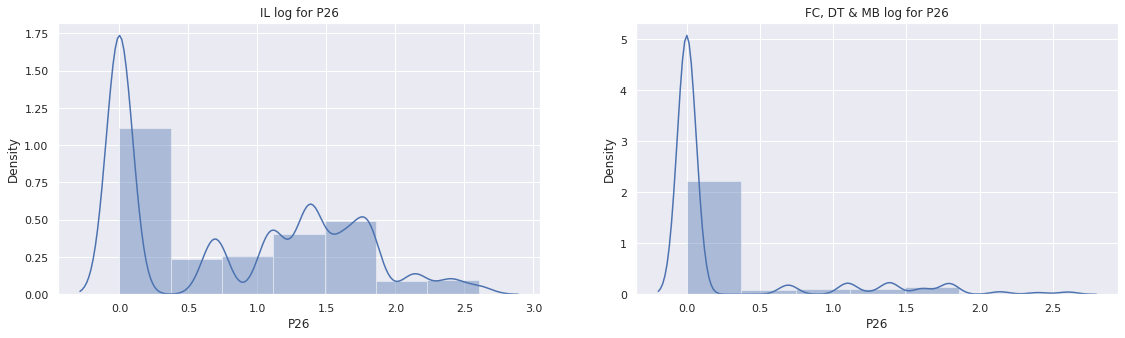

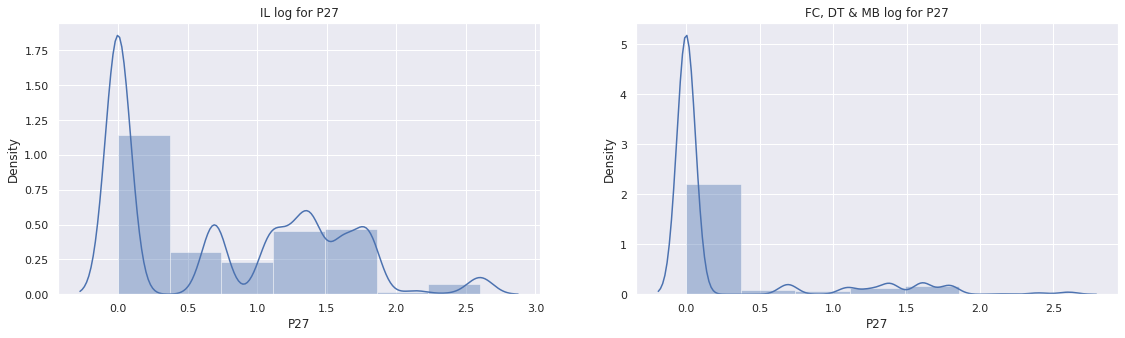

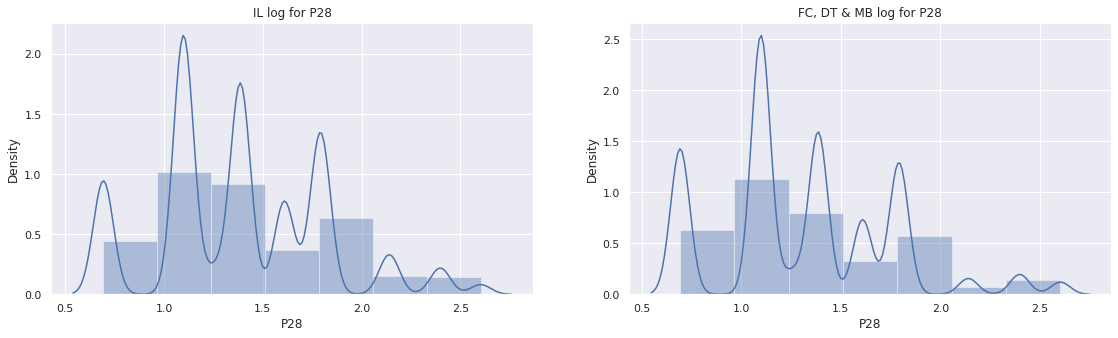

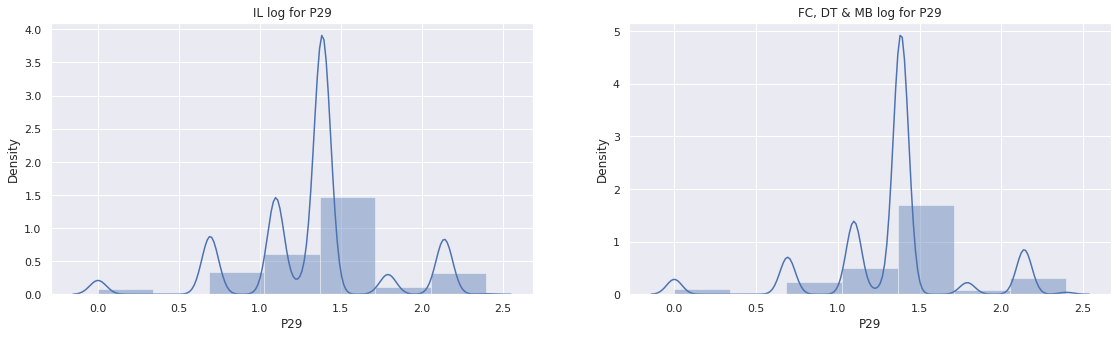

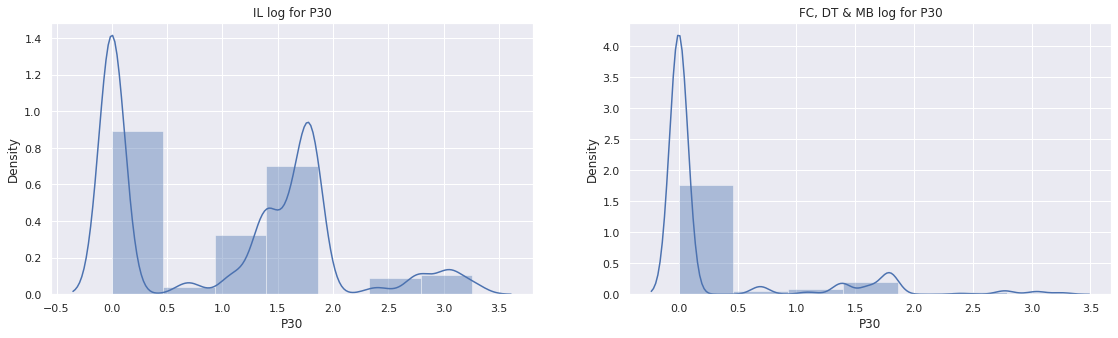

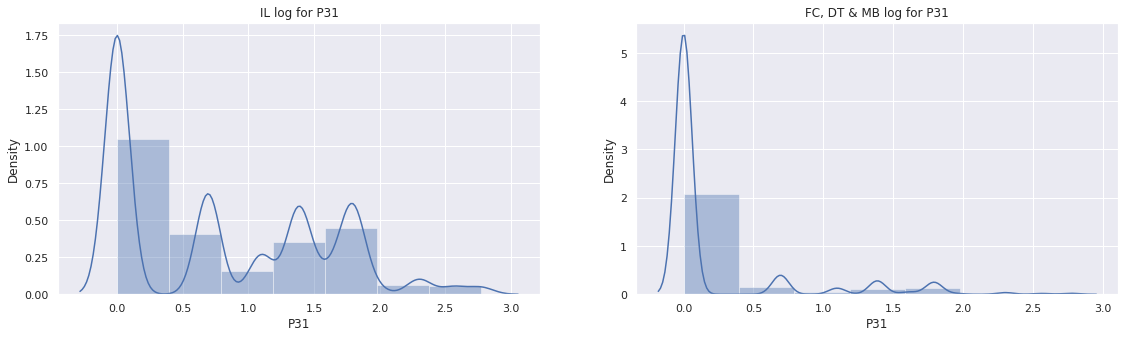

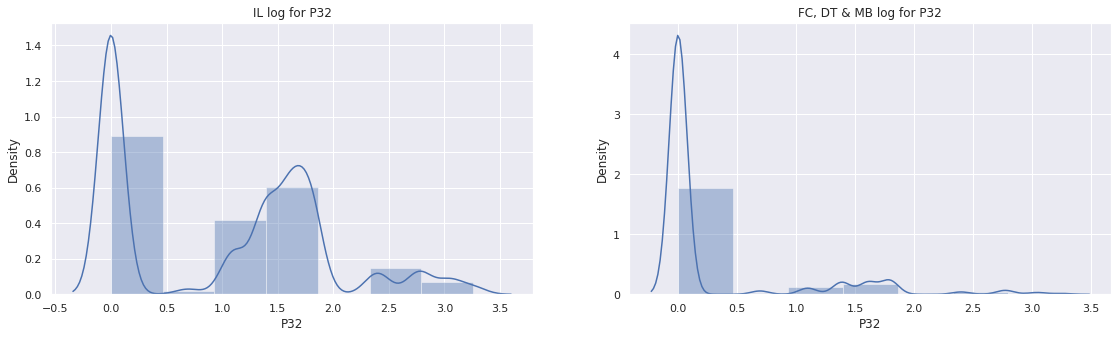

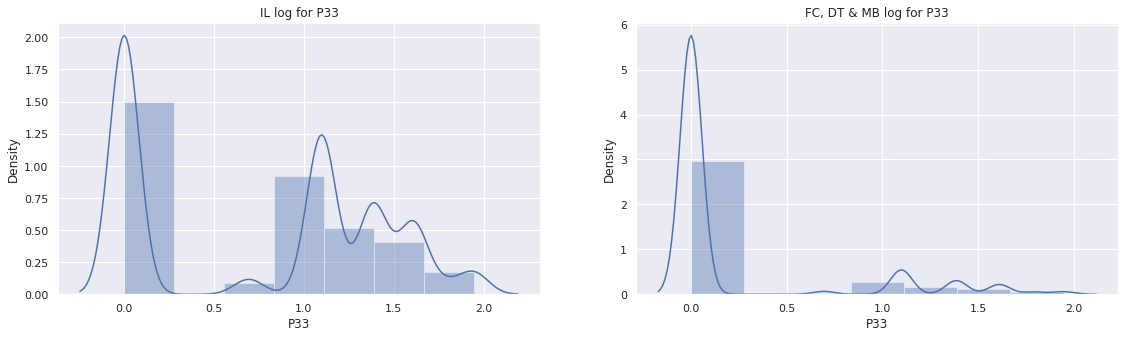

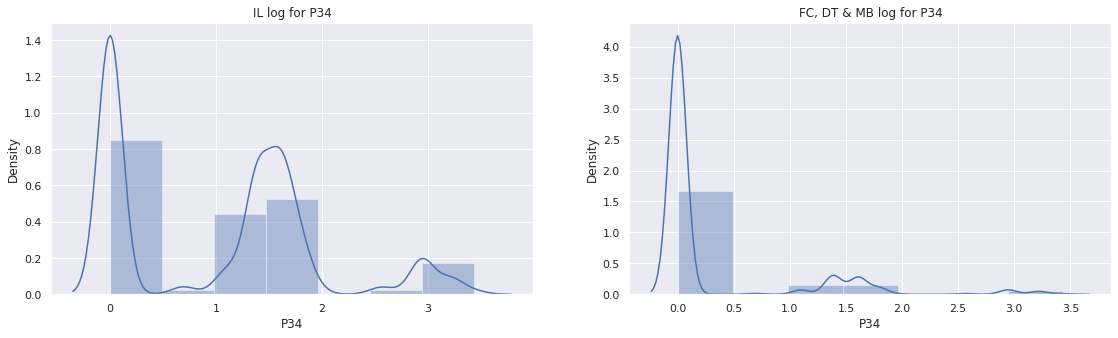

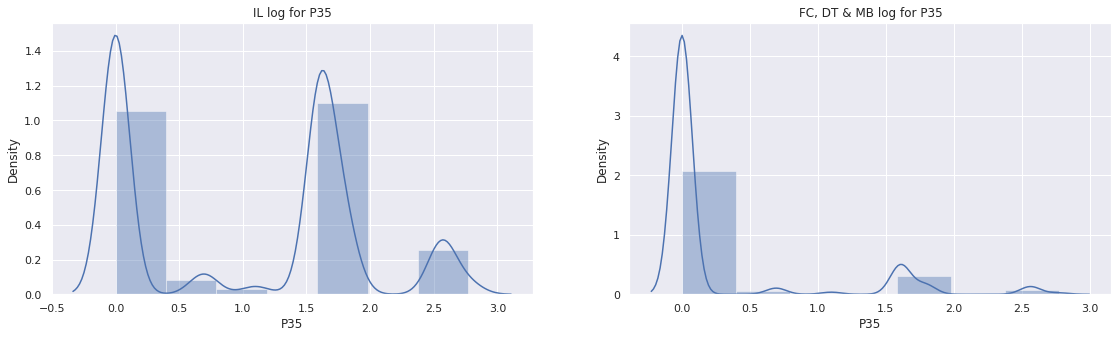

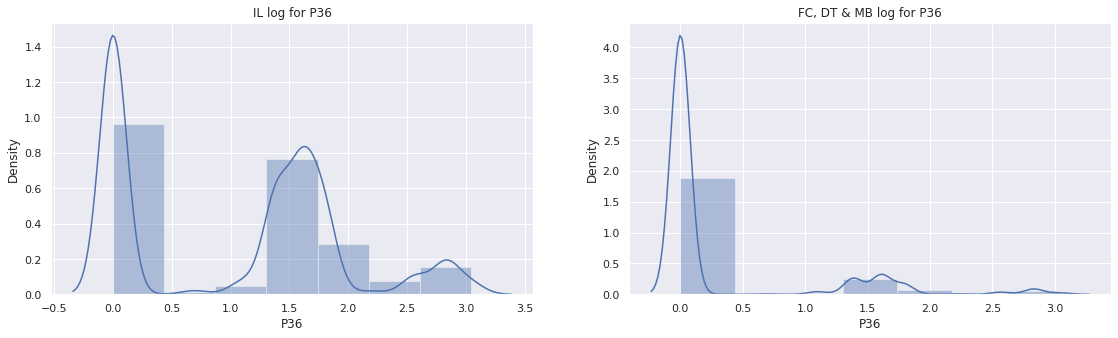

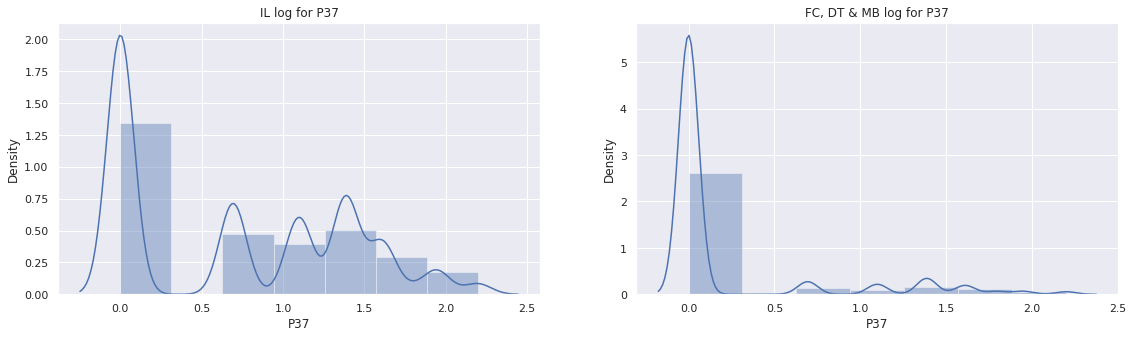

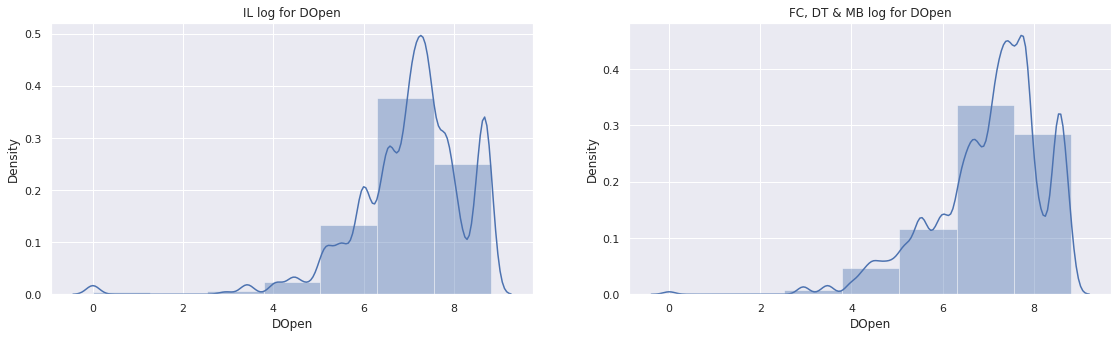

In [50]:
for i in cols_num:
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    g1 = sns.distplot(np.log(df_merged[i][df_merged['Type'] == 'IL'] + 1), ax=ax[0], bins = 7).set(title='IL log for ' + i)
    g2 = sns.distplot(np.log(df_merged[i][df_merged['Type'] != 'IL'] + 1), ax=ax[1], bins = 7).set(title='FC, DT & MB log for ' + i)
    fig.show();

The zero still look like nan values instead of real values.

In [51]:
def hist_box(data, feature, figsize=(12, 7), drop = -99999):

    # Subplot canvas
    fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios": (0.25, 0.75)}, figsize = figsize)

    # Boxplot on top
    sns.boxplot(data = data[data[feature] != drop], x = feature, ax = ax_box, showmeans = True, color = "pink")  # boxplot will be created and a star will indicate the mean value of the column
    
    # Histogram on bottom
    sns.histplot(data = data[data[feature] != drop], x = feature, ax = ax_hist, kde = True) # histogram will be created and

    # Add mean and median to histogram
    ax_hist.axvline(data[feature][data[feature] != drop].mean(), color = "green") # mean
    ax_hist.axvline(data[feature][data[feature] != drop].median(), color = "orange") # median

    # Title
    fig.suptitle("Distribution of " + feature, fontsize=16)

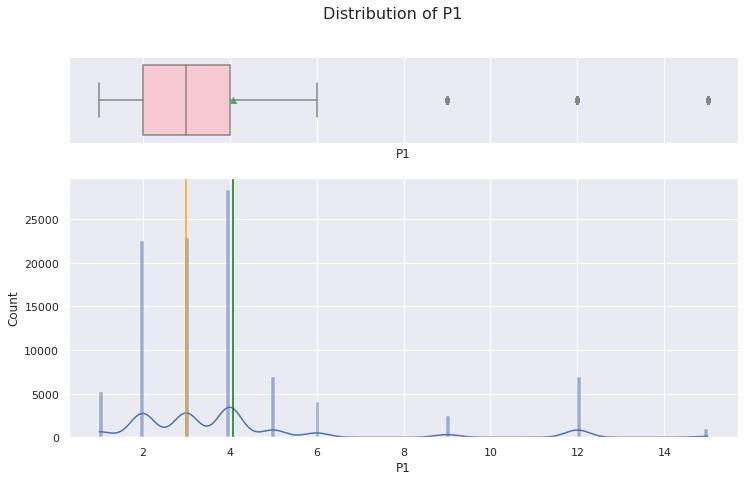

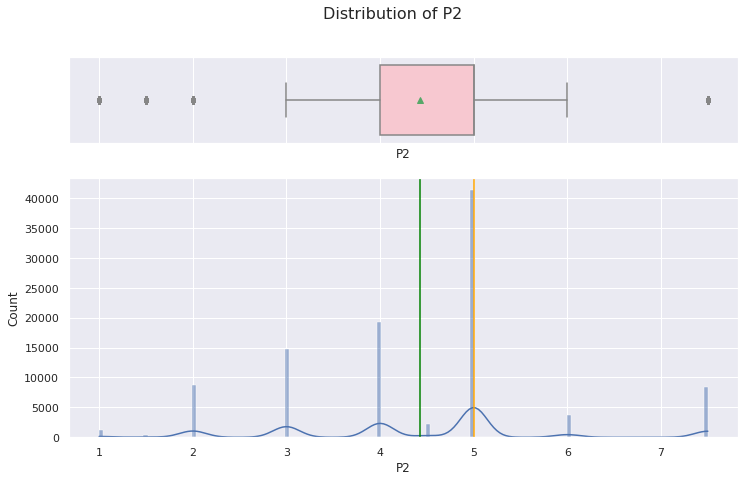

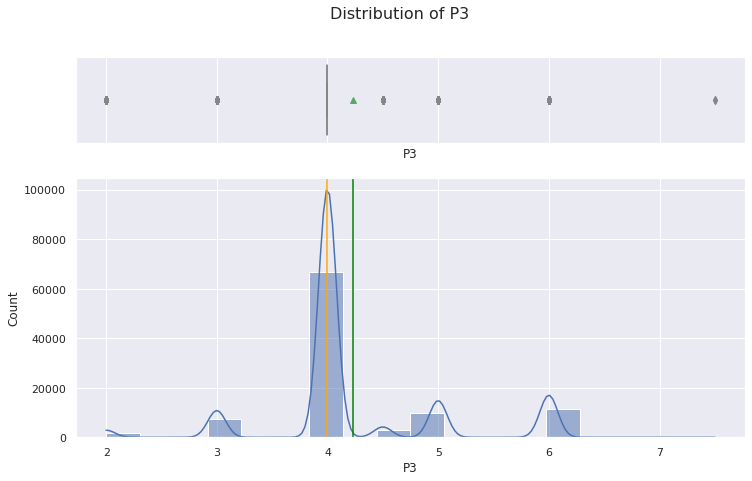

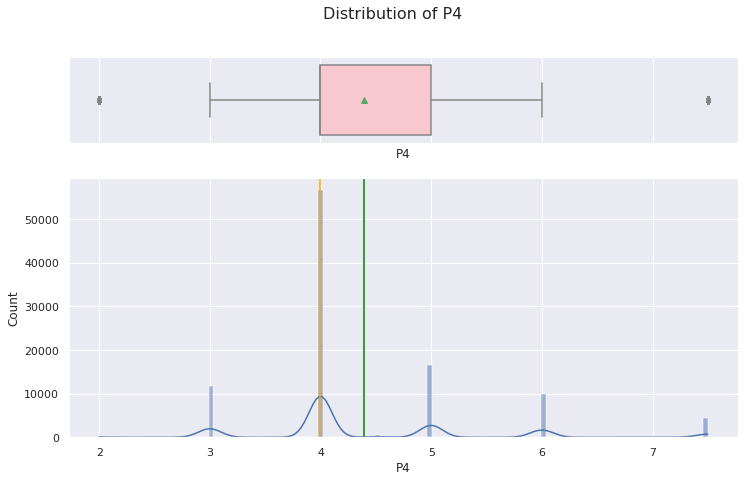

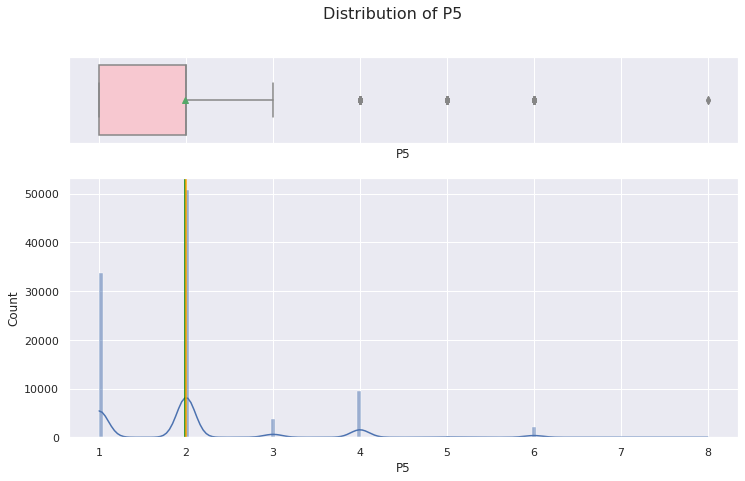

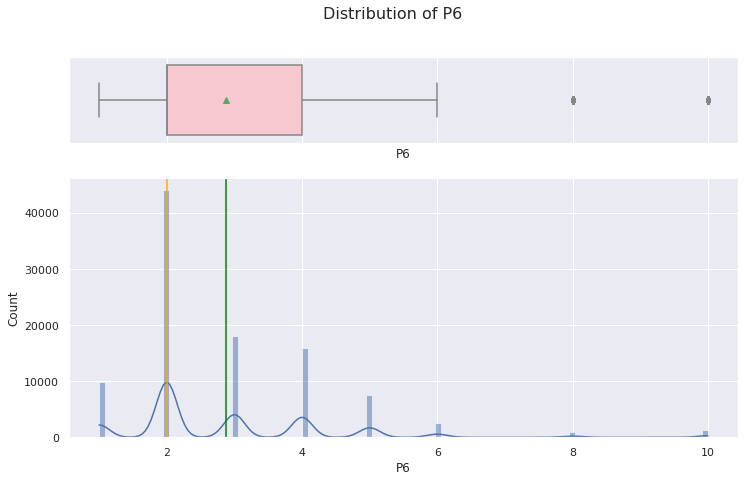

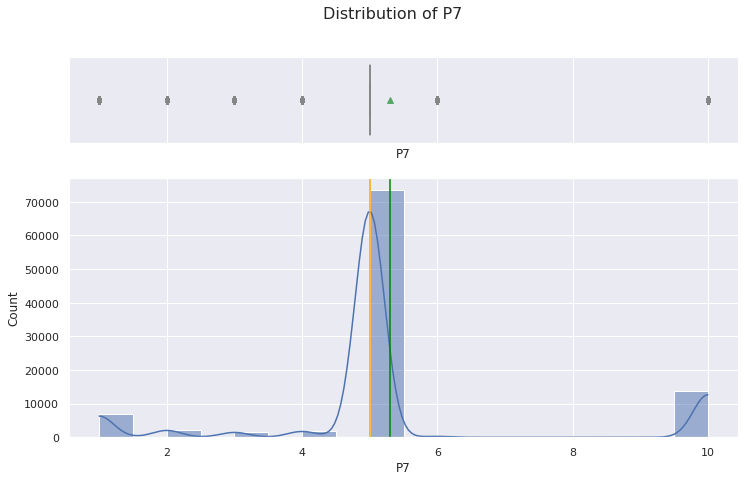

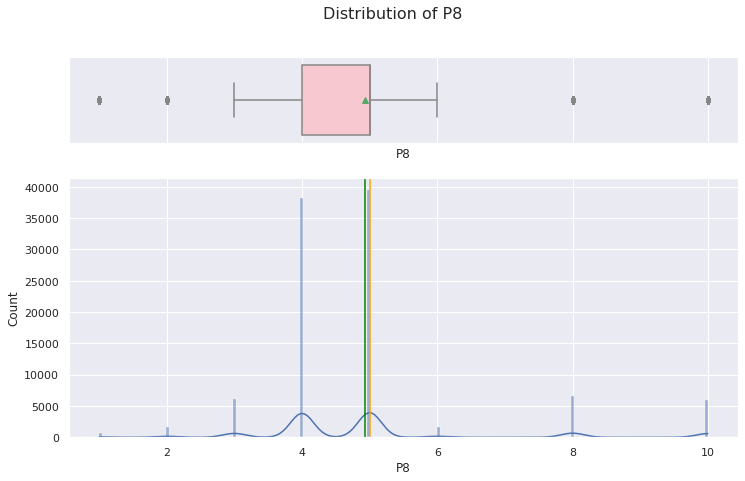

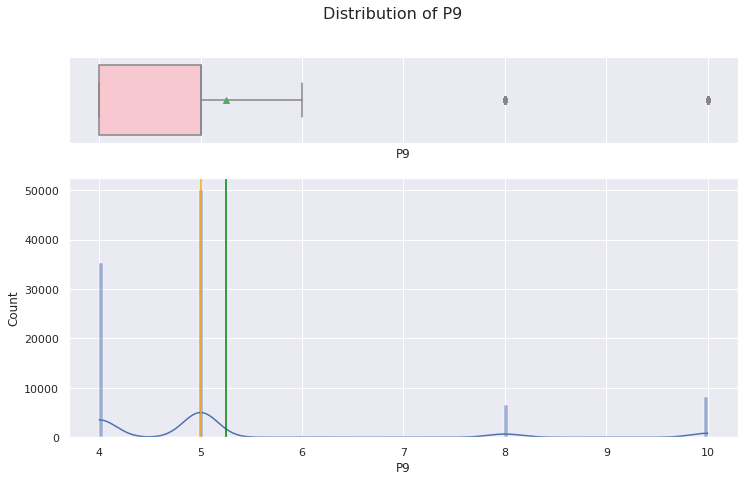

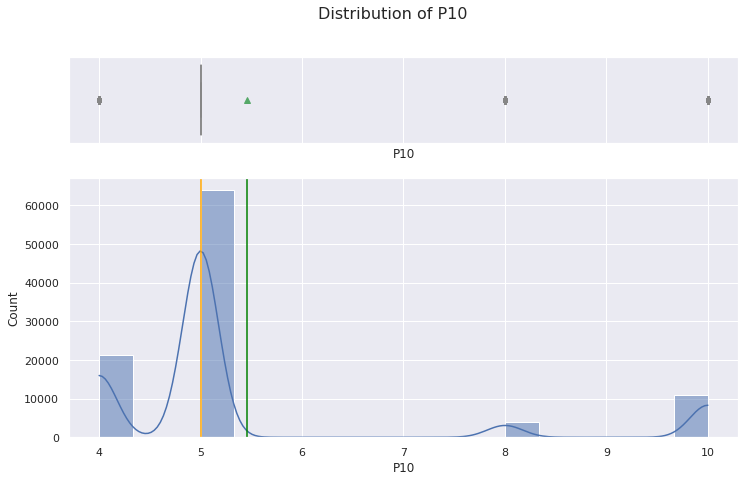

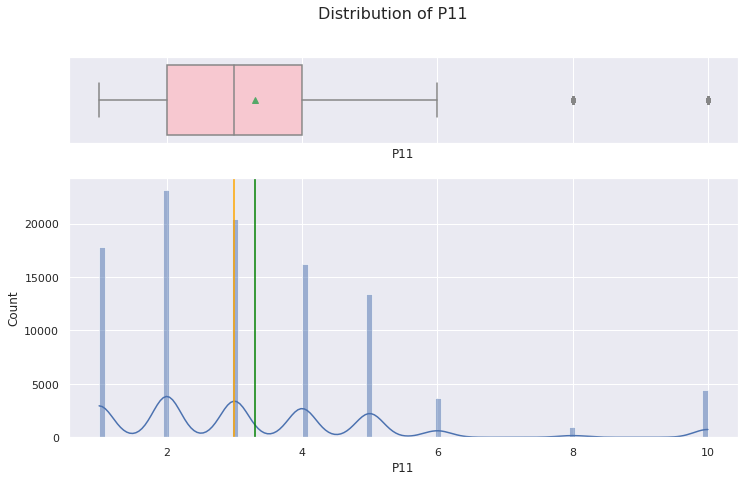

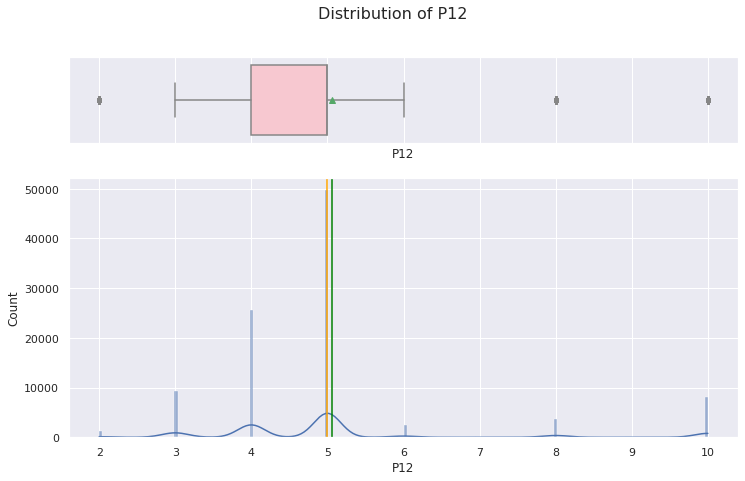

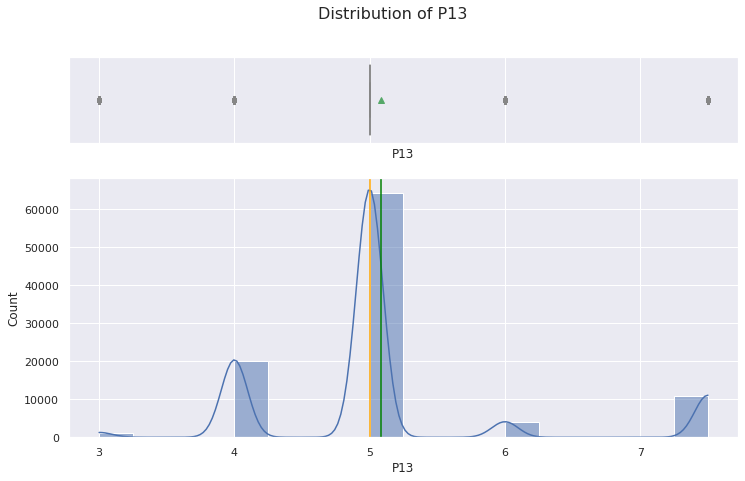

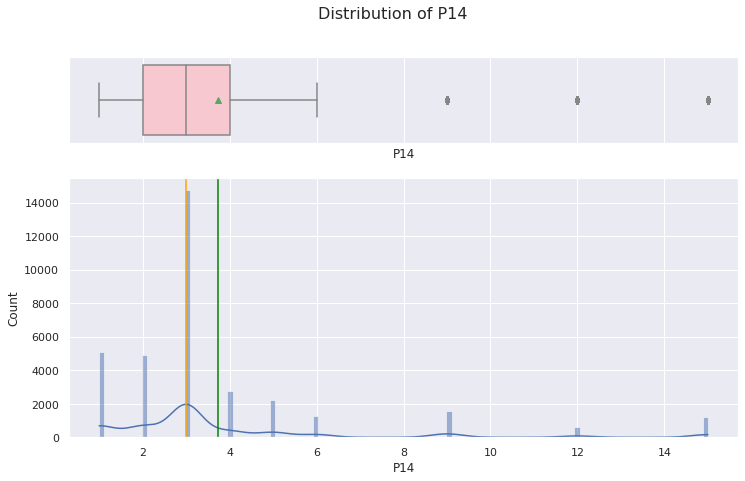

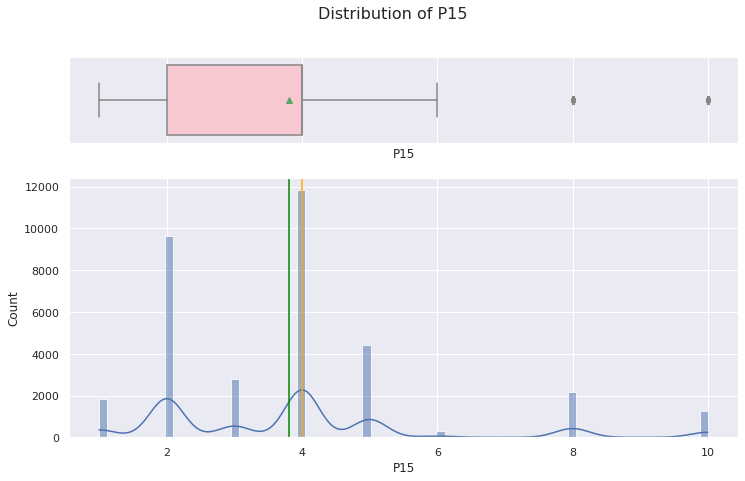

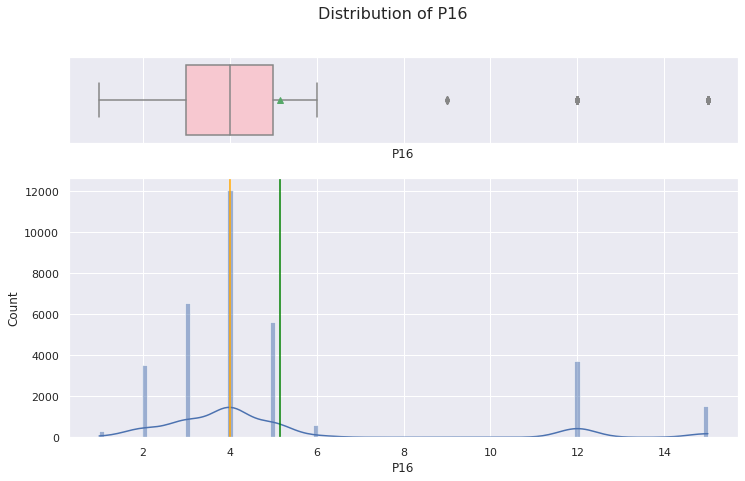

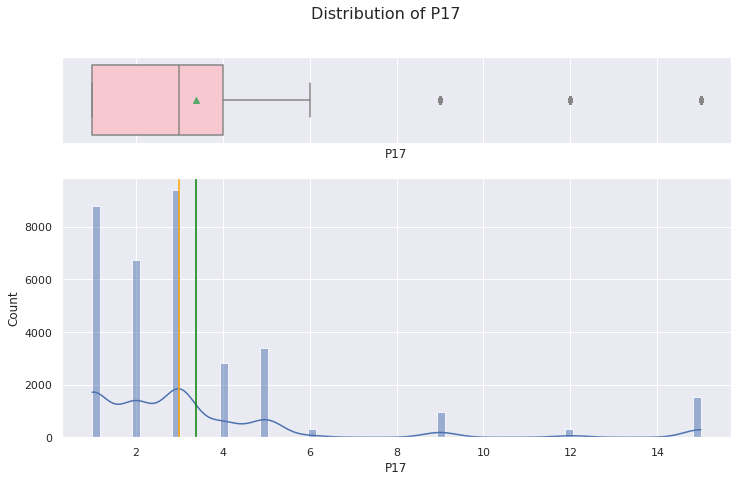

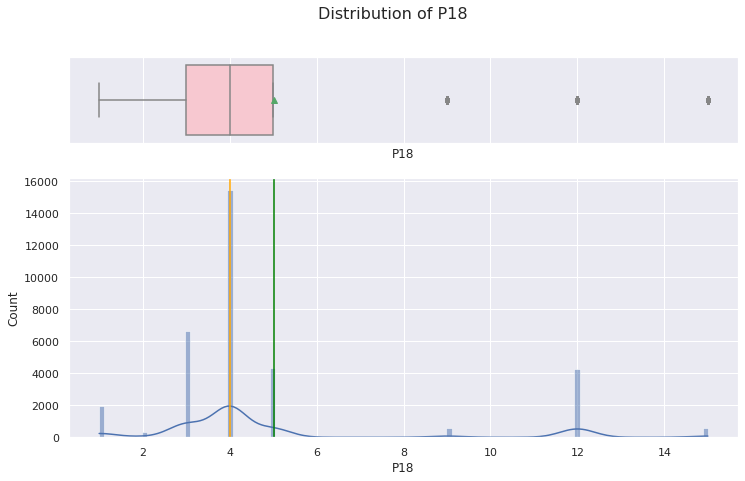

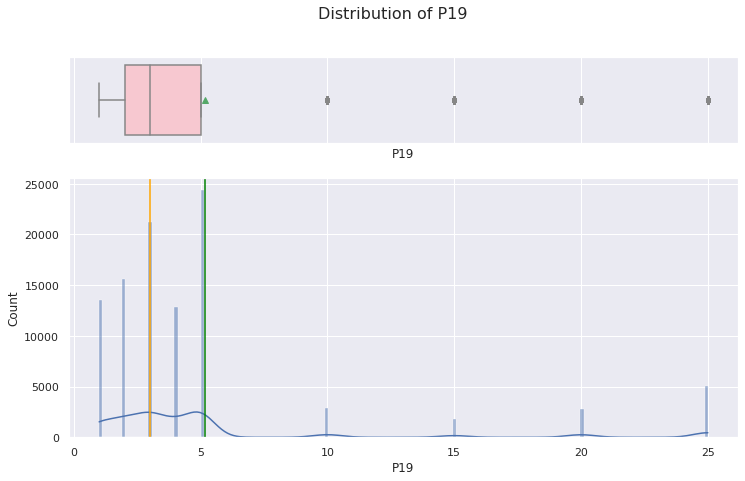

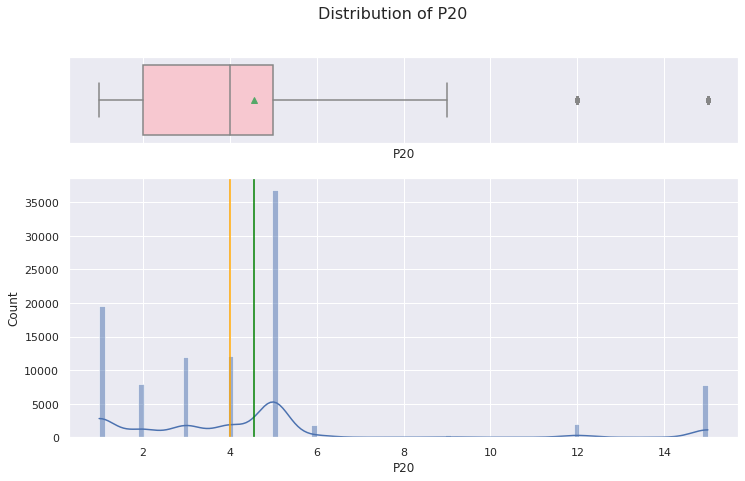

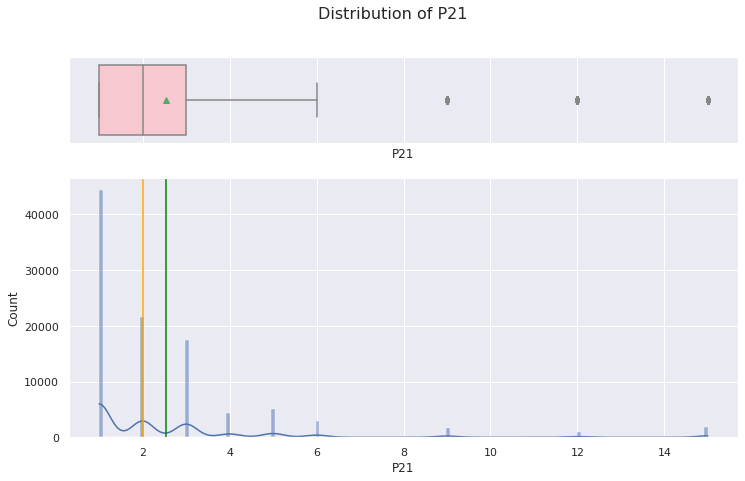

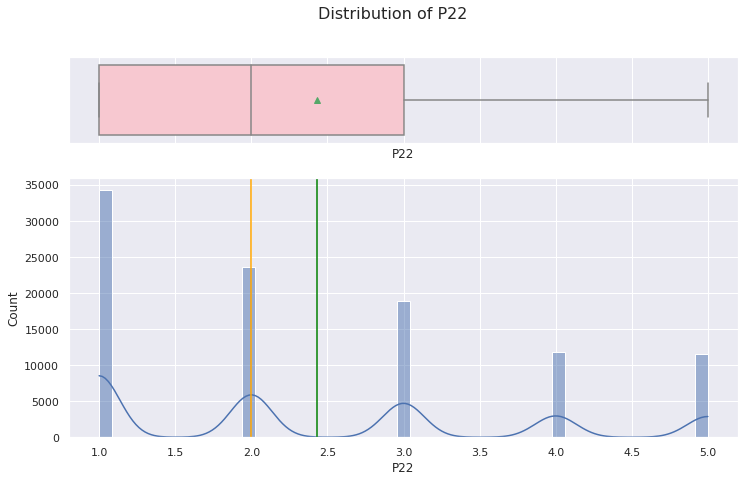

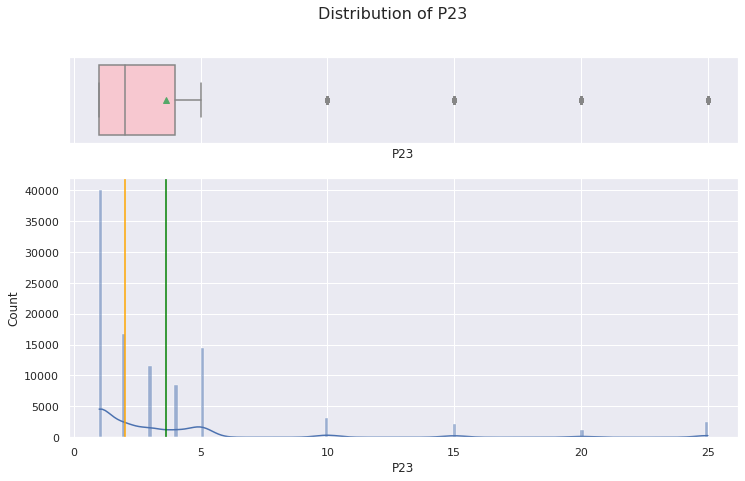

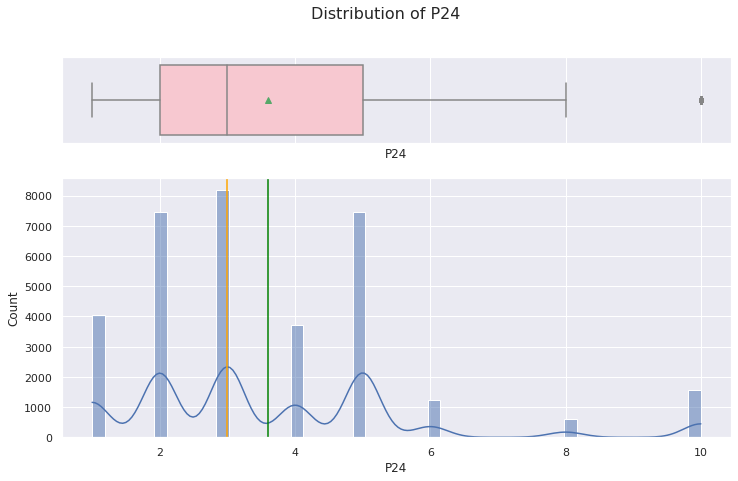

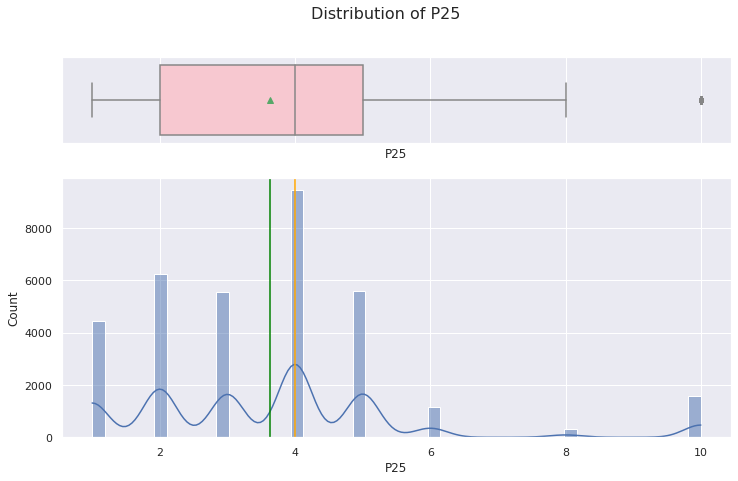

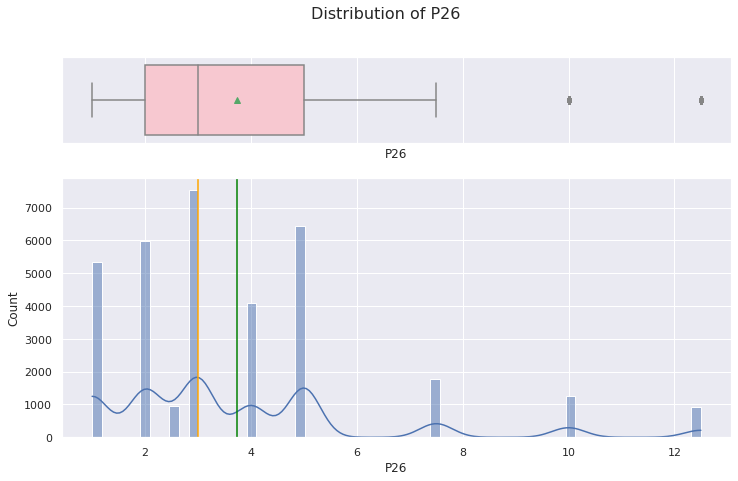

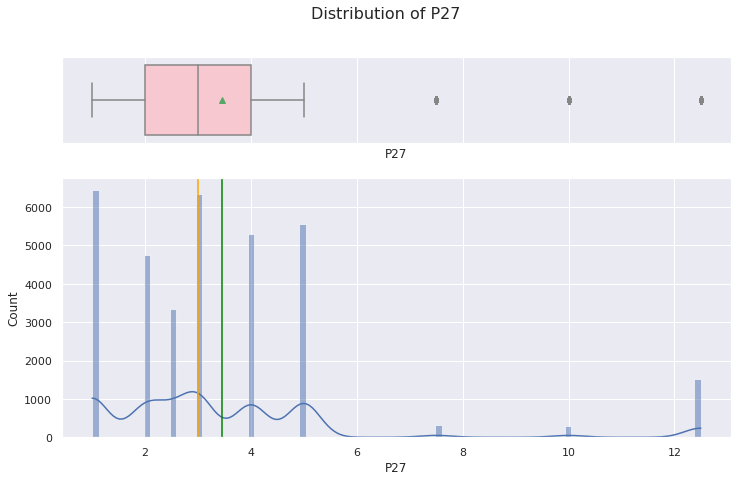

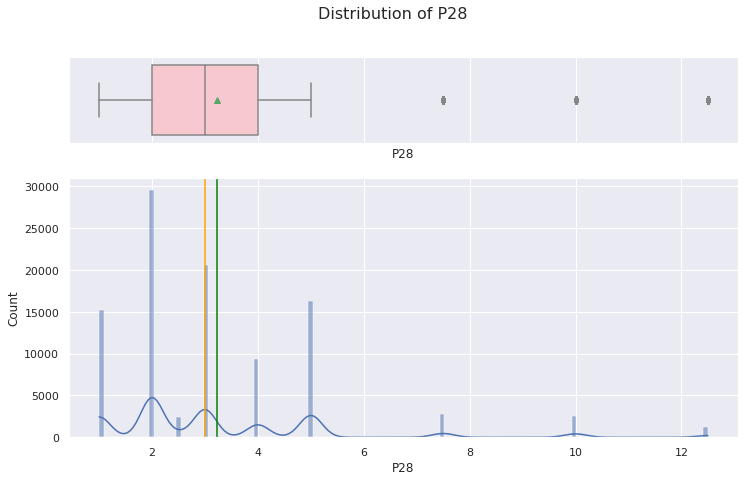

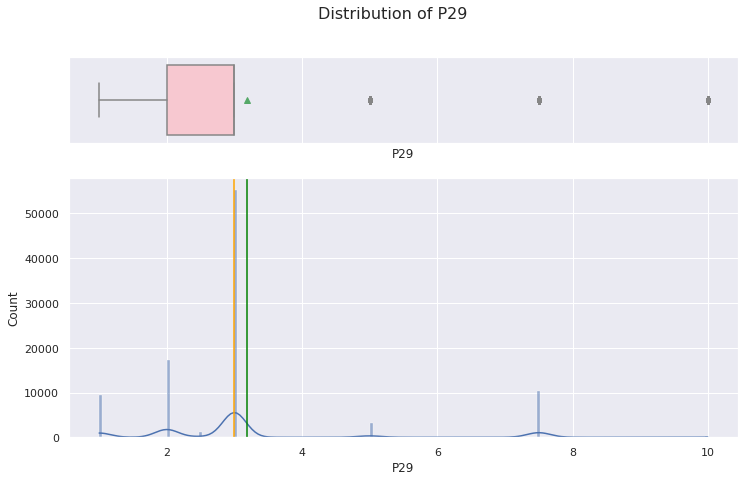

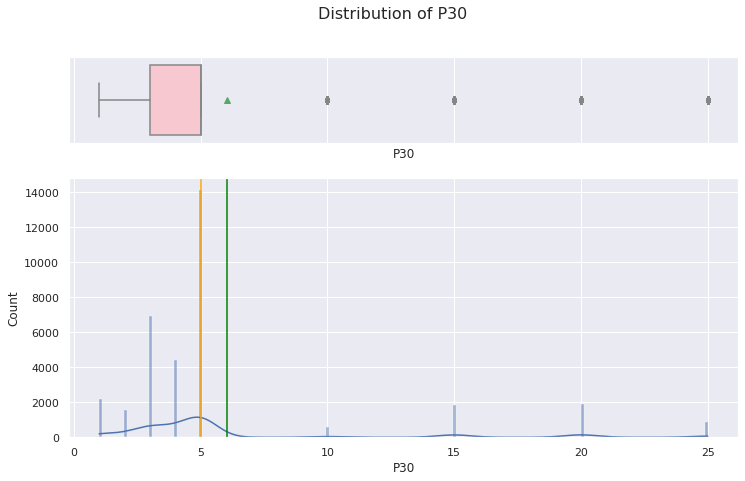

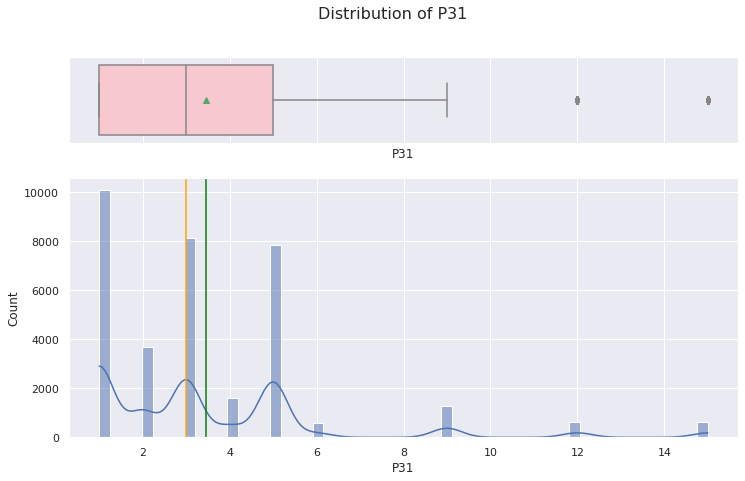

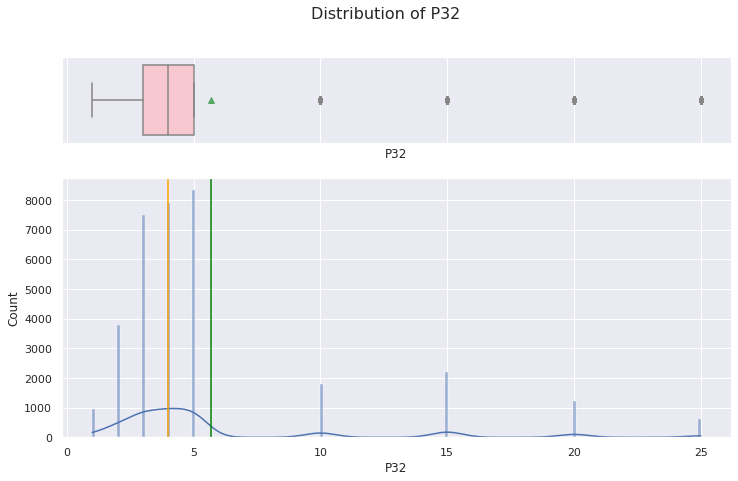

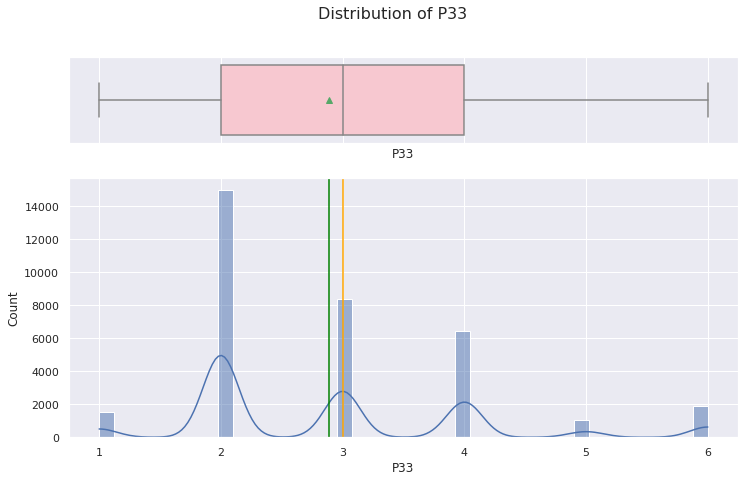

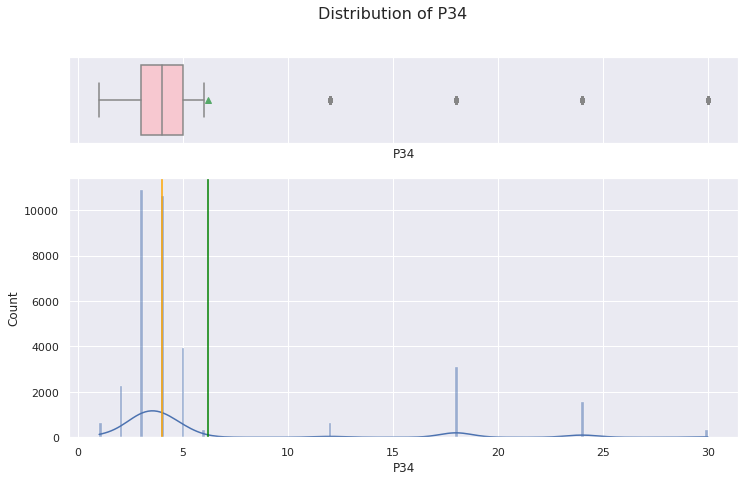

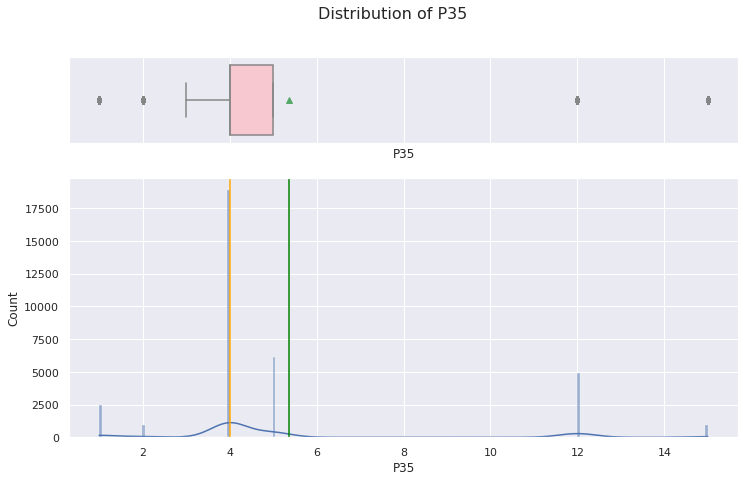

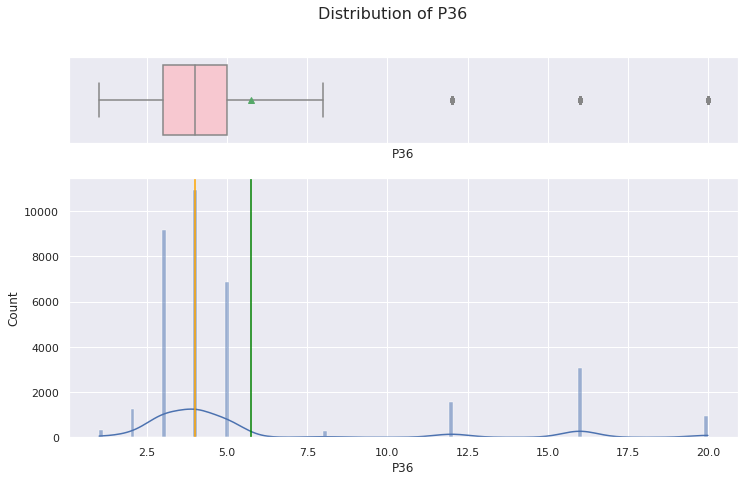

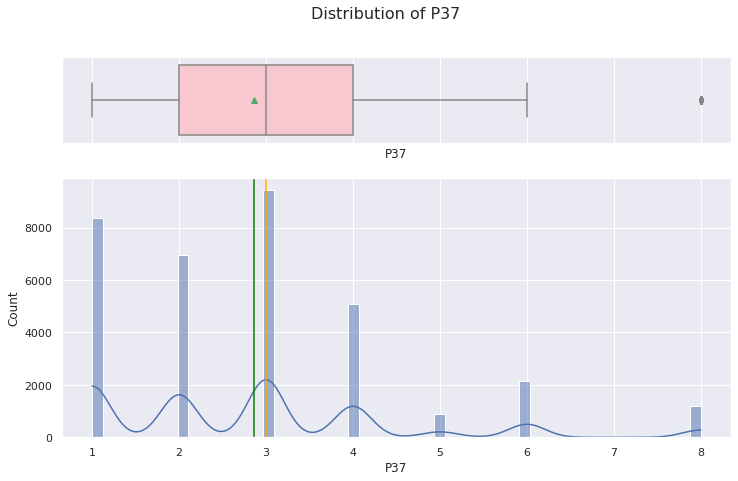

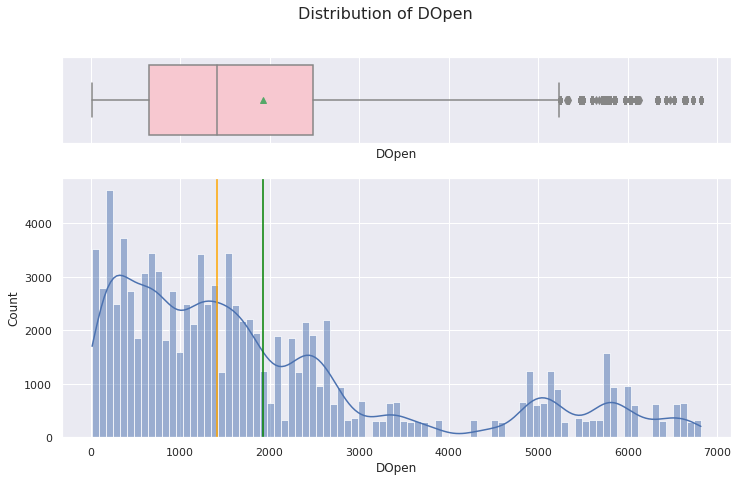

In [52]:
from IPython.core.pylabtools import figsize
for i in cols_num:
  hist_box(df_merged,i, drop = 0)

Conclussion is zero needs to be dropped and log normalization is unlikely to significantly aid the regression analysis.

# Z-scaling

The zero Ps (P14-P18, P24-P27 and P30-37) but only appear to be important for the IL restaurants.  Seperated the dataset into IL and Other types. Scale by replacing 0 with mean in the IL set, then z-score scale. For the other dataset set all zero Ps to 0 so they will have not impact on the future analysis. 

In [53]:
for i in PsZeros:
  df_merged[i][df_merged[i] == 0] = np.nan

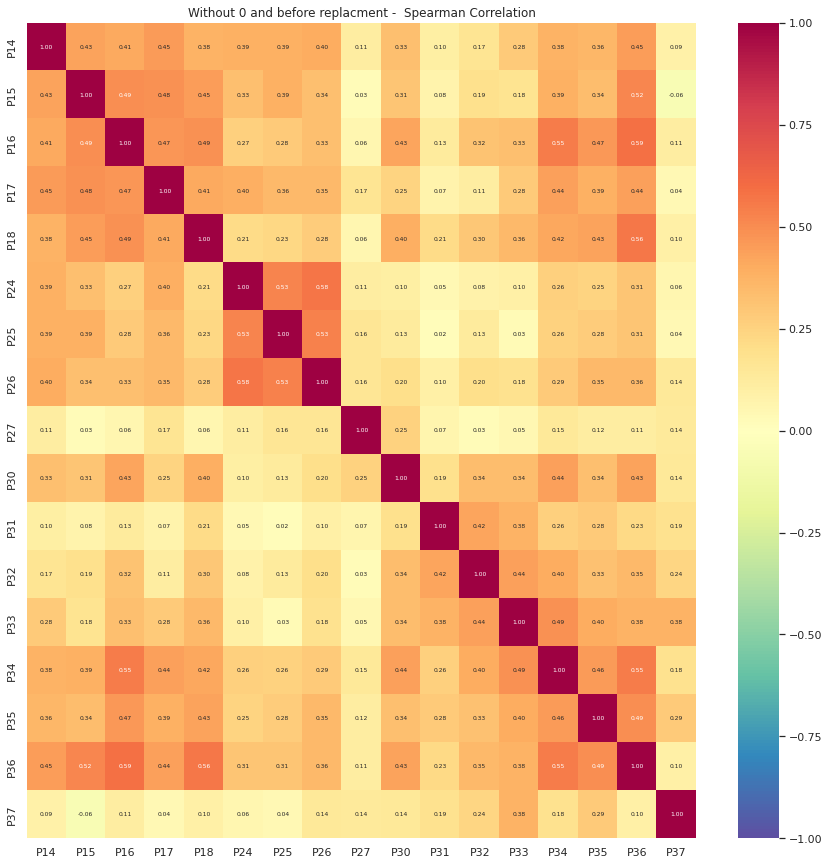

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_merged[PsZeros][df_merged["Type"] == "IL"].corr(method = "spearman"), vmin = -1, vmax = 1, 
            annot = True, cmap ='Spectral_r', annot_kws={"size":6},fmt = ".2f").set(title='Without 0 and before replacment -  Spearman Correlation');

The Ps column with zero appears not to be co-related.

In [55]:
z_mean = df_merged[PsZeros][df_merged['Type'] == 'IL'].mean()
z_mean

P14    3.798133
P15    3.840323
P16    5.200834
P17    3.404802
P18    5.036327
P24    3.604858
P25    3.579174
P26    3.734913
P27    3.381076
P30    6.194776
P31    3.569678
P32    5.766413
P33    2.900051
P34    6.194480
P35    5.451445
P36    5.779656
P37    2.791606
dtype: float64

In [56]:
for i in PsZeros:
  df_merged[i][df_merged['Type'] == 'IL'] = df_merged[i][df_merged['Type'] == 'IL'].fillna(df_merged[i][df_merged['Type'] == 'IL'].mean())
  df_merged[i][df_merged['Type'] != 'IL'] = df_merged[i][df_merged['Type'] == 'IL'].mean()

Scale the Ps Zeros column for the IL type

In [57]:
from sklearn.preprocessing import StandardScaler
# Z-score
scalerZ = StandardScaler()
df_merged[PsZeros] = scalerZ.fit_transform(df_merged[PsZeros])

Scale the remaining numeric columns

In [58]:
PsNorm = [e for e in cols_num if e not in PsZeros]
PsNorm.append('City_Pop_log')
scalerN = StandardScaler()
df_merged[PsNorm] = scalerN.fit_transform(df_merged[PsNorm])

In [59]:
#scalerT = StandardScaler()
#target = ['revenue','revenue_log']
#df_merged[target] = scalerT.fit_transform(df_merged[target])

In [60]:
df_merged.describe().T

count          mean           std           min  \
Id            100137.0  4.993119e+04  2.890688e+04  0.000000e+00   
P1            100137.0  6.506763e-17  1.000005e+00 -1.097708e+00   
P2            100137.0  1.915841e-16  1.000005e+00 -2.398969e+00   
P3            100137.0  7.840755e-17  1.000005e+00 -5.003827e+00   
P4            100137.0  2.860989e-16  1.000005e+00 -2.313201e+00   
P5            100137.0 -7.862043e-17  1.000005e+00 -9.287684e-01   
P6            100137.0  5.279205e-17  1.000005e+00 -1.228423e+00   
P7            100137.0 -9.494055e-17  1.000005e+00 -1.973940e+00   
P8            100137.0  1.941740e-16  1.000005e+00 -2.287383e+00   
P9            100137.0  1.870251e-16  1.000005e+00 -7.350439e-01   
P10           100137.0  1.810824e-16  1.000005e+00 -8.272444e-01   
P11           100137.0  9.352141e-17  1.000005e+00 -1.117879e+00   
P12           100137.0 -1.119702e-16  1.000005e+00 -1.734084e+00   
P13           100137.0  3.198744e-16  1.000005e+00 -2.130490e+00   
P14           100137.0  9.288989e-16  1.000005e+00 -1.907739e+00   
P15           100137.0 -8.569130e-16  1.000005e+00 -2.865176e+00   
P16           100137.0 -5.587159e-16  1.000005e+00 -2.481600e+00   
P17           100137.0 -3.043703e-16  1.000005e+00 -1.575248e+00   
P18           100137.0 -5.306169e-16  1.000005e+00 -2.566813e+00   
P19           100137.0  3.682672e-17  1.000005e+00 -7.243830e-01   
P20           100137.0 -6.274378e-17  1.000005e+00 -9.884575e-01   
P21           100137.0 -1.234653e-17  1.000005e+00 -6.105853e-01   
P22           100137.0  1.827854e-16  1.000005e+00 -1.049214e+00   
P23           100137.0  1.901649e-17  1.000005e+00 -5.593846e-01   
P24           100137.0  6.001903e-16  1.000005e+00 -2.644366e+00   
P25           100137.0 -6.801234e-16  1.000005e+00 -2.692680e+00   
P26           100137.0  7.680392e-16  1.000005e+00 -2.294051e+00   
P27           100137.0  2.973101e-17  1.000005e+00 -1.981528e+00   
P28           100137.0  4.583826e-17  1.000005e+00 -1.045324e+00   
P29           100137.0 -8.280689e-17  1.000005e+00 -1.728957e+00   
P30           100137.0  1.424108e-16  1.000005e+00 -1.958163e+00   
P31           100137.0  3.031995e-16  1.000005e+00 -1.888055e+00   
P32           100137.0  7.788602e-16  1.000005e+00 -1.950336e+00   
P33           100137.0  3.563109e-16  1.000005e+00 -3.289097e+00   
P34           100137.0 -3.054435e-16  1.000005e+00 -1.721375e+00   
P35           100137.0 -7.840578e-16  1.000005e+00 -2.710402e+00   
P36           100137.0  5.725525e-16  1.000005e+00 -2.166180e+00   
P37           100137.0  1.343324e-15  1.000005e+00 -2.239890e+00   
DOpen         100137.0  3.008579e-17  1.000005e+00 -1.099795e+00   
revenue          137.0  4.453533e+06  2.576072e+06  1.149870e+06   
revenue_log      137.0  2.191049e+01  6.935156e-01  2.013304e+01   
City_Pop      100137.0  5.842251e+06  6.513814e+06  4.310000e+02   
resC          100137.0  1.389545e+04  1.474619e+04  1.000000e+00   
City_Pop_log  100137.0 -6.527695e-16  1.000005e+00 -4.590982e+00   

                       25%           50%           75%           max  
Id            2.489700e+04  4.993100e+04  7.496500e+04  9.999900e+04  
P1           -7.422244e-01 -3.867409e-01 -3.125749e-02  3.879060e+00  
P2           -2.995571e-01  4.002469e-01  4.002469e-01  2.149757e+00  
P3           -2.557603e-01 -2.557603e-01 -2.557603e-01  3.898798e+00  
P4           -3.823093e-01 -3.823093e-01  5.831365e-01  2.996751e+00  
P5           -9.287684e-01  9.747209e-03  9.747209e-03  5.640841e+00  
P6           -5.758917e-01 -5.758917e-01  7.291701e-01  4.644355e+00  
P7           -1.380062e-01 -1.380062e-01 -1.380062e-01  2.156911e+00  
P8           -5.418684e-01  3.996990e-02  3.996990e-02  2.949161e+00  
P9           -7.350439e-01 -1.477817e-01 -1.477817e-01  2.788529e+00  
P10          -2.602546e-01 -2.602546e-01 -2.602546e-01  2.574694e+00  
P11          -6.342945e-01 -1.507104e-01  3.328736e-01  3.234378e+00  
P12          -6.013493e-01 -3.498

## Pearson & Spearmen relationships

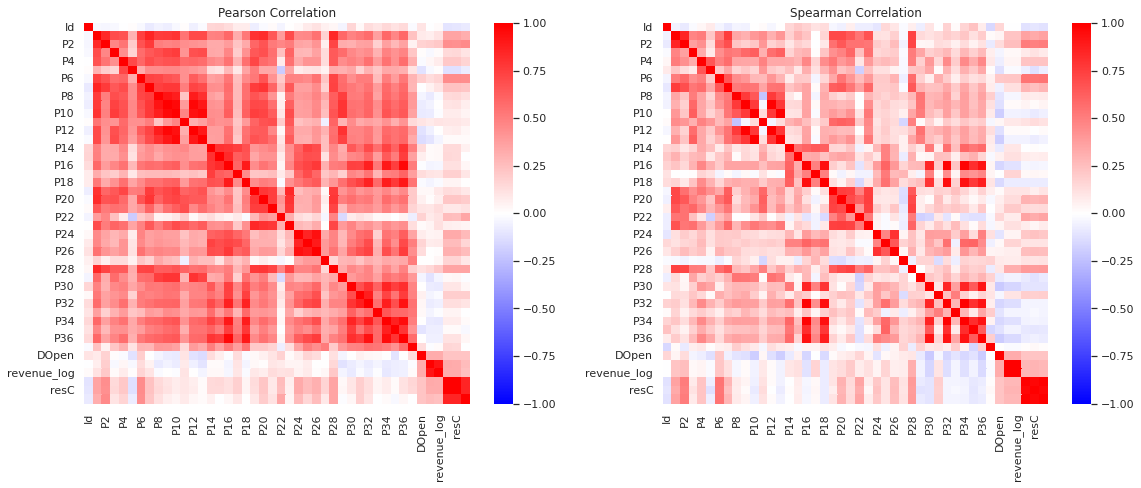

In [61]:
fig, ax = plt.subplots(1,2, figsize=(19, 7))
g1 = sns.heatmap(data = df_merged[df_merged['revenue'] >=0].corr(method = "pearson"), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[0]).set(title='Pearson Correlation');
g2 = sns.heatmap(data = df_merged[df_merged['revenue'] >=0].corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[1]).set(title='Spearman Correlation');
fig.show()

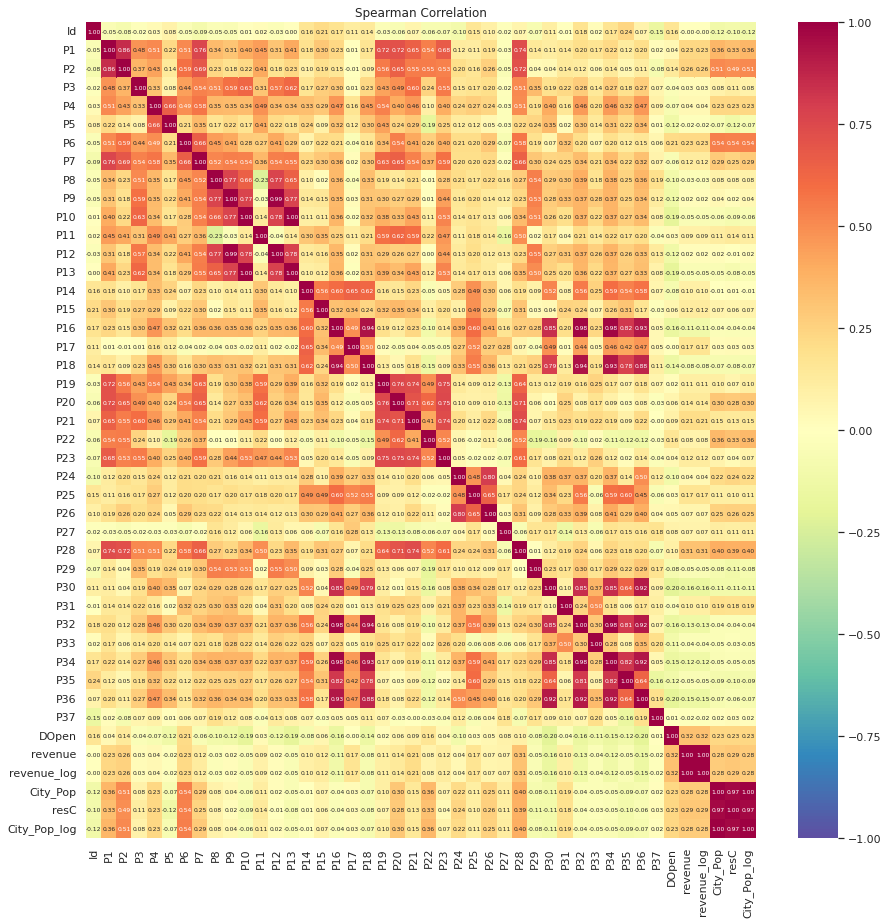

In [62]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_merged[df_merged['revenue'] >=0].corr(method = "spearman"), vmin = -1, vmax = 1, 
            annot = True, cmap ='Spectral_r', annot_kws={"size":6},fmt = ".2f").set(title='Spearman Correlation');

The Ps attributes have a degree of intra-dependents (P9 with P12, P10 with P13) but while P16, P18, P32, P34 appear to match with P36 these are all fields with significant zeros. Before doing additional analysis create categorical data from object columns.

In [63]:
df_merged['P9-12'] = (df_merged['P9'] + df_merged['P12'])/2
df_merged['P10-13'] = (df_merged['P10'] + df_merged['P13'])/2
df_merged.drop(columns=['P9','P10','P12','P13','City_Pop','resC'],inplace=True)

In [64]:
cols_cat

['City', 'City Group', 'Type']

In [65]:
df_merged['Group_cat'] = 0
df_merged['Group_cat'][df_merged['City Group'] == "Big Cities"] = 1
df_merged['Group_cat'] = df_merged['Group_cat'].astype("int64")
df_merged['Type_cat'] = 0
df_merged['Type_cat'][df_merged['Type'] == "IL"] = 1
df_merged['Type_cat'] = df_merged['Type_cat'].astype("int64")

Create features for analysis

In [66]:
features = list(df_merged.drop(columns = ["Id","revenue","revenue_log"]).select_dtypes(include = ["int64", "float64"]))

# Regression analysis

## Split the data back into training & testing datasets

In [67]:
df_training = df_merged[df_merged['revenue'] >= 0].copy()
df_testing = df_merged[df_merged['revenue'].isna()].copy()

Create training and validation set

In [68]:
from sklearn.model_selection import train_test_split
X = df_training[features]
y = df_training['revenue_log']
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 100010 to 100102
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   P1            109 non-null    float64
 1   P2            109 non-null    float64
 2   P3            109 non-null    float64
 3   P4            109 non-null    float64
 4   P5            109 non-null    float64
 5   P6            109 non-null    float64
 6   P7            109 non-null    float64
 7   P8            109 non-null    float64
 8   P11           109 non-null    float64
 9   P14           109 non-null    float64
 10  P15           109 non-null    float64
 11  P16           109 non-null    float64
 12  P17           109 non-null    float64
 13  P18           109 non-null    float64
 14  P19           109 non-null    float64
 15  P20           109 non-null    float64
 16  P21           109 non-null    float64
 17  P22           109 non-null    float64
 18  P23           109 non-

##[Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) estimation

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [71]:
print(regressor.intercept_)

21.962377972668154


In [72]:
pd.DataFrame(regressor.coef_, index = features, columns=["Coef:"])

Coef:
P1           -0.008158
P2           -0.023948
P3           -0.012838
P4            0.048733
P5           -0.059316
P6            0.036400
P7           -0.007736
P8           -0.581951
P11          -0.125042
P14          -0.081000
P15          -0.009827
P16          -0.331552
P17           0.144888
P18           0.096423
P19           0.281072
P20          -0.528929
P21           0.104101
P22          -0.063237
P23          -0.211116
P24           0.268539
P25           0.364319
P26          -0.872895
P27           0.072650
P28           0.760741
P29           0.228627
P30          -0.000213
P31           0.112787
P32          -0.025146
P33          -0.000541
P34          -0.455344
P35           0.268270
P36           0.605819
P37          -0.053357
DOpen         0.195503
City_Pop_log  0.221026
P9-12         0.403136
P10-13       -0.255457
Group_cat    -0.214122
Type_cat      0.228806

City group category doesn't appear to have any effect, while restaurant type has a positive on revenue (IL has greater revenue than FC)

In [73]:
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, accuracy_score

# Calculating predictions
pred = regressor.predict(X_train[features])

# Metrics
print('Linear Regression')
print('Metrics for training')
print("R2 Score:", r2_score(y_train, pred))
print("Expl. Var.:", explained_variance_score(y_train, pred))
print("MSE:", mean_squared_error(y_train, pred))

Linear Regression
Metrics for training
R2 Score: 0.5159855998849245
Expl. Var.: 0.5159855998849245
MSE: 0.2132229777407036


In [74]:
# Calculating predictions
predT = regressor.predict(X_validate[features])

# Metrics
print('Linear Regression')
print('Metrics for test data')
print("R2 Score:", r2_score(y_validate, predT))
print("Expl. Var.:", explained_variance_score(y_validate, predT))
print("MSE:", mean_squared_error(y_validate, predT))

Linear Regression
Metrics for test data
R2 Score: -1.32291554400094
Expl. Var.: -1.1786559131853753
MSE: 1.4414486605989798


Very over trained with an extremely poor result.  LASSO regression can help determine which features to drop.

##[LASSO Regression with CV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html?highlight=lasso#sklearn.linear_model.LassoCV)

In [75]:
from sklearn.linear_model import LassoCV

model_LassoCV = LassoCV()

model_LassoCV.fit(X_train, y_train)

important_features = pd.DataFrame(model_LassoCV.coef_, index = features, columns=["Coef:"])
important_features.loc[(important_features!=0).any(axis=1)]

Coef:
P17           0.107294
P26          -0.007182
P28           0.101209
P30          -0.051088
P32          -0.010967
P34          -0.038001
DOpen         0.101708
City_Pop_log  0.066315

While the results are poor the analysis also indicates only 6 of the P column along with DOpen and City population appears to have any impact on the revenue.

##Correlation plot with Revenue

In [76]:
cols_attr = list(df_training.drop(columns = ["Id","revenue"]).select_dtypes(include = ["int64", "float64"]))

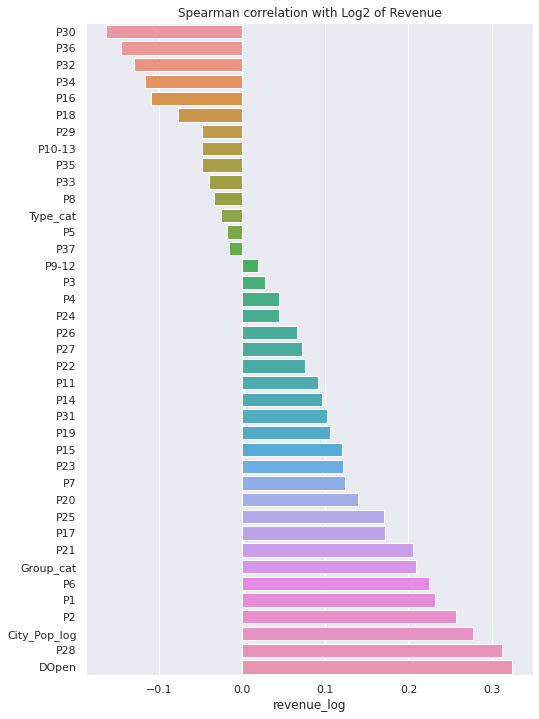

In [77]:
# Creating a plot for the correlation of features to the target variable
fig = plt.figure(figsize=(8,12))
target_corr = df_training[cols_attr].corr(method='spearman')['revenue_log']
order_corr = target_corr.sort_values()
y = pd.DataFrame(order_corr).index[:-1]
x = pd.DataFrame(order_corr).revenue_log[:-1]
sns.barplot(x, y, orient='h').set(title='Spearman correlation with Log2 of Revenue')
plt.show()

Correlation between the target (revenue_log) and the attributes would indicate P1 & P6 should have played a role while P37 should not. 

## Testing for the best Regression Method

In [78]:
# Analysis can either be done with the full feature or a trimed dataset
features2 = list(df_merged.drop(columns = ["Id","revenue","revenue_log"]).select_dtypes(include = ["int64", "float64"]))
features = [e for e in features2 if e not in PsZeros]
X = df_training[features]
target = 'revenue_log'
y = df_training[target]  #choose are 'revenue', 'revenue_log'
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor,plot_importance
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

regressors = [
    ('Linear Regression' , LinearRegression(fit_intercept=False)),
    ('RIDGE Regression' , RidgeCV(fit_intercept=False)),
    ('LASSO Regression' , LassoCV(fit_intercept=False)),
    ('Linear SVR',LinearSVR(fit_intercept=False)),
    ('Gaussian', GaussianProcessRegressor()),
    ('Support Vector Machines' , SVR()),
    ('Ada Boost Regression' , AdaBoostRegressor()),
    ('Decision Tree' , DecisionTreeRegressor()),
    ('Random Forest' , RandomForestRegressor(n_estimators=200,oob_score=True,max_features=0.7)),
    ('K-nearest Neighbors' , KNeighborsRegressor()),
    ('SKlearn HistGBoost', HistGradientBoostingRegressor()),
    ('XGBoost' , XGBRegressor())
]
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors:
  #print(func)
  model = func.fit(X_train, y_train)
  pred = model.predict(X_validate)
  results.loc[method]= [mean_absolute_error(y_validate,pred),
                          mean_squared_error(y_validate,pred),
                          round(r2_score(y_validate,pred),2)
                         ]
print('Results using only the Features without significant zeros')
results

[00:36:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Results using only the Features without significant zeros


MAE         MSE  R2-score
Linear Regression         9.110099  119.092039   -190.92
RIDGE Regression          8.846464  116.190921   -186.24
LASSO Regression          7.760495   94.745568   -151.68
Linear SVR                9.565593  143.036843   -229.51
Gaussian                 14.034418  231.575168   -372.19
Support Vector Machines   0.589108    0.532261      0.14
Ada Boost Regression      0.519221    0.409913      0.34
Decision Tree             0.582595    0.519815      0.16
Random Forest             0.533997    0.439716      0.29
K-nearest Neighbors       0.576386    0.526137      0.15
SKlearn HistGBoost        0.547537    0.455697      0.27
XGBoost                   0.560040    0.483923      0.22

The methods appears to be: SVM, Ada Boost, Random Forest, K-Neighbour & GBoost

In [79]:
# Repeat Analysis with a different randon state number
X = df_training[features]
target = 'revenue_log'
y = df_training[target]  #choose are 'revenue', 'revenue_log'
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=123)

regressors = [
    ('Linear Regression' , LinearRegression(fit_intercept=False)),
    ('RIDGE Regression' , RidgeCV(fit_intercept=False)),
    ('LASSO Regression' , LassoCV(fit_intercept=False)),
    ('Linear SVR',LinearSVR(fit_intercept=False)),
    ('Gaussian', GaussianProcessRegressor()),
    ('Support Vector Machines' , SVR()),
    ('Ada Boost Regression' , AdaBoostRegressor()),
    ('Decision Tree' , DecisionTreeRegressor()),
    ('Random Forest' , RandomForestRegressor()),
    ('K-nearest Neighbors' , KNeighborsRegressor()),
    ('SKlearn HistGBoost', HistGradientBoostingRegressor()),
    ('XGBoost' , XGBRegressor())
]
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors:
  #print(func)
  model = func.fit(X_train, y_train)
  pred = model.predict(X_validate)
  results.loc[method]= [mean_absolute_error(y_validate,pred),
                          mean_squared_error(y_validate,pred),
                          round(r2_score(y_validate,pred),2)
                         ]
print('Results using a new random number')
results

[00:36:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Results using a new random number


MAE         MSE  R2-score
Linear Regression         9.779058  163.796411   -317.52
RIDGE Regression          9.675768  149.855509   -290.41
LASSO Regression          9.303187  132.386874   -256.44
Linear SVR                9.886750  131.249228   -254.23
Gaussian                 12.454110  211.191535   -409.69
Support Vector Machines   0.518359    0.412824      0.20
Ada Boost Regression      0.536676    0.476113      0.07
Decision Tree             0.605164    0.643894     -0.25
Random Forest             0.547955    0.463690      0.10
K-nearest Neighbors       0.576255    0.529288     -0.03
SKlearn HistGBoost        0.608881    0.538689     -0.05
XGBoost                   0.516930    0.400602      0.22

Repeating the analysis with a different random number produces significantly different results.  The SVM, ADA & RF still have positive results but DT, KN & one of the GB flip to negative.

In [80]:
# Repeat Analysis with a different randon state number
X = df_training[features]
target = 'revenue_log'
y = df_training[target]  #choose are 'revenue', 'revenue_log'
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=777)

regressors = [
    ('Linear Regression' , LinearRegression(fit_intercept=False)),
    ('RIDGE Regression' , RidgeCV(fit_intercept=False)),
    ('LASSO Regression' , LassoCV(fit_intercept=False)),
    ('Linear SVR',LinearSVR(fit_intercept=False)),
    ('Gaussian', GaussianProcessRegressor()),
    ('Support Vector Machines' , SVR()),
    ('Ada Boost Regression' , AdaBoostRegressor()),
    ('Decision Tree' , DecisionTreeRegressor()),
    ('Random Forest' , RandomForestRegressor()),
    ('K-nearest Neighbors' , KNeighborsRegressor()),
    ('SKlearn HistGBoost', HistGradientBoostingRegressor()),
    ('XGBoost' , XGBRegressor())
]
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors:
  #print(func)
  model = func.fit(X_train, y_train)
  pred = model.predict(X_validate)
  results.loc[method]= [mean_absolute_error(y_validate,pred),
                          mean_squared_error(y_validate,pred),
                          round(r2_score(y_validate,pred),2)
                         ]
print('Results using again a new random number')
results

[00:36:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Results using again a new random number


MAE         MSE  R2-score
Linear Regression         9.166574  134.351727   -243.00
RIDGE Regression          9.131426  133.830537   -242.06
LASSO Regression          7.952370   99.991862   -180.60
Linear SVR               10.267417  150.891553   -273.04
Gaussian                 13.740534  223.880119   -405.60
Support Vector Machines   0.585716    0.497759      0.10
Ada Boost Regression      0.565507    0.497016      0.10
Decision Tree             0.601039    0.536982      0.02
Random Forest             0.525280    0.407678      0.26
K-nearest Neighbors       0.614260    0.523438      0.05
SKlearn HistGBoost        0.640836    0.600742     -0.09
XGBoost                   0.607052    0.539390      0.02

3rd run appear to show only SVM and RF are the only stable methods.

##[Support Vector](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)  
Another method to determine the important features to use in the modelling is [feature_selection](https://scikit-learn.org/stable/modules/feature_selection.html)

In [81]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVR

modelSV = SVR().fit(X, y)

sfs2 = SFS(modelSV, n_features_to_select=5,
           direction = 'forward',
           scoring='r2',
           n_jobs=-1,
           cv=3)
sfs2 = sfs2.fit(X, y)

best_features = np.arange(X.shape[1])[sfs2.support_]

print('Support Vector - Feature Selection')
for i in best_features:
  print(features[i])

Support Vector - Feature Selection
P4
P5
P22
DOpen
Group_cat


##[ADA Boost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

In [82]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import AdaBoostRegressor

modelADA = AdaBoostRegressor().fit(X, y)

sfs2 = SFS(modelADA, n_features_to_select=5,
           direction = 'forward',
           scoring='r2',
           n_jobs=-1,
           cv=3)
sfs2 = sfs2.fit(X, y)

best_features = np.arange(X.shape[1])[sfs2.support_]

print('ADA Boost - Feature Selection')
for i in best_features:
  print(features[i])

ADA Boost - Feature Selection
P3
P4
P6
P19
City_Pop_log


In [83]:
from sklearn.model_selection import RandomizedSearchCV

# Parameters to test
params = {
    "n_estimators": np.arange(50, 400, 50),
    "learning_rate": np.arange(0.02, 0.1, 0.02)
}

# Grid Search
grid_cv = RandomizedSearchCV(modelADA, params, scoring = "r2", cv = 5, n_iter = 10, verbose=1).fit(X_train, y_train)

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with R2 score of {grid_cv.best_score_}!")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'n_estimators': 300, 'learning_rate': 0.02} with R2 score of 0.17705473390599075!


##[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

In [84]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=200,oob_score=True,max_features=0.7).fit(X, y)
important_features = pd.DataFrame(modelRF.feature_importances_, index = features, columns=["Weight"]).sort_values(by = ['Weight'],ascending = False)
print('Random Forest - Feature Importance')
print(important_features[:5])

sfs2 = SFS(modelRF, n_features_to_select=5,
           direction = 'forward',
           scoring='r2',
           n_jobs=-1,
           cv=3)
sfs2 = sfs2.fit(X, y)

best_features = np.arange(X.shape[1])[sfs2.support_]

print('Random Forest - Feature Selection')
for i in best_features:
  print(features[i])

Random Forest - Feature Importance
                Weight
DOpen         0.286103
City_Pop_log  0.103219
P28           0.067834
P29           0.064786
P1            0.040248
Random Forest - Feature Selection
P6
P20
P28
DOpen
City_Pop_log


In [85]:
from sklearn.model_selection import RandomizedSearchCV

# Parameters to test
params = {
    "n_estimators": np.arange(50, 400, 50),
    "max_depth": np.arange(3,7,2),
    "max_features": np.arange(0.5,0.9,0.1)
}

# Grid Search
grid_cv = RandomizedSearchCV(modelRF, params, scoring = "r2", cv = 5, n_iter = 10, verbose=1).fit(X_train, y_train)

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with R2 score of {grid_cv.best_score_}!")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'n_estimators': 50, 'max_features': 0.7, 'max_depth': 3} with R2 score of 0.19243398734081457!


##[KNeighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html?highlight=kneighborsregressor#sklearn.neighbors.KNeighborsRegressor)

In [86]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsRegressor

modelKN = KNeighborsRegressor().fit(X, y)

sfs2 = SFS(modelKN, n_features_to_select=5,
           direction = 'forward',
           scoring='r2',
           n_jobs=-1,
           cv=3)
sfs2 = sfs2.fit(X, y)

best_features = np.arange(X.shape[1])[sfs2.support_]

print('KNeighbour - Feature Selection')
for i in best_features:
  print(features[i])

KNeighbour - Feature Selection
P23
P28
P29
DOpen
P10-13


In [87]:
from sklearn.model_selection import RandomizedSearchCV

# Parameters to test
params = {
    "n_neighbors": np.arange(3, 9, 2)
}

# Grid Search
grid_cv = RandomizedSearchCV(modelKN, params, scoring = "r2", cv = 5, n_iter = 10, verbose=1).fit(X_train, y_train)

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with R2 score of {grid_cv.best_score_}!")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters are {'n_neighbors': 7} with R2 score of 0.10415103936759056!


##[Histogram Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html?highlight=histgradientboostingregressor#sklearn.ensemble.HistGradientBoostingRegressor)

In [88]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import HistGradientBoostingRegressor

modelHGB = HistGradientBoostingRegressor().fit(X, y)

sfs2 = SFS(modelHGB, n_features_to_select=5,
           direction = 'forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)
sfs2 = sfs2.fit(X, y)

best_features = np.arange(X.shape[1])[sfs2.support_]

print('Hist GBoost - Feature Selection')
for i in best_features:
  print(features[i])

Hist GBoost - Feature Selection
P2
P4
P23
DOpen
City_Pop_log


In [89]:
from sklearn.model_selection import RandomizedSearchCV

# Parameters to test
params = {
    "max_iter": np.arange(50, 400, 50),
    "max_depth": np.arange(3,10,1),
    "learning_rate": np.arange(0.02, 0.1, 0.02)
}

# Grid Search
grid_cv = RandomizedSearchCV(modelHGB, params, scoring = "r2", cv = 5, n_iter = 10, verbose=1).fit(X_train, y_train)

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with R2 score of {grid_cv.best_score_}!")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'max_iter': 50, 'max_depth': 8, 'learning_rate': 0.06} with R2 score of 0.13716546260939605!


##[XGBoost](https://xgboost.readthedocs.io/en/stable/parameter.html#)

In [90]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from xgboost import XGBRegressor,plot_importance

modelXGB = XGBRegressor().fit(X, y)
important_features = pd.DataFrame(modelXGB.feature_importances_, index = features, columns=["Weight"]).sort_values(by = ['Weight'],ascending = False)
print('XGBoost - Feature Importance')
print(important_features[:5])

sfs2 = SFS(modelXGB, n_features_to_select=5,
           direction = 'forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)
sfs2 = sfs2.fit(X, y)

best_features = np.arange(X.shape[1])[sfs2.support_]

print('XGBoost - Feature Selection')
for i in best_features:
  print(features[i])

[00:39:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost - Feature Importance
                Weight
P28           0.074022
City_Pop_log  0.072556
P20           0.063334
DOpen         0.062903
P29           0.060492
XGBoost - Feature Selection
P2
P5
P21
P23
Group_cat


In [91]:
from sklearn.model_selection import RandomizedSearchCV

# Parameters to test
params = {
    "max_depth": np.arange(4, 10, 2),
    "n_estimators": np.arange(50, 400, 50),
    "max_features": np.arange(0.5,0.9,0.2),
    "learning_rate": np.arange(0.02, 0.1, 0.02)
}

# Grid Search
grid_cv = RandomizedSearchCV(modelXGB, params, scoring = "r2", cv = 5, n_iter = 10, verbose=1).fit(X_train, y_train);

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with R2 score of {grid_cv.best_score_}!")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[00:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:39:28] WARNING: /workspace/src/objective/regre

#Feature Selection
The features appears multiple times: City_Pop_Log, DOpen, P28  
Twice: P2, P4, P6, P19, P29


Please note that the feature selection problems was run without the columns containing zeros (P14-P18, P24-P27 & P30-37).  

Resplit the training & test data out

In [92]:
df_training = df_merged[df_merged['revenue'] >= -10]
df_testing = df_merged[df_merged['revenue'].isna()].copy()

In [93]:
# Analysis can either be done with the full feature or a trimed dataset
featuresSFS = ['DOpen','City_Pop_log','Type_cat','P1','P2','P4','P19','P21','P28','P29']
X = df_training[featuresSFS]
y = df_training['revenue_log']  #choose are 'revenue', 'revenue_log'
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

regressors = [
    ('Support Vector Machines' , SVR()),
    ('AdaBoost Regressor' , AdaBoostRegressor(n_estimators= 200, learning_rate= 0.04)),
    ('Random Forest' , RandomForestRegressor(n_estimators=200, max_depth= 5,oob_score=True,max_features=0.7)),
    ('K-nearest Neighbors' , KNeighborsRegressor(n_neighbors= 7)),
    ('SKlearn HistGBoost', HistGradientBoostingRegressor(max_iter=200,max_depth=5,learning_rate=0.04)),
    ('XGBoost' , XGBRegressor(n_estimators= 200, max_depth= 5, learning_rate= 0.04,max_features=0.7))]

results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors:
  #print(func)
  model = func.fit(X_train, y_train)
  pred = model.predict(X_validate)
  results.loc[method]= [mean_absolute_error(y_validate,pred),
                          mean_squared_error(y_validate,pred),
                          round(r2_score(y_validate,pred)*100,1)
                         ]
print('Analysis using the trimed Features')
results

[00:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Analysis using the trimed Features


MAE       MSE  R2-score
Support Vector Machines  0.595433  0.554096      10.7
AdaBoost Regressor       0.537371  0.475208      23.4
Random Forest            0.527349  0.445399      28.2
K-nearest Neighbors      0.601639  0.564538       9.0
SKlearn HistGBoost       0.548235  0.476110      23.3
XGBoost                  0.540046  0.478264      22.9

# [VotingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor)  
Routine for using a soft voting method to derive the best result from a number of machine learning approaches

In [94]:
from sklearn.ensemble import VotingRegressor

# Train classifiers
reg1 = SVR()
reg2 = AdaBoostRegressor(n_estimators= 200, learning_rate= 0.04)
reg3 = RandomForestRegressor(n_estimators=200, max_depth= 5,oob_score=True,max_features=0.7)
reg4 = KNeighborsRegressor(n_neighbors= 7)
reg5 = HistGradientBoostingRegressor(max_iter=200,max_depth=5,learning_rate=0.04)
reg6 = XGBRegressor(n_estimators=200,max_depth=5,learning_rate=0.04,max_features=0.7)

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)
reg6.fit(X_train, y_train)

ereg = VotingRegressor([("SVR", reg1), ("ADA", reg2), ("RF", reg3), ("KN", reg4), ("HGB", reg5), ("XGB", reg6)])
ereg.fit(X_train, y_train)

predT = ereg.predict(X_train[featuresSFS])
pred = ereg.predict(X_validate[featuresSFS])
# Metrics
print('Metrics for test data')
print("R2 Score:", r2_score(y_validate, pred))
print("Expl. Var.:", explained_variance_score(y_validate, pred))
print("MSE:", mean_squared_error(y_validate, pred))


[00:39:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:39:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Metrics for test data
R2 Score: 0.2335856377977168
Expl. Var.: 0.23415524992056524
MSE: 0.4755863633154351


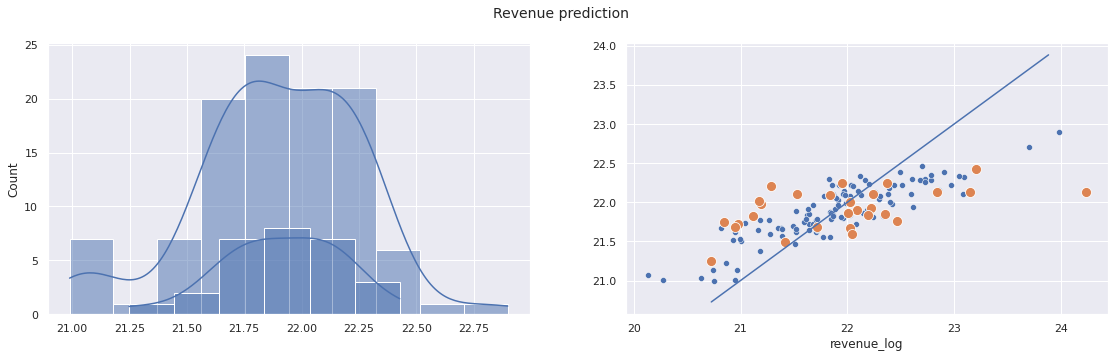

In [95]:
line = arange(np.min(y_validate),np.max(y_validate),(np.max(y_validate)-np.min(y_validate))/10)
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(x=predT,kde=True, ax=ax[0])
g1 = sns.histplot(x=pred,kde=True, ax=ax[0])
g2 = sns.scatterplot(x=y_train,y=predT, ax=ax[1])
g2 = sns.scatterplot(x=y_validate,y=pred, s=100, ax=ax[1])
g2 = sns.lineplot(line,line, ax=ax[1])
plt.suptitle('Revenue prediction',fontsize=14)
fig.show();

Results always appear to have a rotated output between predicted and actual revenue

## Change the random number

In [96]:
# Analysis can either be done with the full feature or a trimed dataset
              
X = df_training[featuresSFS]
y = df_training['revenue_log']  #choose are 'revenue', 'revenue_log'
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=123)

results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors:
  #print(func)
  model = func.fit(X_train, y_train)
  pred = model.predict(X_validate)
  results.loc[method]= [mean_absolute_error(y_validate,pred),
                          mean_squared_error(y_validate,pred),
                          round(r2_score(y_validate,pred)*100,1)
                         ]
print('Analysis using the trimed Features')
results


[00:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Analysis using the trimed Features


MAE       MSE  R2-score
Support Vector Machines  0.504232  0.412817      19.7
AdaBoost Regressor       0.515362  0.472892       8.0
Random Forest            0.490841  0.422601      17.8
K-nearest Neighbors      0.597157  0.543799      -5.7
SKlearn HistGBoost       0.538183  0.503435       2.1
XGBoost                  0.511731  0.441594      14.1

Changing the random number for the training split continues to demonstrate a different R2 result

In [97]:
# Train classifiers

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)
reg6.fit(X_train, y_train)

ereg = VotingRegressor([("SVR", reg1), ("ADA", reg2), ("RF", reg3), ("KN", reg4), ("HGB", reg5), ("XGB", reg6)])
ereg.fit(X_train, y_train)

predT = ereg.predict(X_train[featuresSFS])
pred = ereg.predict(X_validate[featuresSFS])
# Metrics
print('Metrics for test data')
print("R2 Score:", r2_score(y_validate, pred))
print("Expl. Var.:", explained_variance_score(y_validate, pred))
print("MSE:", mean_squared_error(y_validate, pred))

[00:39:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Metrics for test data
R2 Score: 0.1358101121912313
Expl. Var.: 0.14560802459507927
MSE: 0.444400395202542


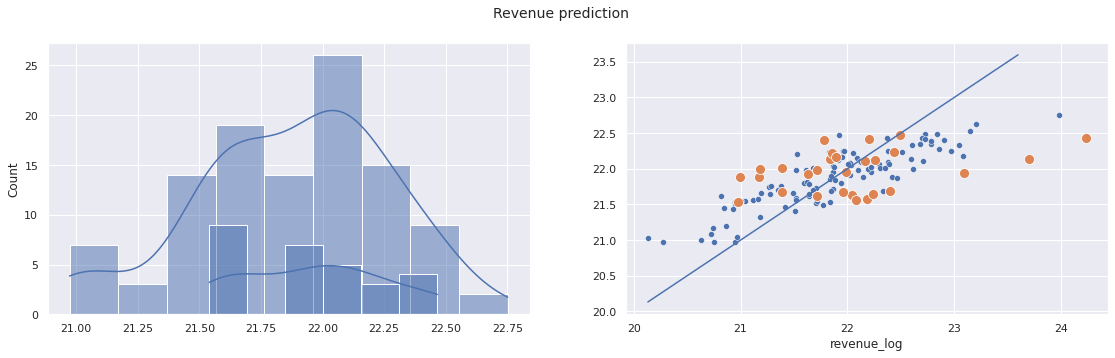

In [98]:
line = arange(np.min(y_train),np.max(y_train),(np.max(y_train)-np.min(y_train))/10)
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(x=predT,kde=True, ax=ax[0])
g1 = sns.histplot(x=pred,kde=True, ax=ax[0])
g2 = sns.scatterplot(x=y_train,y=predT, ax=ax[1])
g2 = sns.scatterplot(x=y_validate,y=pred, s=100, ax=ax[1])
g2 = sns.lineplot(line,line, ax=ax[1])
plt.suptitle('Revenue prediction',fontsize=14)
fig.show();

The results are highly dependent on the training and test data split.

##Stack Estimation

Using 100% of training data to provide an estimate on the overall test data

In [99]:
X = df_training[featuresSFS]
y = df_training['revenue_log']

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)
reg4.fit(X, y)
reg5.fit(X, y)
reg6.fit(X, y)

ereg = VotingRegressor([("SVR", reg1), ("ADA", reg2), ("RF", reg3), ("KN", reg4), ("HGB", reg5), ("XGB", reg6)])
ereg.fit(X, y)

pred = ereg.predict(X[featuresSFS])
# Metrics
print('Metrics for test data')
print("R2 Score:", r2_score(y, pred))
print("Expl. Var.:", explained_variance_score(y, pred))
print("MSE:", mean_squared_error(y, pred))

[00:39:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:39:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Metrics for test data
R2 Score: 0.6747514537667934
Expl. Var.: 0.6748101438442917
MSE: 0.1552909489426719


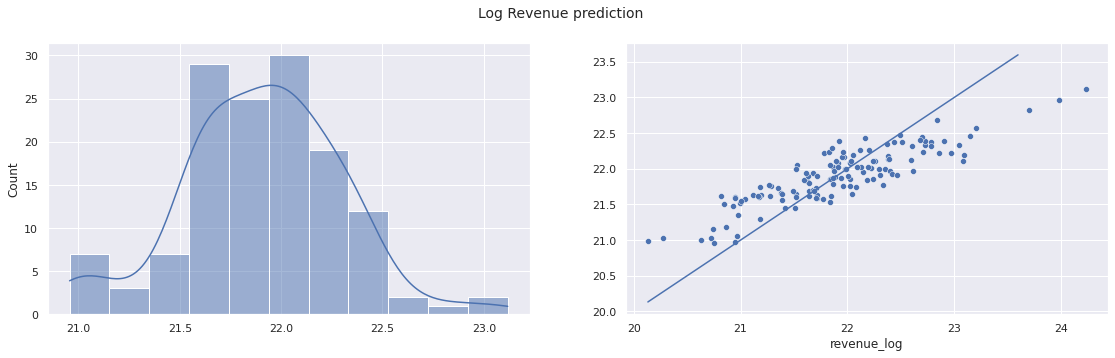

In [100]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(x=pred,kde=True, ax=ax[0])
g2 = sns.scatterplot(x=y,y=pred, ax=ax[1])
g2 = sns.lineplot(line,line, ax=ax[1])
plt.suptitle('Log Revenue prediction',fontsize=14)
fig.show();

## Rotation of estimate to match the actual target

In [101]:
from sklearn.linear_model import LinearRegression

# Creating the model
model_lr = LinearRegression(fit_intercept=False)

X = pred.reshape(-1,1)
Y = y.to_numpy()
Y = Y.reshape(-1,1)

# Linear model on the train data
model_lr.fit(X, Y)
revInt = model_lr.intercept_
revSlope = model_lr.coef_
print('Intercept is ', revInt,' +', revSlope,' days open')

Intercept is  0.0  + [[1.0004165]]  days open


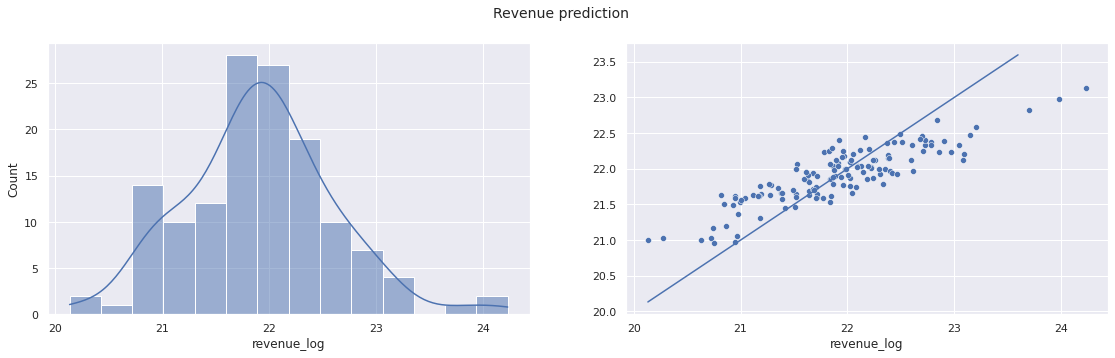

In [102]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(x=y,kde=True, ax=ax[0])
g2 = sns.scatterplot(x=y,y=(revInt + revSlope[0] * pred), ax=ax[1])
g2 = sns.lineplot(line,line, ax=ax[1])
plt.suptitle('Revenue prediction',fontsize=14)
fig.show();

#Estimation on Test Data

In [103]:
df_test['Prediction'] = ereg.predict(df_testing[featuresSFS])
df_test['PredictionR'] = revInt + revSlope[0] * df_test['Prediction']

#df_test['Prediction'] = df_test['Prediction']*Ltarget_std + Ltarget_mean
#df_test['PredictionR'] = df_test['PredictionR']*Ltarget_std + Ltarget_mean

df_test['Prediction'] = np.power(2,df_test['Prediction'])
df_test['PredictionR'] = np.power(2,df_test['PredictionR'])

In [104]:
df_test['Prediction'] 

0        3.974805e+06
1        3.401407e+06
2        3.298899e+06
3        3.448595e+06
4        3.979053e+06
             ...     
99995    4.825240e+06
99996    3.224964e+06
99997    3.273322e+06
99998    3.451838e+06
99999    4.716791e+06
Name: Prediction, Length: 100000, dtype: float64

# Export initial results

In [105]:
# Export results for submission
print('data saved to directory')
outputFeature = ['Id','Prediction']
df = pd.DataFrame(df_test[outputFeature])
df.to_csv(filepath + '/CDSsubmission.csv', sep=',', index=False)

data saved to directory


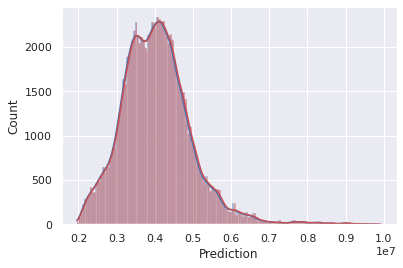

In [106]:
sns.histplot(x=df['Prediction'],kde=True)
sns.histplot(x=df_test['PredictionR'],kde=True,color='r')

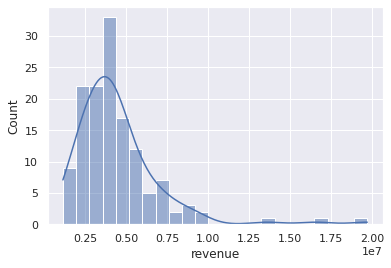

In [127]:
#revZ = df_training['revenue_log']*Ltarget_std + Ltarget_mean
#revCov = np.power(2,revZ)
#sns.histplot(x=revCov,kde=True)
sns.histplot(x=df_train['revenue'],kde=True)

#Estimate for IL  
The prediction so far has not used the columns with the zeros. As these column appear only to correlate with the IL type a second run will be performed and merged with the first.

In [108]:
# Analysis can either be done with the full feature 
features = list(df_merged.drop(columns = ["Id","revenue","revenue_log","Type_cat"]).select_dtypes(include = ["int64", "float64"]))
X = df_training[features][df_training['Type_cat'] == 1]
target = 'revenue_log'
y = df_training[target][df_training['Type_cat'] == 1]  
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
X.describe().T

count      mean       std       min       25%           50%  \
P1             60.0  0.193882  1.172569 -1.097708 -0.475612 -3.125749e-02   
P2             60.0  0.155316  1.143925 -2.398969 -0.299557  4.002469e-01   
P3             60.0  0.387207  1.232866 -2.629793 -0.255760 -2.557603e-01   
P4             60.0  0.052141  1.144058 -1.347755 -0.382309 -3.823093e-01   
P5             60.0  0.072315  1.207916 -0.928768 -0.928768  9.747209e-03   
P6             60.0  0.533411  1.501999 -1.228423 -0.575892  7.663916e-02   
P7             60.0  0.282729  1.122023 -1.973940 -0.138006 -1.380062e-01   
P8             60.0  0.282403  1.236781 -2.287383 -0.541868  3.996990e-02   
P11            60.0  0.074962  1.016976 -1.117879 -0.634294 -1.507104e-01   
P14            60.0  0.096448  2.022733 -1.907739 -1.225949 -2.720795e-01   
P15            60.0  0.109363  2.263929 -2.865176 -1.856426 -1.343925e-15   
P16            60.0  0.153206  2.079098 -2.481600 -1.300120 -1.186407e-01   
P17            60.0 -0.229546  1.462118 -1.575248 -1.083966 -2.651628e-01   
P18            60.0  0.236275  1.938145 -2.566813 -0.659029 -6.590295e-01   
P19            60.0  0.165814  1.117878 -0.724383 -0.551529 -1.193950e-01   
P20            60.0  0.289503  1.124821 -0.988458 -0.434828  1.188011e-01   
P21            60.0  0.102157  0.846435 -0.610585 -0.610585 -2.146175e-01   
P22            60.0 -0.009856  0.878444 -1.049214 -0.498966 -3.155498e-01   
P23            60.0  0.189376  1.119620 -0.559385 -0.559385 -1.355576e-01   
P24            60.0  0.178866  2.119374 -2.644366 -1.629199  9.016491e-16   
P25            60.0 -0.108249  2.156761 -2.692680 -1.648671 -3.023313e-01   
P26            60.0  0.293009  2.161381 -2.294051 -0.721297  7.450060e-16   
P27            60.0 -0.062824  1.676449 -1.981528 -1.149329  0.000000e+00   
P28            60.0  0.124586  1.255236 -1.045324 -0.577360 -1.093958e-01   
P29            60.0  0.130396  1.021748 -1.168348 -0.327435 -4.713030e-02   
P30            60.0  0.489063  2.355522 -1.204266 -0.544606 -4.503689e-01   
P31            60.0  1.141610  2.650333 -1.888055 -0.104642  1.050920e+00   
P32            60.0  0.470415  2.463385 -1.950336 -0.825082 -3.136034e-01   
P33            60.0  0.395189  1.914160 -1.558039 -1.558039  7.687439e-16   
P34            60.0  0.236717  1.970889 -1.389990 -1.058604 -7.272188e-01   
P35            60.0  0.170305  1.890169 -2.710402 -0.883758 -2.748763e-01   
P36            60.0  0.191527  1.993189 -1.712972 -1.259763 -3.533466e-01   
P37            60.0  0.287435  1.830908 -2.239890 -0.989676  1.665619e-15   
DOpen          60.0 -0.015255  1.001375 -1.087217 -0.659421 -3.519745e-01   
City_Pop_log   60.0  0.122741  1.164276 -4.590982 -0.485871  3.497241e-01   
P9-12          60.0  0.289661  1.256265 -1.234564 -0.235586 -9.138182e-02   
P10-13         60.0  0.193779  1.215318 -1.478867 -0.174349 -1.743485e-01   
Group_cat      60.0  0.633333  0.485961  0.000000  0.000000  1.000000e+00   

                       75%       max  
P1            5.761336e-02  2.812610  
P2            4.002469e-01  2.149757  
P3            9.312563e-01  3.898798  
P4            5.831365e-01  2.996751  
P5            9.747209e-03  5.640841  
P6            1.381701e+00  4.644355  
P7           -1.380062e-01  2.156911  
P8            3.996990e-02  2.949161  
P11           4.537696e-01  3.234378  
P14           1.376312e-01  7.637324  
P15           1.610746e-01  6.213576  
P16          -5.246824e-16  5.788757  
P17          -2.908974e-16  7.595351  
P18          -5.648175e-16  4.428394  
P19          -3.296816e-02  3.424106  
P20           1.188011e-01  2.886948  
P21           5.773181e-01  2.557157  
P22           4.181150e-01  1.885444  
P23           2.882694e-01  4.526540  
P24           1.416301e+00  6.492135  
P25           4.393461e-01  6.703398  
P26           1.061158e+00  7.352175  
P27           5.150680e-01  7.588757  
P28           8.265323e-01  4.336263  
P29          -4.713030e-02  2.47561

In [110]:
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors:
  model = func.fit(X_train, y_train)
  pred = model.predict(X_validate)
  results.loc[method]= [mean_absolute_error(y_validate,pred),
                          mean_squared_error(y_validate,pred),
                          round(r2_score(y_validate,pred),2)
                         ]
print('Results using only the Features without significant zeros')
results

[00:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Results using only the Features without significant zeros


MAE       MSE  R2-score
Support Vector Machines  0.466817  0.349647      0.33
AdaBoost Regressor       0.535352  0.425292      0.18
Random Forest            0.518450  0.407655      0.22
K-nearest Neighbors      0.563542  0.499536      0.04
SKlearn HistGBoost       0.538804  0.496841      0.05
XGBoost                  0.546399  0.486404      0.07

In [111]:
modelRF = RandomForestRegressor(n_estimators=200,oob_score=True,max_features=0.8,max_depth=5).fit(X, y)
important_features = pd.DataFrame(modelRF.feature_importances_, index = features, columns=["Weight"]).sort_values(by = ['Weight'],ascending = False)
print('Random Forest - Feature Importance')
print(important_features[:8])

sfs2 = SFS(modelRF, n_features_to_select=7,
           direction = 'forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)
sfs2 = sfs2.fit(X, y)

best_features = np.arange(X.shape[1])[sfs2.support_]

print('Random Forest - Feature Selection')
for i in best_features:
  print(features[i])

Random Forest - Feature Importance
                Weight
P17           0.176185
DOpen         0.096545
P25           0.043728
P3            0.036781
P28           0.033515
P23           0.033149
City_Pop_log  0.030400
P31           0.029449
Random Forest - Feature Selection
P3
P17
P19
P23
P25
P34
P37


In [112]:
# Parameters to test
params = {
    "n_estimators": np.arange(50, 400, 50),
    "max_depth": np.arange(3,7,2),
    "max_features": np.arange(0.5,0.9,0.1)
}

# Grid Search
grid_cv = RandomizedSearchCV(modelRF, params, scoring = "r2", cv = 5, n_iter = 20, verbose=1).fit(X_train, y_train)

# Best Model
print(f"Best parameters are {grid_cv.best_params_} with R2 score of {grid_cv.best_score_}!")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters are {'n_estimators': 50, 'max_features': 0.6, 'max_depth': 3} with R2 score of 0.054656786354940756!


In [113]:
# Train classifiers
reg1 = SVR()
reg2 = AdaBoostRegressor(n_estimators= 200, learning_rate= 0.04)
reg3 = RandomForestRegressor(n_estimators=200, max_depth= 5,oob_score=True,max_features=0.7)
reg4 = KNeighborsRegressor(n_neighbors= 7)
reg5 = HistGradientBoostingRegressor(max_iter=200,max_depth=5,learning_rate=0.04)
reg6 = XGBRegressor(n_estimators=200,max_depth=5,learning_rate=0.04,max_features=0.7)

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)
reg6.fit(X_train, y_train)

ereg = VotingRegressor([("SVR", reg1), ("ADA", reg2), ("RF", reg3), ("KN", reg4), ("HGB", reg5), ("XGB", reg6)])
ereg.fit(X_train, y_train)

predT = ereg.predict(X_train[features])
pred = ereg.predict(X_validate[features])
# Metrics
print('Metrics for test data')
print("R2 Score:", r2_score(y_validate, pred))
print("Expl. Var.:", explained_variance_score(y_validate, pred))
print("MSE:", mean_squared_error(y_validate, pred))


[00:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Metrics for test data
R2 Score: 0.1969811228952688
Expl. Var.: 0.2131727414335881
MSE: 0.418003100678267


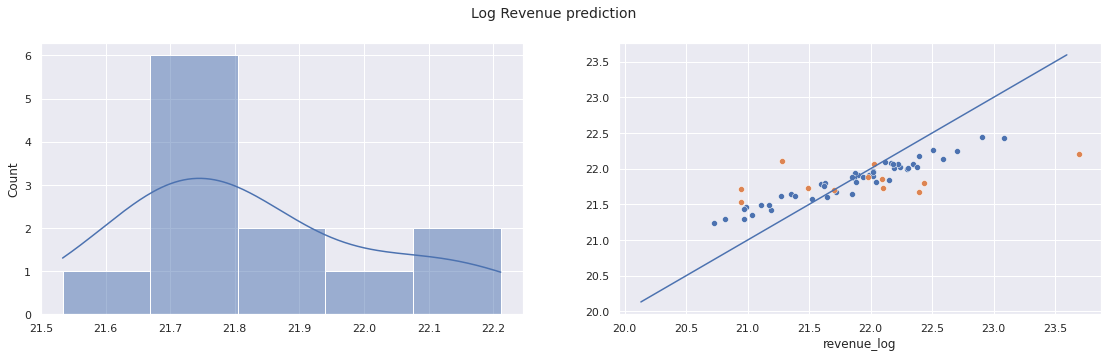

In [114]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(x=pred,kde=True, ax=ax[0])
g2 = sns.scatterplot(x=y_train,y=predT, ax=ax[1])
g2 = sns.scatterplot(x=y_validate,y=pred, ax=ax[1])
g2 = sns.lineplot(line,line, ax=ax[1])
plt.suptitle('Log Revenue prediction',fontsize=14)
fig.show();

In [115]:
# Analysis using selected features 
featuresIL = ['DOpen','City_Pop_log','P2','P3','P17','P23','P25','P28','P29','P31','P32','P36','P37']
X = df_training[featuresIL][df_training['Type_cat'] == 1]
target = 'revenue_log'
y = df_training[target][df_training['Type_cat'] == 1]  
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
df_training.describe().T

count          mean           std           min           25%  \
Id            137.0  6.800000e+01  3.969257e+01  0.000000e+00  3.400000e+01   
P1            137.0 -2.606795e-02  1.034596e+00 -1.097708e+00 -7.422244e-01   
P2            137.0 -1.350582e-02  1.060133e+00 -2.398969e+00 -2.995571e-01   
P3            137.0  1.211391e-01  1.225401e+00 -5.003827e+00 -2.557603e-01   
P4            137.0 -2.290976e-02  9.813393e-01 -1.347755e+00 -3.823093e-01   
P5            137.0  1.659769e-02  1.135248e+00 -9.287684e-01 -9.287684e-01   
P6            137.0  3.100261e-01  1.392654e+00 -1.228423e+00 -5.758917e-01   
P7            137.0  5.630790e-02  1.054197e+00 -1.973940e+00 -1.380062e-01   
P8            137.0  1.291568e-01  1.081386e+00 -2.287383e+00 -5.418684e-01   
P11           137.0 -2.363726e-02  9.240164e-01 -1.117879e+00 -6.342945e-01   
P14           137.0  4.223998e-02  1.333144e+00 -1.907739e+00  9.083271e-16   
P15           137.0  4.789604e-02  1.492138e+00 -2.865176e+00 -4.479751e-16   
P16           137.0  6.709767e-02  1.371527e+00 -2.481600e+00 -1.186407e-01   
P17           137.0 -1.005309e-01  9.697880e-01 -1.575248e+00 -2.651628e-01   
P18           137.0  1.034781e-01  1.281975e+00 -2.566813e+00 -2.310151e-02   
P19           137.0 -4.937034e-02  9.687528e-01 -7.243830e-01 -5.515293e-01   
P20           137.0 -6.472677e-03  1.026440e+00 -9.884575e-01 -7.116429e-01   
P21           137.0 -1.076773e-01  8.127753e-01 -6.105853e-01 -6.105853e-01   
P22           137.0 -1.495380e-01  9.029140e-01 -1.049214e+00 -1.049214e+00   
P23           137.0 -4.584240e-02  9.662428e-01 -5.593846e-01 -5.593846e-01   
P24           137.0  7.833568e-02  1.398770e+00 -2.644366e+00  4.508246e-16   
P25           137.0 -4.740845e-02  1.421579e+00 -2.692680e+00 -9.272659e-16   
P26           137.0  1.283250e-01  1.431057e+00 -2.294051e+00  7.450060e-16   
P27           137.0 -2.751410e-02  1.104641e+00 -1.981528e+00  0.000000e+00   
P28           137.0 -5.214055e-03  1.080438e+00 -1.045324e+00 -5.773599e-01   
P29           137.0  2.857238e-02  9.423204e-01 -1.728957e+00 -3.274348e-01   
P30           137.0  2.141881e-01  1.570469e+00 -1.204266e+00 -4.503689e-01   
P31           137.0  4.999751e-01  1.835879e+00 -1.888055e+00  3.262918e-16   
P32           137.0  2.060210e-01  1.639337e+00 -1.950336e+00 -3.136034e-01   
P33           137.0  1.730757e-01  1.276032e+00 -1.558039e+00  0.000000e+00   
P34           137.0  1.036716e-01  1.303472e+00 -1.389990e+00 -3.958333e-01   
P35           137.0  7.458617e-02  1.247850e+00 -2.710402e+00 -2.748763e-01   
P36           137.0  8.388050e-02  1.316279e+00 -1.712972e+00 -3.533466e-01   
P37           137.0  1.258838e-01  1.214397e+00 -2.239890e+00  1.110412e-15   
DOpen         137.0 -8.768588e-02  8.411592e-01 -1.099795e+00 -6.618511e-01   
revenue       137.0  4.453533e+06  2.576072e+06  1.149870e+06  2.999068e+06   
revenue_log   137.0  2.191049e+01  6.935156e-01  2.013304e+01  2.151608e+01   
City_Pop_log  137.0  6.589650e-02  1.046454e+00 -4.590982e+00 -7.042912e-01   
P9-12         137.0  1.241074e-01  1.080843e+00 -1.234564e+00 -6.681966e-01   
P10-13        137.0  5.284957e-03  1.043975e+00 -1.478867e+00 -1.743485e-01   
Group_cat     137.0  5.693431e-01  4.969853e-01  0.000000e+00  0.000000e+00   
Type_cat      137.0  4.379562e-01  4.979563e-01  0.000000e+00  0.000000e+00   

                       50%           75%           max  
Id            6.800000e+01  1.020000e+02  1.360000e+02  
P1           -3.867409e-01 -3.125749e-02  2.812610e+00  
P2            4.002469e-01  4.002469e-01  2.149757e+00  
P3           -2.557603e-01  9.312563e-01  3.898798e+00  
P4           -3.823093e-01  5.831365e-01  2.996751e+00  
P5            9.747209e-03  9.747209e-03  5.640841e+00  
P6            7.663916e-02  7.291701e-01  4.644355e+00  
P7           -1.380062e-01 -1.380062e-01  2.156911e+00  
P8            3.996990e-02  3.996990e-02  2.949161e+00  
P11          -1.507104e-01  3.328736e-01  3.23

In [117]:
# Train classifiers
reg1 = SVR()
reg2 = AdaBoostRegressor(n_estimators= 200, learning_rate= 0.04)
reg3 = RandomForestRegressor(n_estimators=200, max_depth= 5,oob_score=True,max_features=0.7)
reg4 = KNeighborsRegressor(n_neighbors= 7)
reg5 = HistGradientBoostingRegressor(max_iter=200,max_depth=5,learning_rate=0.04)
reg6 = XGBRegressor(n_estimators=200,max_depth=5,learning_rate=0.04,max_features=0.7)

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)
reg6.fit(X_train, y_train)

ereg = VotingRegressor([("SVR", reg1), ("ADA", reg2), ("RF", reg3), ("KN", reg4), ("HGB", reg5), ("XGB", reg6)])
ereg.fit(X_train, y_train)

predT = ereg.predict(X_train[featuresIL])
pred = ereg.predict(X_validate[featuresIL])
# Metrics
print('Metrics for test data')
print("R2 Score:", r2_score(y_validate, pred))
print("Expl. Var.:", explained_variance_score(y_validate, pred))
print("MSE:", mean_squared_error(y_validate, pred))


[00:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Metrics for test data
R2 Score: 0.2224979528967772
Expl. Var.: 0.23122053101735796
MSE: 0.40472058097142377


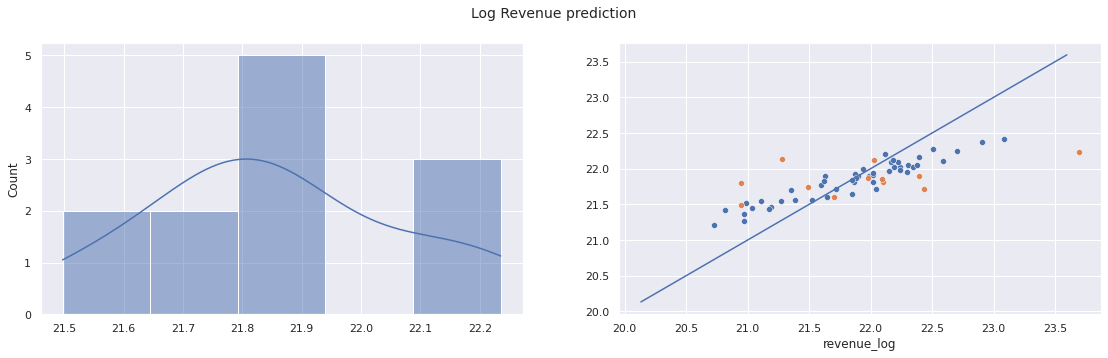

In [118]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(x=pred,kde=True, ax=ax[0])
g2 = sns.scatterplot(x=y_train,y=predT, ax=ax[1])
g2 = sns.scatterplot(x=y_validate,y=pred, ax=ax[1])
g2 = sns.lineplot(line,line, ax=ax[1])
plt.suptitle('Log Revenue prediction',fontsize=14)
fig.show();

In [119]:
df_test['PredictionIL'] = ereg.predict(df_testing[featuresIL])

#df_test['PredictionIL'] = df_test['PredictionIL']*Ltarget_std + Ltarget_mean

df_test['PredictionIL'] = np.power(2,df_test['PredictionIL'])

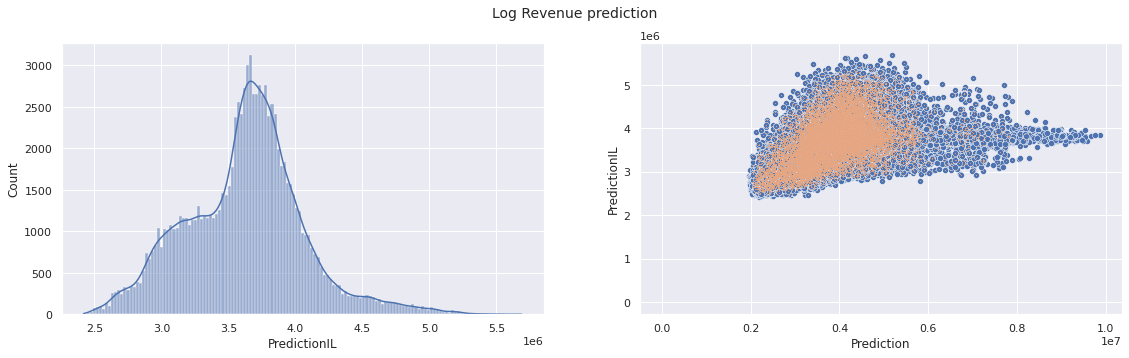

In [120]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(x=df_test['PredictionIL'],kde=True, ax=ax[0])
g2 = sns.scatterplot(x=df_test['Prediction'],y=df_test['PredictionIL'], ax=ax[1])
g2 = sns.scatterplot(x=df_test['Prediction'][df_test['Type'] == 'IL'],y=df_test['PredictionIL'][df_test['Type'] == 'IL'], ax=ax[1], s=1)
g2 = sns.lineplot(line,line, ax=ax[1])
plt.suptitle('Log Revenue prediction',fontsize=14)
fig.show();

In [121]:
df_test['Prediction1'] = df_test['Prediction']
df_test['Prediction'][df_test['Type'] == 'IL'] = df_test['PredictionIL']

In [122]:
# Export results for submission
print('data saved to directory')
outputFeature = ['Id','Prediction']
df = pd.DataFrame(df_test[outputFeature])
df.to_csv(filepath + '/CDSsubmission.csv', sep=',', index=False)

data saved to directory


In [123]:
df_test['Prediction2'] = df_test['Prediction']

In [124]:
modelRF = RandomForestRegressor(n_estimators=200,max_depth=5,oob_score=True,max_features=0.7).fit(X, y)
df_test['PredictionRF'] = modelRF.predict(df_testing[featuresIL])
df_test['PredictionRF'] = df_test['PredictionRF']*Ltarget_std + Ltarget_mean
df_test['Prediction'] = np.power(2,df_test['PredictionRF'])



In [125]:
df = pd.DataFrame(df_test[outputFeature])
df.to_csv(filepath + '/CDSsubmission.csv', sep=',', index=False)

In [126]:
df_test.describe().T

count          mean           std           min  \
Id            100000.0  4.999950e+04  2.886766e+04  0.000000e+00   
P1            100000.0  4.088030e+00  2.812963e+00  1.000000e+00   
P2            100000.0  4.428085e+00  1.428865e+00  1.000000e+00   
P3            100000.0  4.215325e+00  8.421608e-01  0.000000e+00   
P4            100000.0  4.396025e+00  1.035827e+00  2.000000e+00   
P5            100000.0  1.989590e+00  1.065314e+00  1.000000e+00   
P6            100000.0  2.881900e+00  1.531429e+00  1.000000e+00   
P7            100000.0  5.300510e+00  2.178580e+00  1.000000e+00   
P8            100000.0  4.931000e+00  1.718490e+00  1.000000e+00   
P9            100000.0  5.251380e+00  1.702632e+00  4.000000e+00   
P10           100000.0  5.458970e+00  1.763601e+00  4.000000e+00   
P11           100000.0  3.311720e+00  2.068118e+00  1.000000e+00   
P12           100000.0  5.061440e+00  1.765383e+00  2.000000e+00   
P13           100000.0  5.086630e+00  9.793390e-01  3.000000e+00   
P14           100000.0  1.280090e+00  2.496782e+00  0.000000e+00   
P15           100000.0  1.305530e+00  2.166949e+00  0.000000e+00   
P16           100000.0  1.747070e+00  3.172012e+00  0.000000e+00   
P17           100000.0  1.156880e+00  2.432646e+00  0.000000e+00   
P18           100000.0  1.708470e+00  3.030527e+00  0.000000e+00   
P19           100000.0  5.191120e+00  5.785529e+00  1.000000e+00   
P20           100000.0  4.570860e+00  3.612430e+00  1.000000e+00   
P21           100000.0  2.542380e+00  2.526046e+00  1.000000e+00   
P22           100000.0  2.430380e+00  1.363184e+00  1.000000e+00   
P23           100000.0  3.639980e+00  4.719160e+00  1.000000e+00   
P24           100000.0  1.234450e+00  2.097457e+00  0.000000e+00   
P25           100000.0  1.244110e+00  2.084731e+00  0.000000e+00   
P26           100000.0  1.279665e+00  2.309640e+00  0.000000e+00   
P27           100000.0  1.164440e+00  2.179495e+00  0.000000e+00   
P28           100000.0  3.233785e+00  2.136694e+00  1.000000e+00   
P29           100000.0  3.084000e+00  1.783927e+00  0.000000e+00   
P30           100000.0  2.083300e+00  4.309479e+00  0.000000e+00   
P31           100000.0  1.193330e+00  2.307944e+00  0.000000e+00   
P32           100000.0  1.942640e+00  3.971298e+00  0.000000e+00   
P33           100000.0  9.874300e-01  1.534808e+00  0.000000e+00   
P34           100000.0  2.108670e+00  4.685414e+00  0.000000e+00   
P35           100000.0  1.832830e+00  3.228769e+00  0.000000e+00   
P36           100000.0  1.968890e+00  3.805773e+00  0.000000e+00   
P37           100000.0  9.735000e-01  1.677267e+00  0.000000e+00   
DOpen         100000.0  1.923843e+03  1.749439e+03  0.000000e+00   
Prediction    100000.0  1.326812e+11  1.587240e+10  9.553977e+10   
PredictionR   100000.0  4.057632e+06  9.153921e+05  1.973522e+06   
PredictionIL  100000.0  3.626668e+06  4.388316e+05  2.419337e+06   
Prediction1   100000.0  4.031967e+06  9.092080e+05  1.961648e+06   
Prediction2   100000.0  3.956197e+06  8.491526e+05  1.961648e+06   
PredictionRF  100000.0  3.693937e+01  1.664904e-01  3.647538e+01   

                       25%           50%           75%           max  
Id            2.499975e+04  4.999950e+04  7.499925e+04  9.999900e+04  
P1            2.000000e+00  3.000000e+00  4.000000e+00  1.500000e+01  
P2            3.750000e+00  5.000000e+00  5.000000e+00  7.500000e+00  
P3            4.000000e+00  4.000000e+00  4.000000e+00  6.000000e+00  
P4            4.000000e+00  4.000000e+00  5.000000e+00  7.500000e+00  
P5            1.000000e+00  2.000000e+00  2.000000e+00  6.000000e+00  
P6            2.000000e+00  2.000000e+00  4.000000e+00  1.000000e+01  
P7            5.000000e+00  5.000000e+00  5.000000e+00  1.000000e+01  
P8            4.000000e+00  5.000000e+00  5.000000e+00  1.000000e+01  
P9            4.000000e+00  5.000000e+00  5.000000e+00  1.000000e+01  
P10           5.000000e+00  5.000000e+00  5.000000e+00  1.000000e+01  
P11           2.000000e+00  3.000000